In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

## Importing data from train.csv dataset to pandas dataframe

In [2]:
'''df = train data '''
df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [4]:
#printing few columns n rows of the train dataset

df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [5]:
df.shape #gives the shape of the train dataset

(13636, 15)

In [6]:
df.columns  # gives the unique features of the dataset


Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [7]:
df.dtypes #gives us the type of data present over in each feature columns....

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
Rating                int64
BestScore             int64
Recipe_Review        object
dtype: object

* There are 5 categorical varialbes and 10 numrical variables in the dataset...

## Data information 

* ID column    - tells about the different ID given to the user
* RecipeNumber - tells us about the different number given to the Recipe
* RecipeCode   - feature it tells us about the unique code given to the Recipe
* RecipeName   - Tells us the Name of the Recipe ordered in the restaurant
* CommentID    - Give us the ID which was used for the comment given tothe Recipe
* UserID       - Give us the unique ID used by the customer to give the commentID
* UserName.    _ Tells us the about the Name of the customer.
* UserReputation - Tells us about the reputation of the user.
* CreationTimestamp- GIves us the timestamp when the comment was made
* ReplyCount.  - Gives us the count of reply recieved from the user
* ThumbsUpCount- Gives us the count of thumbs up recieved by the Recipe
* ThumbsDownCount - Gives us the thumbs down given to the recipe.
* Rating       -  Tells us the rating(0 to 5) recieved by the recipe
* BestScore.   - Tells us about the Score given by the user for that recipe ordered
* Recipe_Review- Gives us the Review given by the user for that recipe.



## Data Checks

* Data duplicates (finding any duplicate datapoints in the dataset)...


In [8]:
df.duplicated().sum()

0

* Checking the unique value in the each feature


In [9]:
df.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

> From Above unique values the conclusions drawn are:
1. There are 100 unique RecipeName or RecipeCode or RecipeName(dealing with one feature will be possible)
2. There are 13636 comments which matches with the rows of the df.
3. There are 10783 unique UserID which doesn't matches with the UserName so the username are repeated for 163 userID.
4. The commentID doesn't matches with the UserID that means some user has commented more than once for a particular recipe.
5. The ThumbsUpCount and ThumbsDownCount shows how many have of them replied thumbsUp and thumbsDown for a particular recipe
6. There are 6 type of rating given to the food ranging(0-5) which makes it a multiclass classification problem.
7. The recipe_review and commentID doesn;t matches means reviews are repeated for a particular recipe.

* Checking the stats of dataset


In [10]:
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


> Conclusion from above stats(double click here)
1. The count of every feature is 13636
    Feature        Min_value  Max_value  Mean_value
2.  ID                 0.      724.       121
3.  RecipeNumber.      1       100.       38.62   * It means most of the recipe ordered                                                        have lower RecipeNumber
4.  Recipecode         386.    191775.    21785.99 
5.  UserReputation.    10.      510.       2.16
6.  Rating              0       5.         4.2    * It signifies that there are 6 unique  rating numbers and the mean value of 4.2 reflects on higher presence of 4 to 5 rating
7.  BestScore.          0       946        153    * It tells us about the Score given to the Recipe is least 0 and highest 946 and the mean tells us that the lower scores presence are more.


The explanation to the above mean value and its significance given in below 5 cells of code.

In [11]:
print(df['ID'].value_counts()) 
df['ID'].value_counts().index

ID
19     85
25     83
90     82
69     82
71     81
       ..
552     1
706     1
572     1
608     1
675     1
Name: count, Length: 701, dtype: int64


Index([ 19,  25,  90,  69,  71,  26,  17,  76,  70,  35,
       ...
       689, 642, 443, 549, 599, 552, 706, 572, 608, 675],
      dtype='int64', name='ID', length=701)

In [12]:
df['RecipeNumber'].value_counts()

RecipeNumber
3     553
1     483
2     372
9     313
13    307
     ... 
54     68
97     65
91     64
72     64
61     19
Name: count, Length: 100, dtype: int64

In [13]:
df['UserReputation'].value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

In [14]:
df['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [15]:
print(df['BestScore'].value_counts())
df['BestScore'].value_counts().head(20)

BestScore
100    10506
193     1074
253      292
142      147
297      124
       ...  
908        1
529        1
119        1
226        1
754        1
Name: count, Length: 525, dtype: int64


BestScore
100    10506
193     1074
253      292
142      147
297      124
235       70
329       63
354       44
127       42
374       23
269       22
319       21
390       20
167       18
296       17
120       15
284       12
303       11
203       11
184       10
Name: count, dtype: int64

So from above two cells of code we can see that the Rating of count of 5 is much more and then of 0 and 4...whereas the best score given is much more of 100. so the Best score given and that is a rating 5 will be create absurd prediction in the model...  

## Exploring the missing values..

In [16]:
pd.isnull(df)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
pd.isnull(df).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

This null value can also be generated through the below query...

In [18]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Recipe_Review']

The missing values can also be shown using a heatmap....but cant be seen in the heatmap as the missing values are only 2.

<Axes: >

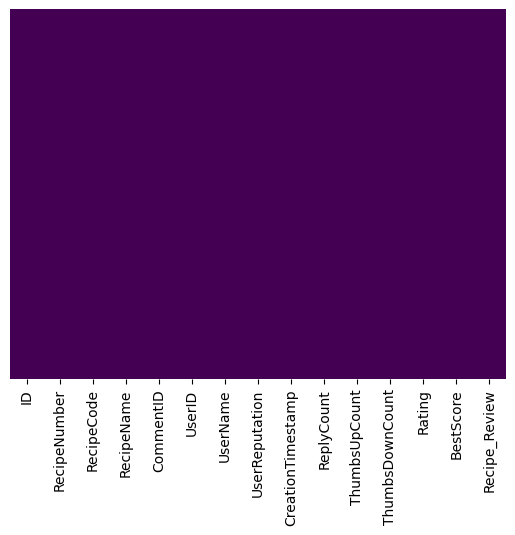

In [19]:
sns.heatmap(df.isnull(), yticklabels = False,cmap= 'viridis',cbar = False)

The missing values can't be seen lets try increasing the size of the plot

In [ ]:
#matplotlib.RcParams['figure.figsize'] = (12,6)
#plt.figure(figsize=(10,100))
#sns.heatmap(df.isnull(), yticklabels = False,cmap= 'jet',cbar = False)

**Now going feature by feature and how data is spread across the feature.**

* **Looking in the Categorical features...**

In [20]:
df['RecipeName'].value_counts()

RecipeName
Cheeseburger Soup             553
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos             65
Caramel Heavenlies             64
Blueberry French Toast         64
Vegetarian Linguine            19
Name: count, Length: 100, dtype: int64

In [22]:
uniq_RName = df.RecipeName.value_counts().index

In [23]:
uniq_RName

Index(['Cheeseburger Soup', 'Creamy White Chili', 'Best Ever Banana Bread',
       'Enchilada Casser-Ole!', 'Basic Homemade Bread',
       'Favorite Chicken Potpie', 'Flavorful Chicken Fajitas',
       'Cauliflower Soup', 'Zucchini Pizza Casserole',
       'Amish Breakfast Casserole', 'Rustic Italian Tortellini Soup',
       'Traditional Lasagna', 'Zucchini Cupcake', 'Li’l Cheddar Meat Loaves',
       'Hot Milk Cake', 'Stuffed Pepper Soup', 'Apple Pie',
       'Moist Chocolate Cake', 'Mom’s Meat Loaf', 'Sandy’s Chocolate Cake',
       'Basic Banana Muffins', 'Fluffy Key Lime Pie', 'Cheesy Ham Chowder',
       'Pineapple Orange Cake', 'Macaroni Coleslaw', 'Winning Apple Crisp',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Shrimp Scampi',
       'Creamy Grape Salad', 'Pumpkin Bread', 'Buttery Cornbread',
       'Forgotten Jambalaya', 'Caramel-Pecan Cheesecake Pie',
       'Lemon Blueberry Bread', 'Simple Au Gratin Potatoes',
       'Frosted Banana Bars', 'Big Soft Ginger 

In [24]:
len(uniq_RName)

100

In [25]:
print( df.RecipeNumber.value_counts())
uniq_RNo = df.RecipeNumber.value_counts().index

RecipeNumber
3     553
1     483
2     372
9     313
13    307
     ... 
54     68
97     65
91     64
72     64
61     19
Name: count, Length: 100, dtype: int64


In [26]:
uniq_RNo

Index([  3,   1,   2,   9,  13,   6,   7,  12,  10,   4,  16,  11,  14,  15,
        26,  18,   8,  19,  20,  24,  31,  17,  28,  21,  27,  29,   5,  39,
        33,  36,  23,  30,  41,  59,  46,  38,  64,  35,  45,  49,  40,  50,
        25,  48,  34,  32,  43,  44,  57,  22,  73,  68,  53,  52,  62,  51,
        86,  74,  60,  37,  58,  81,  80,  84,  65,  67,  71,  89,  42,  82,
        47,  76,  88,  85,  69,  75,  55,  77,  90,  63, 100,  79,  98,  78,
        87,  99,  93,  83,  92,  70,  66,  96,  95,  94,  56,  54,  97,  91,
        72,  61],
      dtype='int64', name='RecipeNumber')

* The RecipeNumber given is continuous from 1 to 100 

In [27]:
len(uniq_RNo)

100

In [28]:
print(df.RecipeCode.value_counts())
uniq_RCode = df.RecipeCode.value_counts().index

RecipeCode
2832     553
14299    483
3309     372
42083    313
32480    307
        ... 
35766     68
34347     65
3683      64
1821      64
17022     19
Name: count, Length: 100, dtype: int64


In [29]:
uniq_RCode

Index([  2832,  14299,   3309,  42083,  32480,  21444,  12540,  19731,   2912,
        17826,  41101,  12003,   7178,  10252,    386,   2872,   6086,   1693,
         6504,    957,   7708,  36450,  12734,  33206,  43675,   3058,  42386,
        28058,  32535,   1196,  14600,  39549,  35948,    414,  18345,   1063,
        12700,  27696,  41384,  45495,   8431, 100276,  23222,   9739,  19201,
        17310,  33457,  31278,   9010,   1081,  41095,  74724,   3143,  27434,
         1152,   7539,   4383,  26937,  11588,  20170,  32248,  27626,  39581,
         4444,  12347,  16579,  12259,   1324,  10248,  18274,  15805,  46655,
         8202,  39334,  39545,  38183,  38550,  16458,  33743,  24886,  82745,
        33121,  11767,  36217,  11330, 191775,  42873,   9735, 141947,  32264,
         7752,   3290,  18341,   8015,  27675,  35766,  34347,   3683,   1821,
        17022],
      dtype='int64', name='RecipeCode')

The Recipe code are random from 3 to 199

In [30]:
len(uniq_RCode)

100

In [31]:
df.UserName.value_counts()

UserName
mjlouk               21
2124arizona          20
No_Time_To_Cook      20
grandmascooking22    19
justmbeth            18
                     ..
Melinda174            1
manncw408             1
grandmaomaha          1
geojac                1
morgantowndan         1
Name: count, Length: 10620, dtype: int64

In [32]:
df.UserID.value_counts()

UserID
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm    20
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9    18
u_1oKVZmYPulmUFbvGiBA8U3uRR6D    18
u_1oKVZzipo1u8lcqQzDUcw4UBn9e    17
u_1oKVa1vU0P0wtIMwn8FBys0ptHj    15
                                 ..
u_1oKc6ewGuQpQ5S6fVjKWZ1d95es     1
u_1oKYgSIJsryLqQ58dRqEExsvxmg     1
u_1oKVyKEZexVYmasyrzDQO3t5XB7     1
u_VgdSEmx4XglO                    1
u_1oKYPsERQ0GvUcjIsuAxzmnsQGW     1
Name: count, Length: 10783, dtype: int64

* **Looking for the unique values in the commentId and userid**

In [33]:
df[['CommentID','UserID']].groupby(['CommentID','UserID']).size().reset_index()

,CommentID,UserID,0
0,sp_aUSaElGf_100276_c_106707,u_1oKVaTLrjS39mFVj5gLEgaNHZEC,1
1,sp_aUSaElGf_100276_c_108751,u_1oKVa4my2LXJ25e5Bd6sxZC37xq,1
2,sp_aUSaElGf_100276_c_116755,u_1oKW2sAtHXuTRsheWeTVknxaNfJ,1
3,sp_aUSaElGf_100276_c_122096,u_1oKVqY4MUG6LUvoXfxzCaKXmqIT,1
4,sp_aUSaElGf_100276_c_126983,u_1oKVmOXwePvufi7CzDQSY5YeJeD,1
...,...,...,...
13631,sp_aUSaElGf_9739_c_428858,u_1oKcx9l9mbBJLuMdX1d7P9zJpAu,1
13632,sp_aUSaElGf_9739_c_428859,u_1oKcxF1UQxpjJc7u0UNIxIZFtoK,1
13633,sp_aUSaElGf_9739_c_428860,u_1oKcuDGUwJmPkv4hvywBACwh4hc,1
13634,sp_aUSaElGf_9739_c_428861,u_1oKWAnqYaa1sJNDoGW8RjJovT93,1


In [34]:
df[['CommentID','UserID']].groupby(['CommentID','UserID']).nunique().head(50)

,
CommentID,UserID
sp_aUSaElGf_100276_c_106707,u_1oKVaTLrjS39mFVj5gLEgaNHZEC
sp_aUSaElGf_100276_c_108751,u_1oKVa4my2LXJ25e5Bd6sxZC37xq
sp_aUSaElGf_100276_c_116755,u_1oKW2sAtHXuTRsheWeTVknxaNfJ
sp_aUSaElGf_100276_c_122096,u_1oKVqY4MUG6LUvoXfxzCaKXmqIT
sp_aUSaElGf_100276_c_126983,u_1oKVmOXwePvufi7CzDQSY5YeJeD
sp_aUSaElGf_100276_c_128178,u_1oKW1cQXyorvyr19hBn1cKyWfOt
sp_aUSaElGf_100276_c_129003,u_1oKVa3dm9k4sQJZuEACIlelurOi
sp_aUSaElGf_100276_c_135226,u_1oKW3zUPMB9dgob77DcORaAvW0z
sp_aUSaElGf_100276_c_137294,u_1oKVaXcpN0u6QpaTrWEsZp69OSk


In [35]:
#Also looking for the duplicate elements in the UserID and CommentID..which was none.

df[['CommentID','UserID']].groupby(['CommentID','UserID']).value_counts().sum()

13636

In [36]:
df['Recipe_Review'].head(50)

0     great recipe! I have made them just as written...
1     This is an easy and quick recipe that is great...
2     I think I was looking for something extra spec...
3     This is our favorite grilled chicken recipe.  ...
4     Great basic recipe. I added 2 teaspoons Tuscan...
5      Absolutely delicious!   Easy, tasty and filling!
6                            Very good and summer good.
7     I also did some minor changes as I did not hav...
8     Great tasting. Followed directions exactly and...
9     This is an very inexpensive soup to make... It...
10    I made this. ..something wrong with this recip...
11    great bars.  I also use sliced canned or fresh...
12    I fixed these for a Mexican themed meal and th...
13    Made this tonight but since 2 of us most night...
14    A good friend made this lasagna &amp; it&#39;s...
15    This recipe was a major hit! Have already made...
16    this is the ONLY meatloaf recipe I use.Since 1...
17    I&#39;m going to try this, bet it is good.

## Data Visualization...


#  Visualizing Histogram and Kernel distribution function 

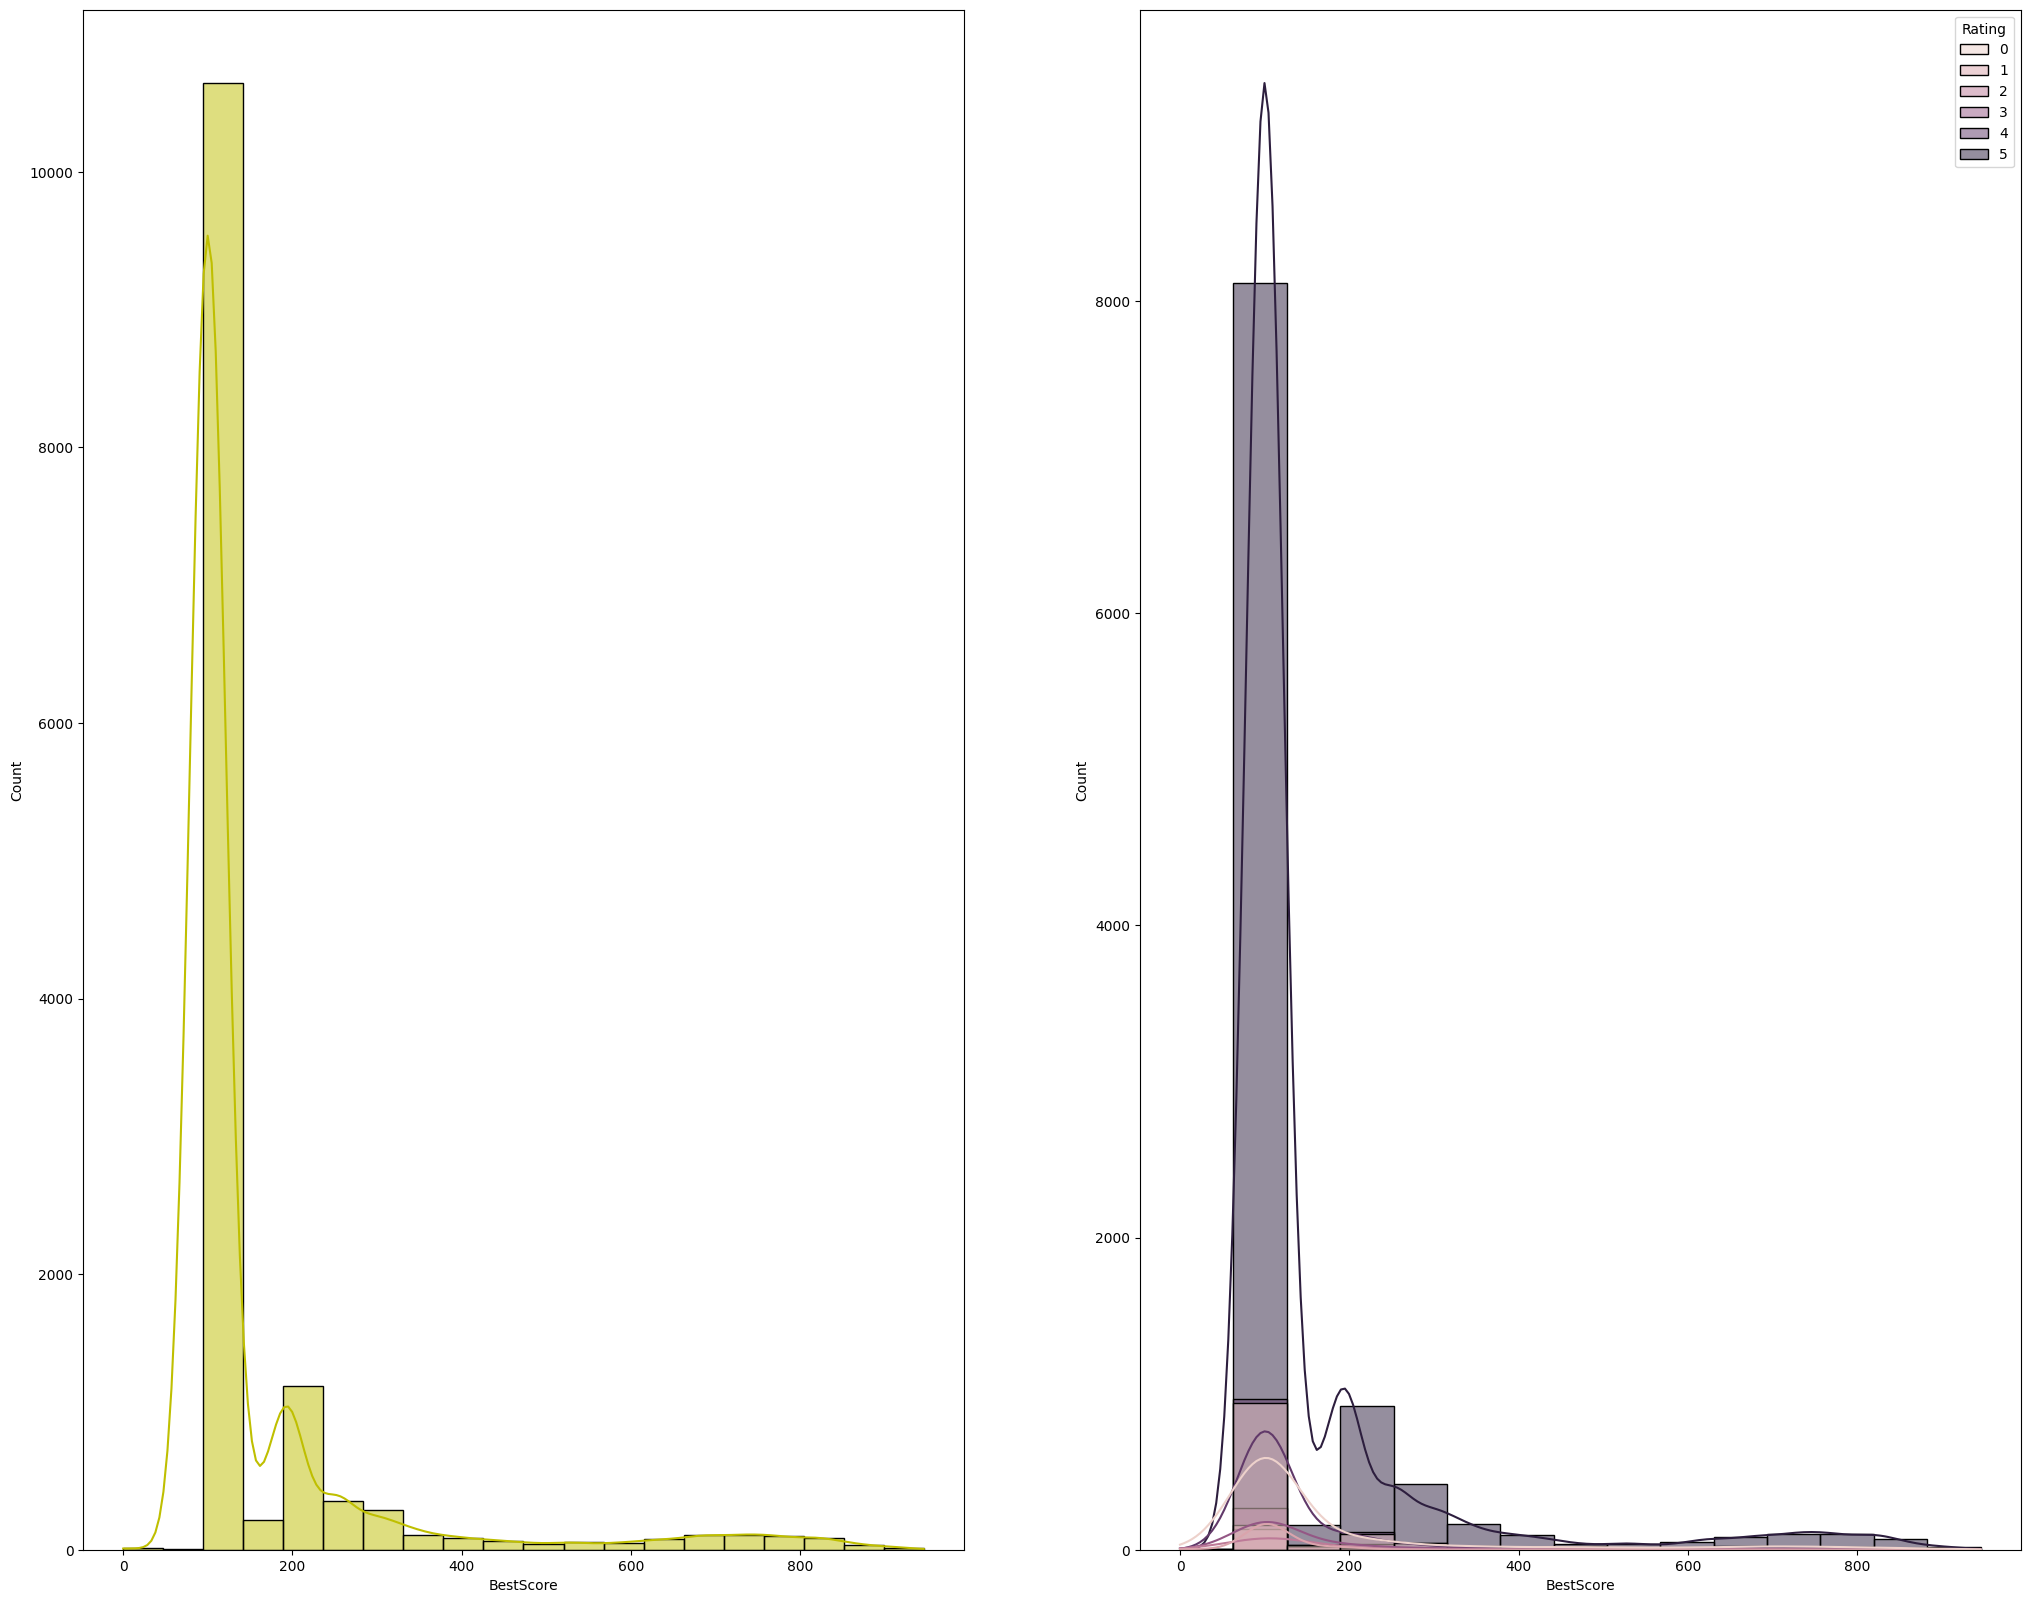

In [37]:
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(1, 2, figsize=(25, 20))
plt.subplot(121)
sns.histplot(data=df,x='BestScore',bins=20,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df,x='BestScore',kde=True,hue='Rating')
plt.show()

This shows how highly skew is the data,for the BestScore given is lower for many recipes...

* **Log space plotted graph is best for highly skewed data...lets visualize that..**

In [ ]:

#fig, axs = plt.subplots(1, 2, figsize=(25, 20))
#plt.subplot(121)
#sns.histplot(data=df,x='BestScore',log_scale = True)
#plt.subplot(122)
#sns.histplot(data=df,x='BestScore',log_scale = True)
#plt.show()

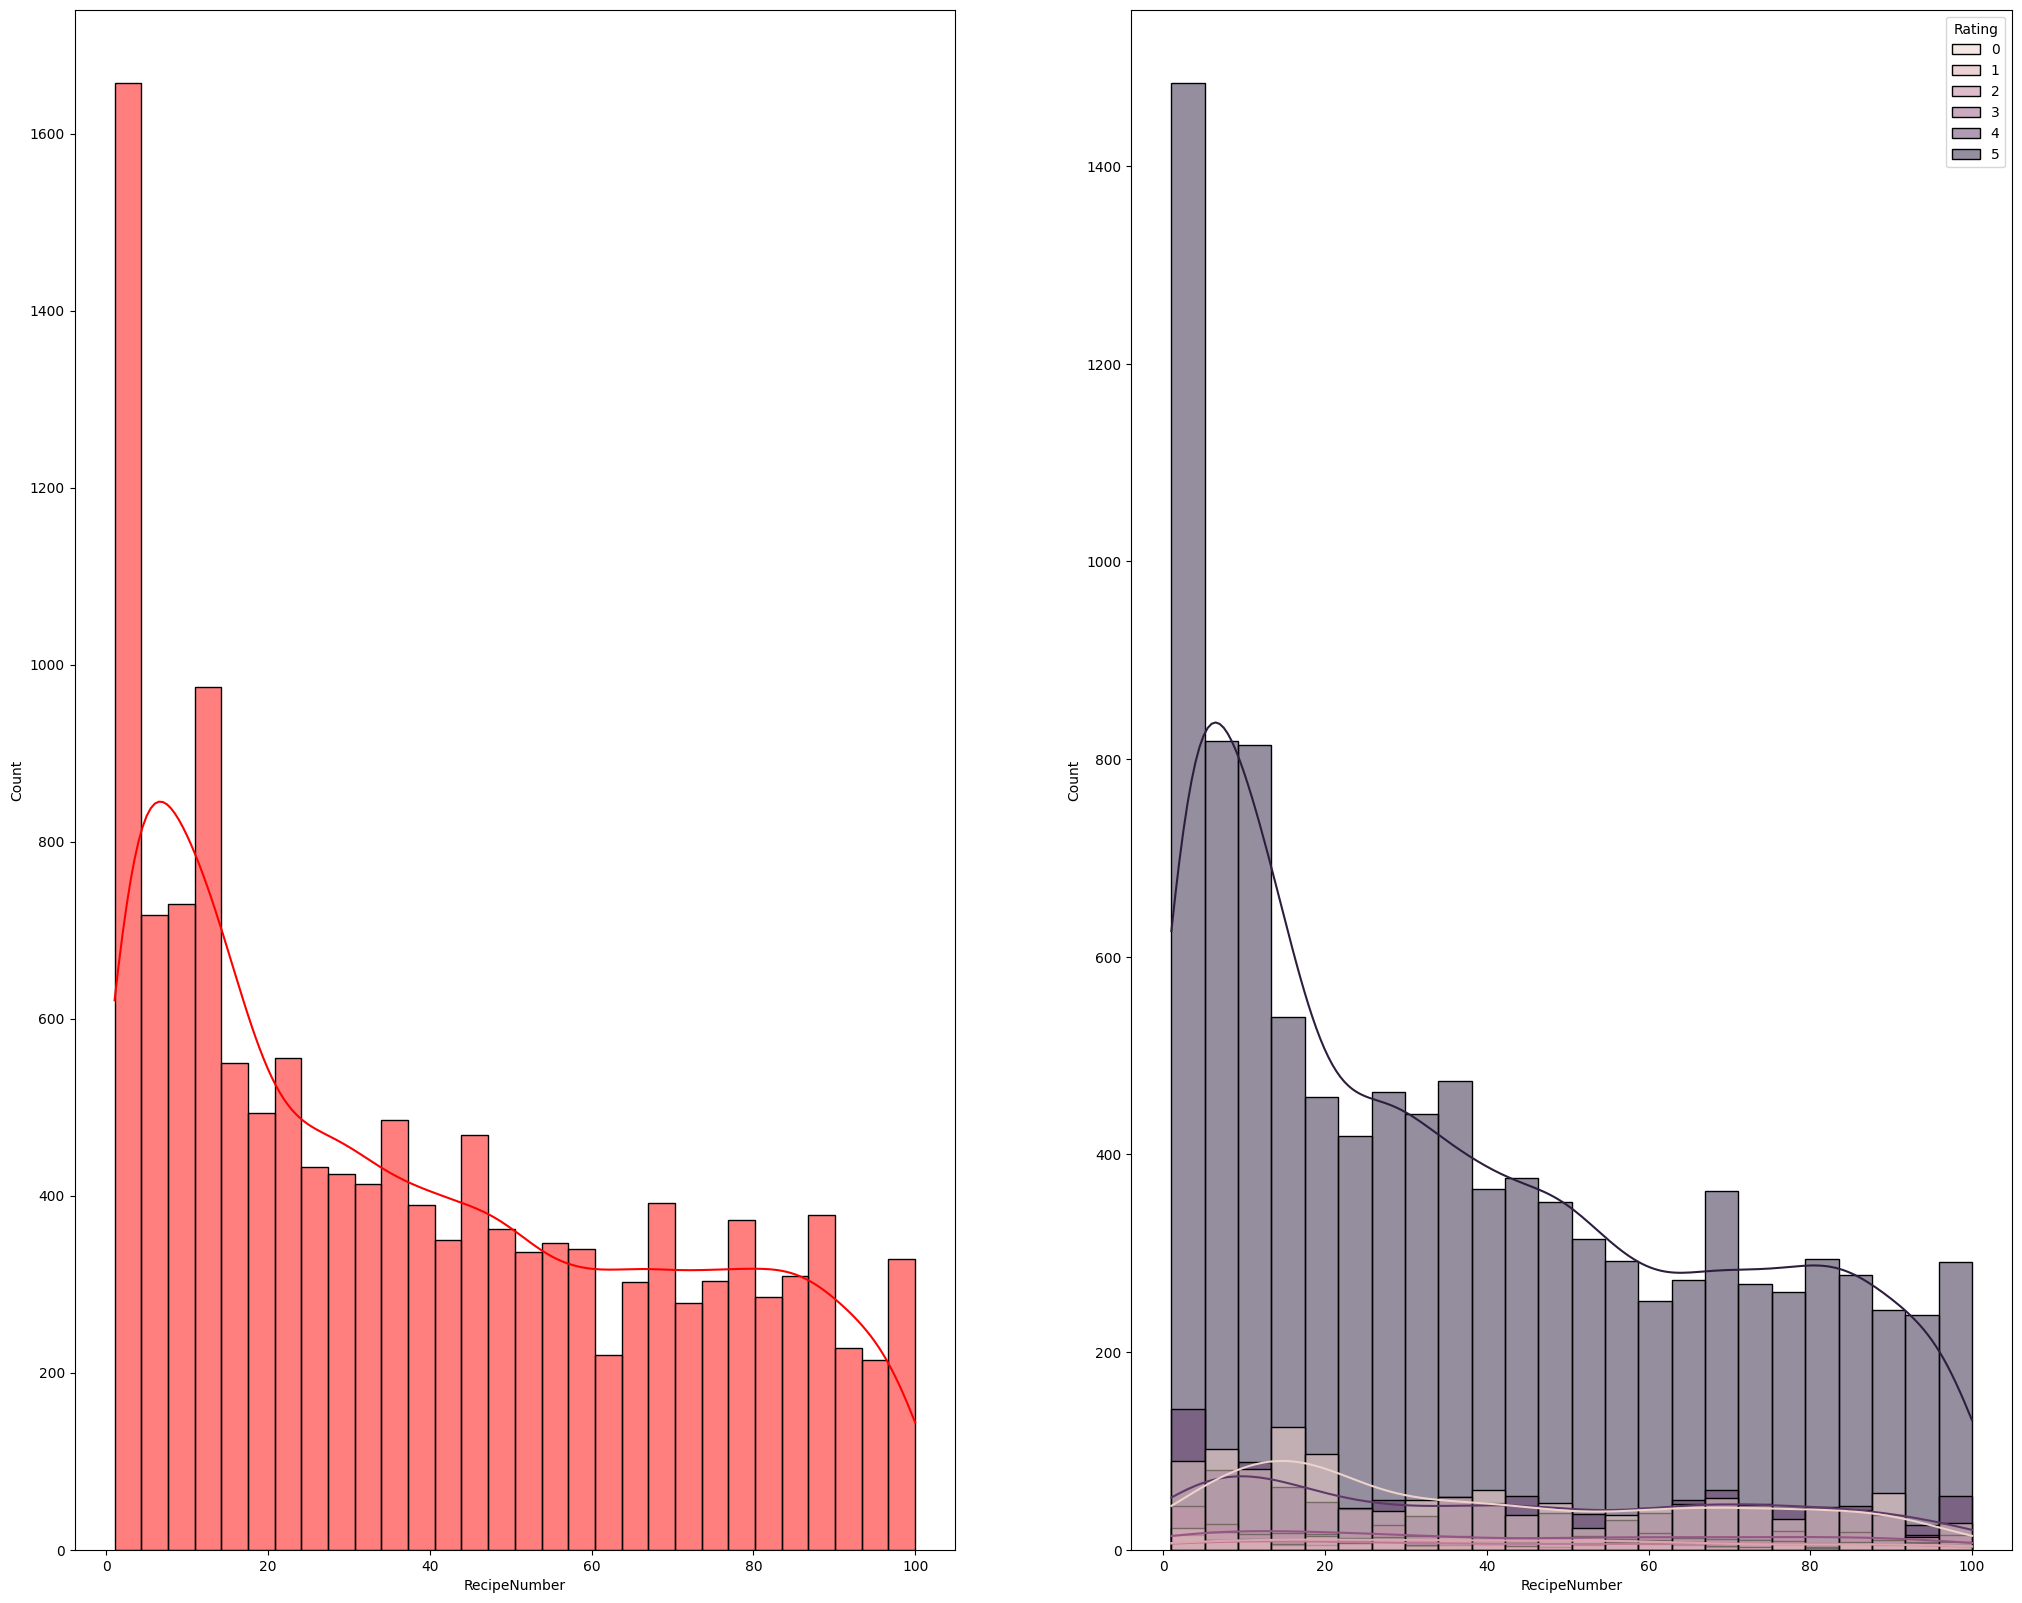

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(25, 20))
plt.subplot(121)
sns.histplot(data=df,x='RecipeNumber',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='RecipeNumber',kde=True,hue='Rating')
plt.show()

> This show how the Recipe with lower RecipeNumber has recieved higher ordered whereas it also has recieved higher counts of 5 rating, which is CheeseBurger Soup and so on....



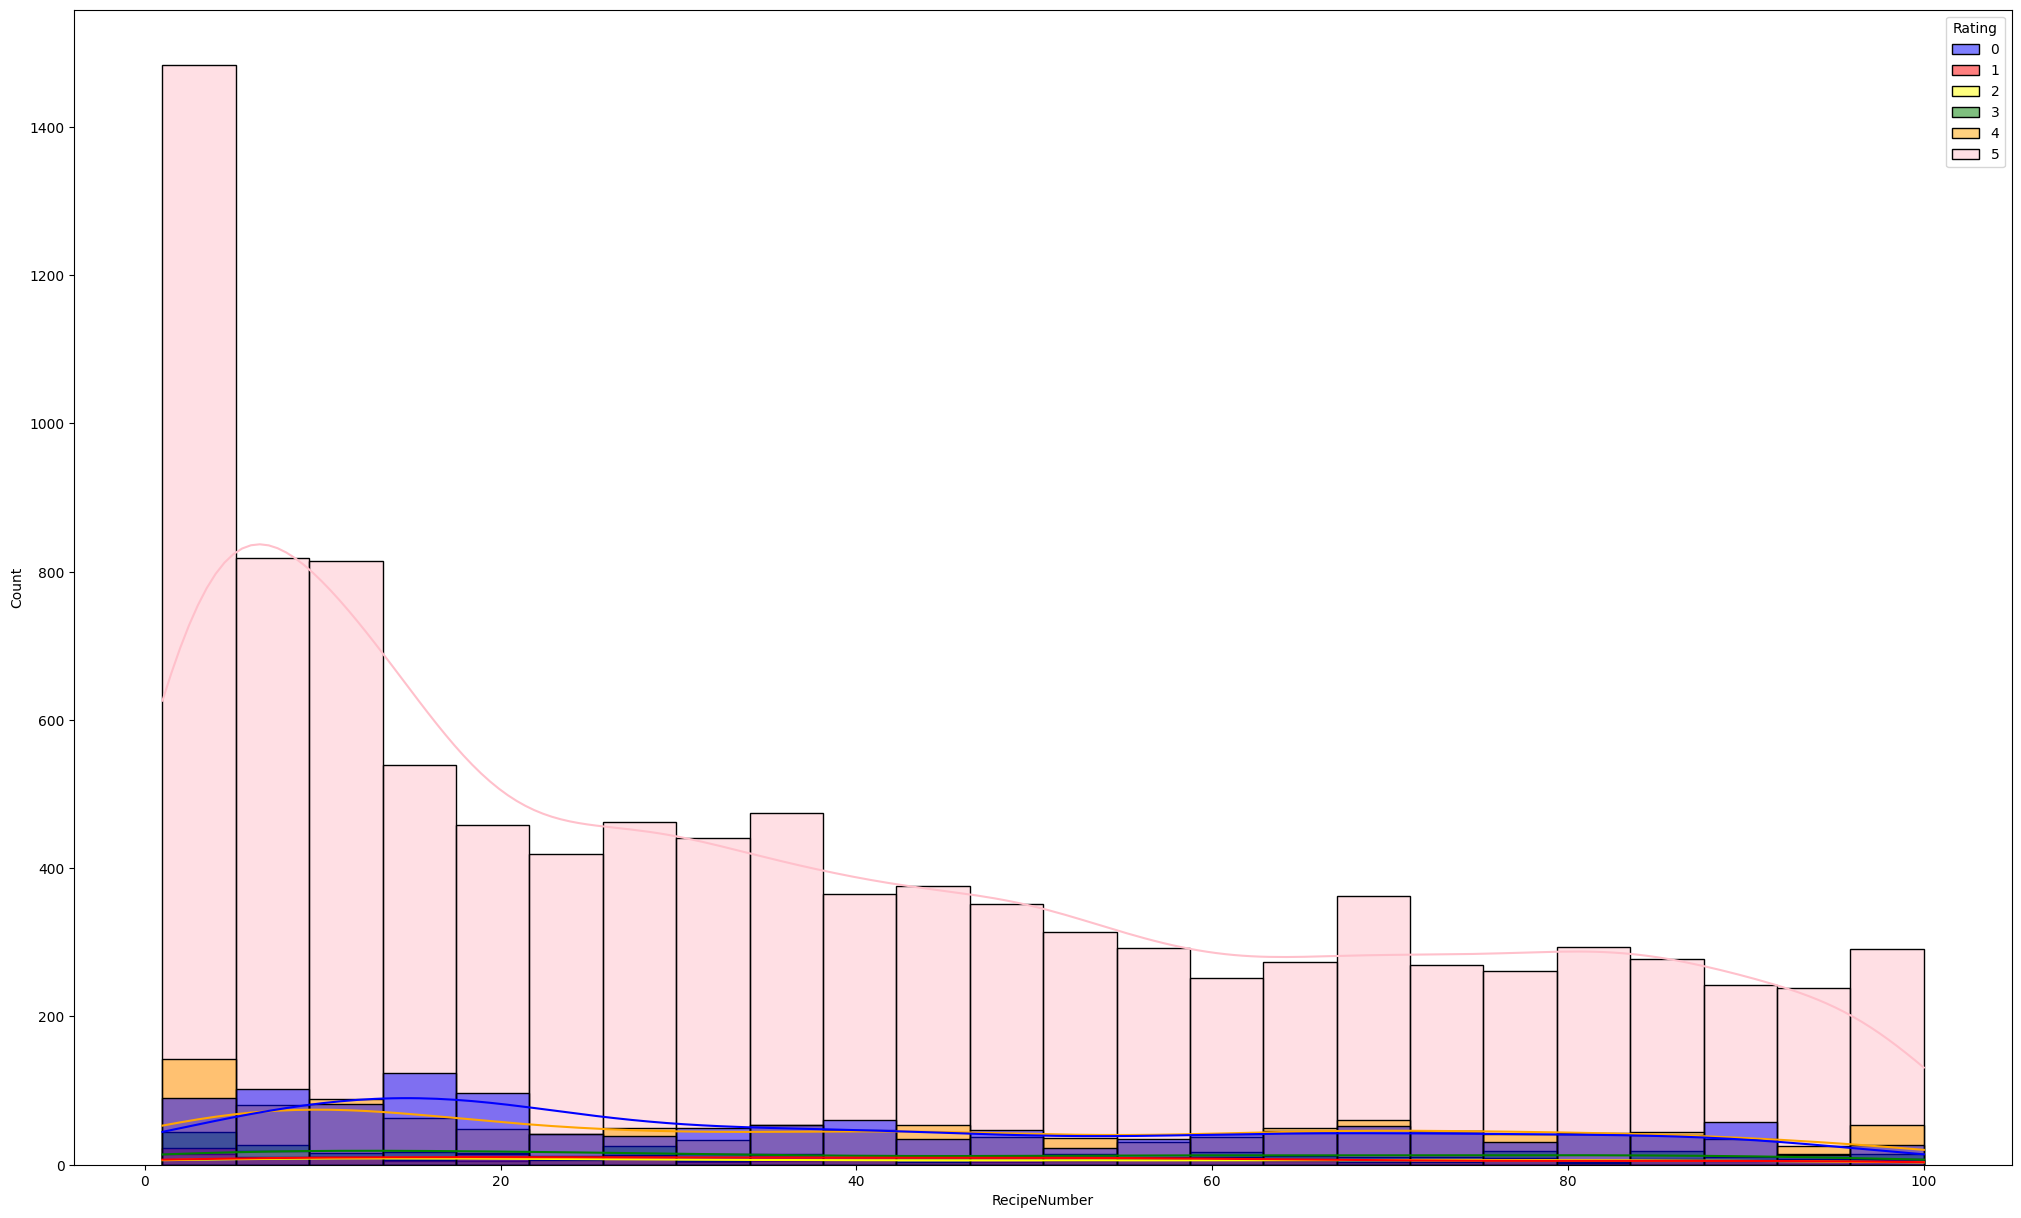

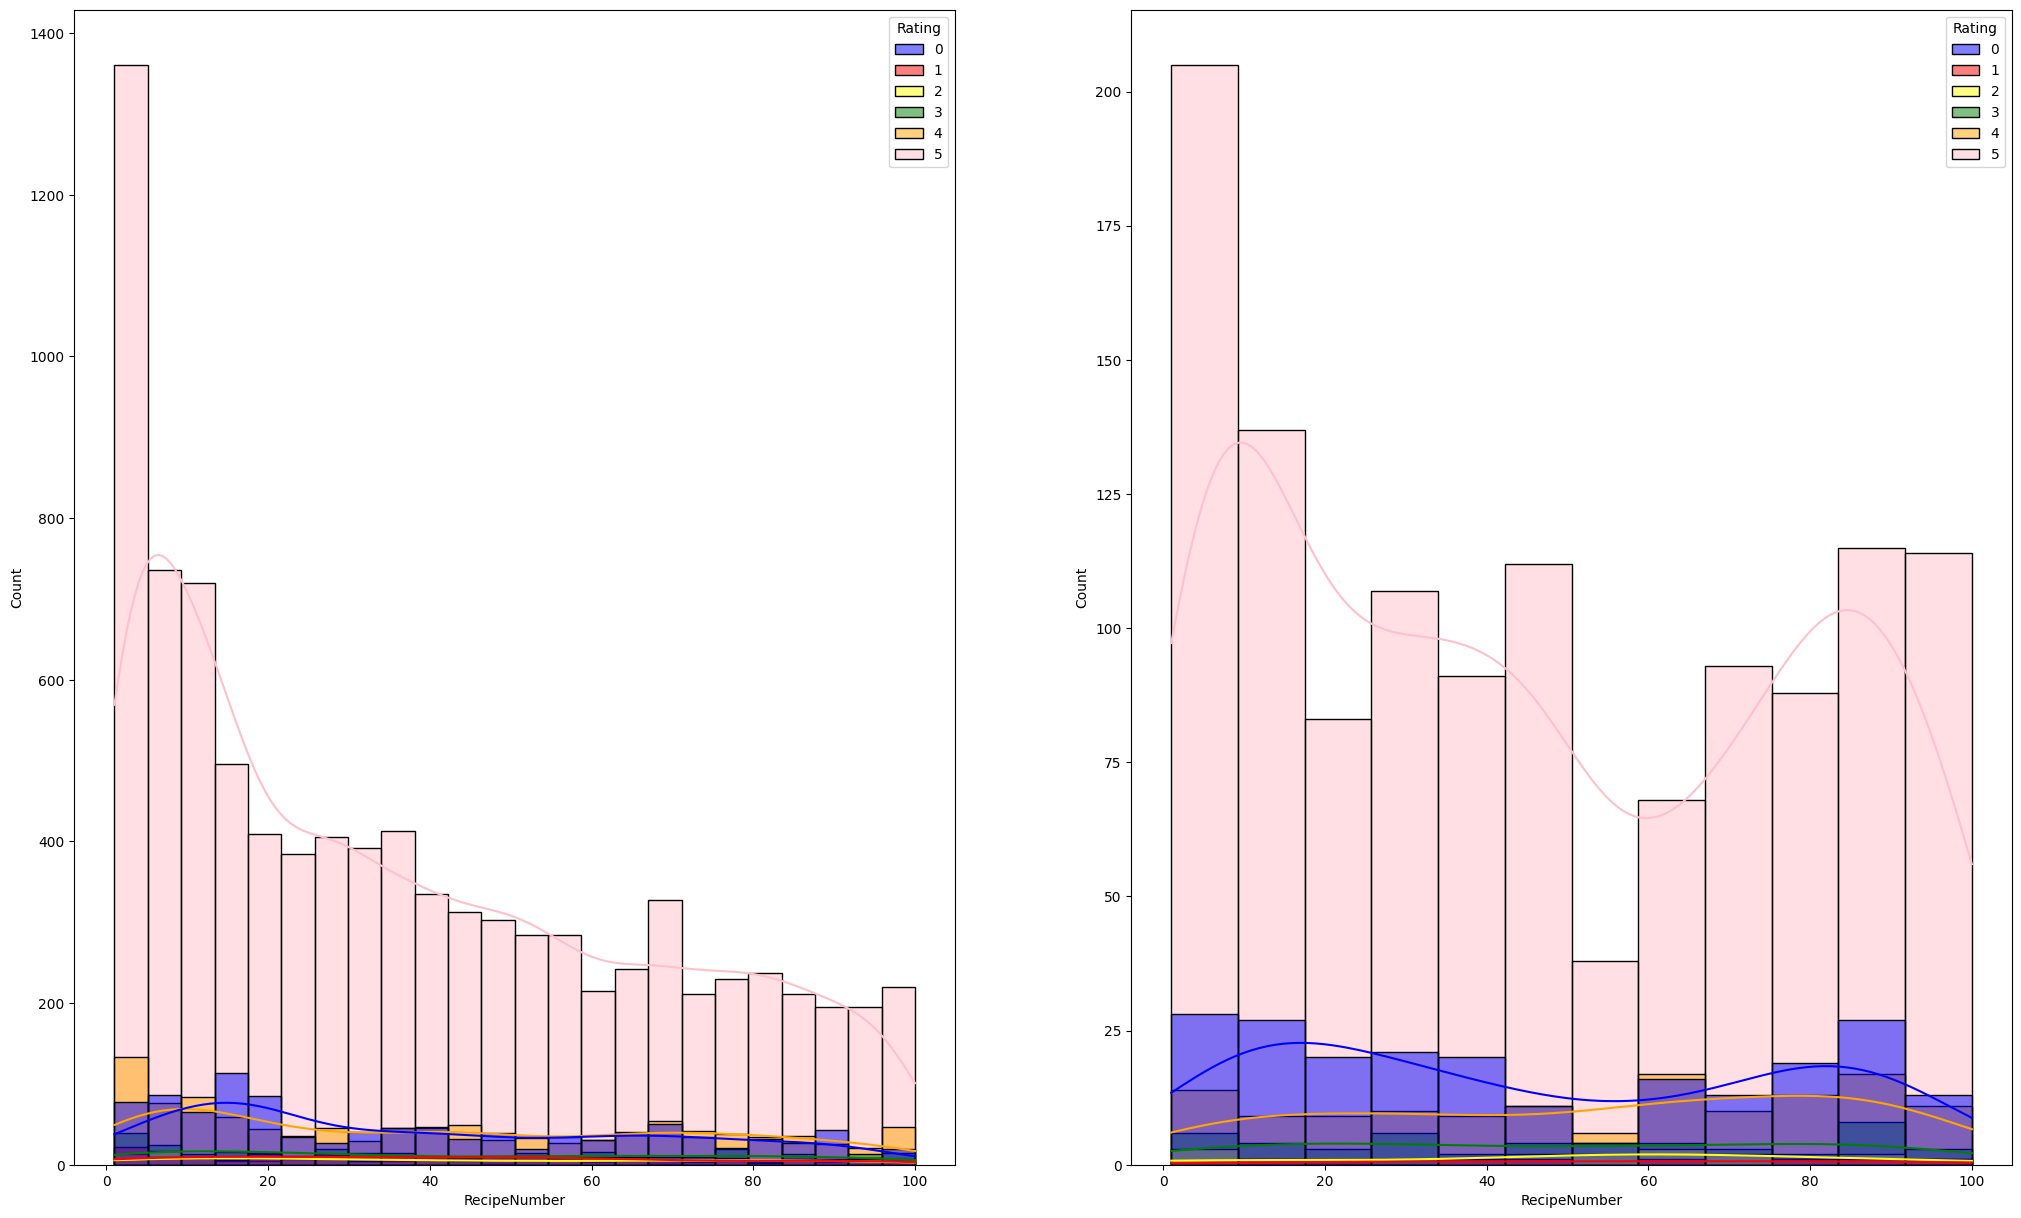

In [41]:
plt.figure(figsize=(25,15))
sns.histplot(data=df,x='RecipeNumber',kde=True,hue='Rating', palette=['blue','red','yellow','green','orange','pink'])

plt.subplots(1,2,figsize=(25,15))
plt.subplot(121)
sns.histplot(data=df[df.BestScore<200],x='RecipeNumber',kde=True,hue='Rating',palette=['blue','red','yellow','green','orange','pink'])

plt.subplot(122)
sns.histplot(data=df[df.BestScore>200],x='RecipeNumber',kde=True,hue='Rating',palette=['blue','red','yellow','green','orange','pink']);
plt.show()

> The above plot shows lower BestScore<200 is given to the highest order recipe..from graph 1 and the more BestScore>200 to 1000 is given for the highest order recipe.

In [ ]:
df.columns

# Multivariate Analysis using Pieplot


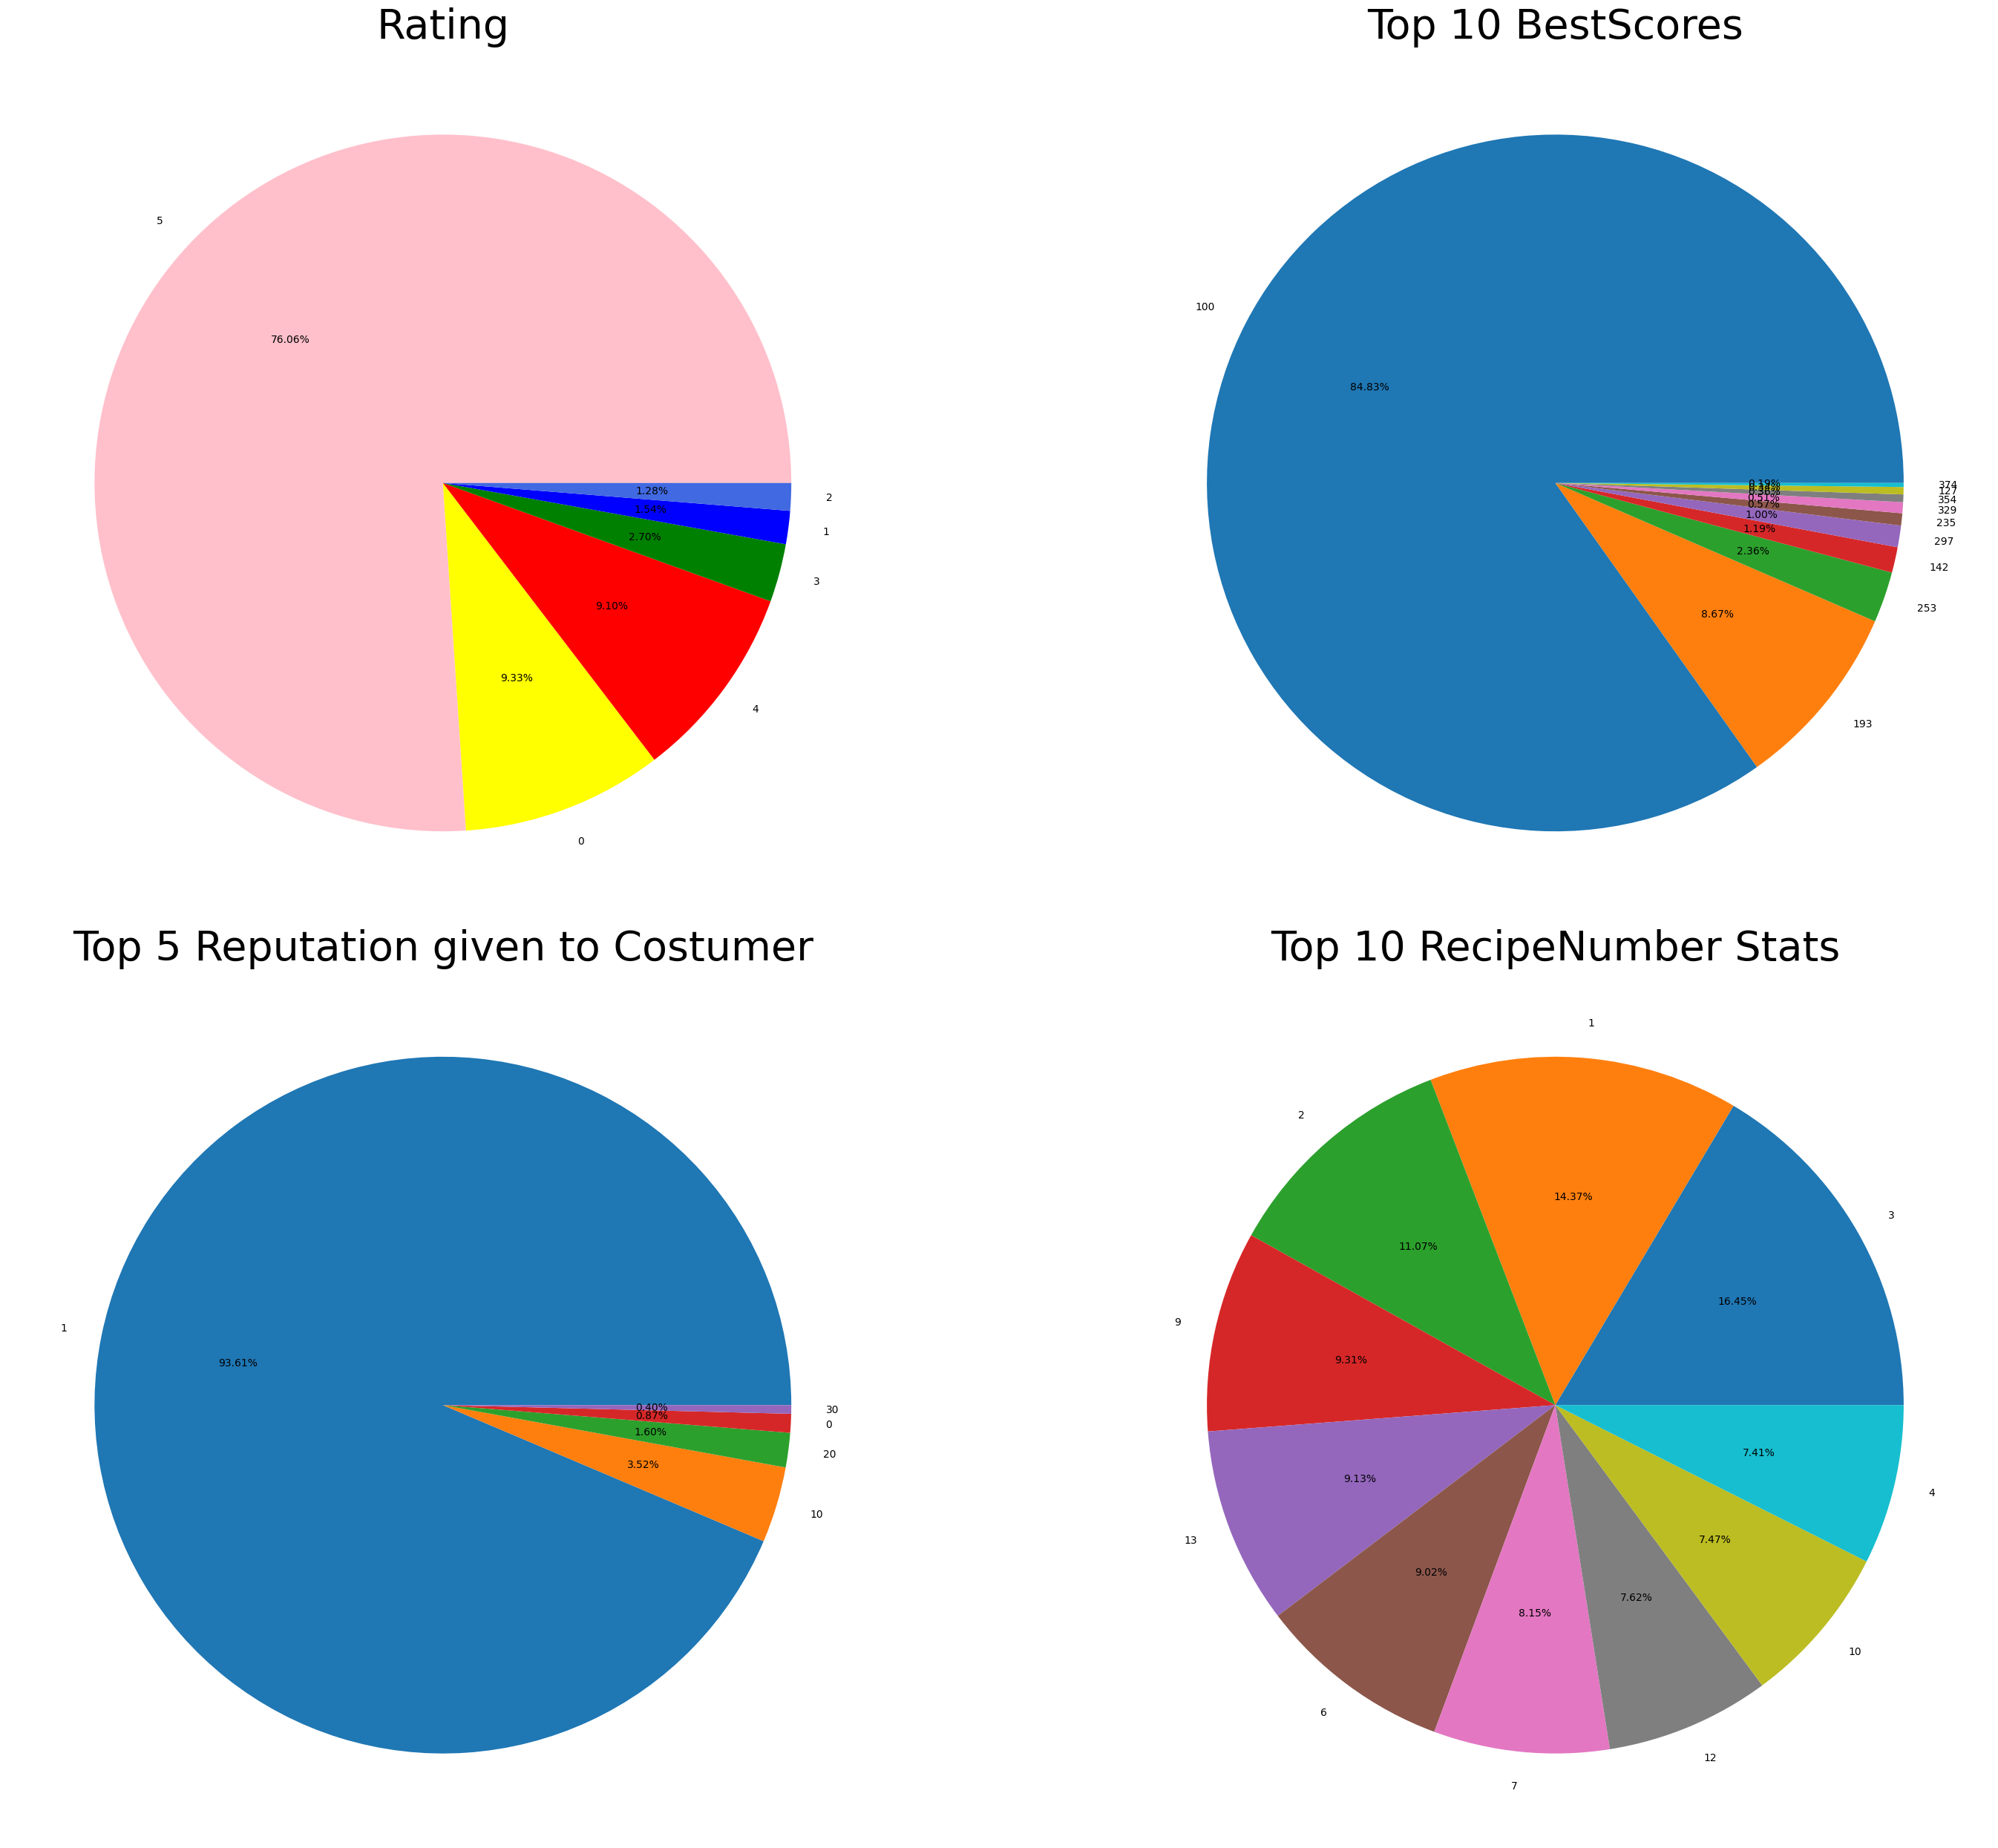

In [42]:
plt.subplots(2,2,figsize=(33,25))

#plotting the ratings percentage for Recipe

plt.subplot(221)
uniq_rat= df['Rating'].value_counts()
size = df['Rating'].value_counts().values
labels =uniq_rat.index
color = ['pink','yellow','red','green','blue','royalblue']
plt.pie(size, colors = color, labels = labels,autopct = '%1.2f%%')
plt.title('Rating', fontsize = 40)
plt.axis('off')

#plotting the BestScore percentage for Recipe

uniq_BS= df['BestScore'].value_counts()
plt.subplot(222)
size = df['BestScore'].value_counts().values[:10]
labels = uniq_BS[:10].index
plt.pie(size,labels = labels,autopct = '%1.2f%%')
plt.title('Top 10 BestScores', fontsize = 40)
plt.axis('off')

#plotting the UserReputation percentage given to users
uniq_Repu = df['UserReputation'].value_counts()
plt.subplot(223)
size = df['UserReputation'].value_counts().values[:5]
labels = uniq_Repu.index[:5]
plt.pie(size,labels = labels,autopct = '%1.2f%%')
plt.title('Top 5 Reputation given to Costumer', fontsize = 40)
plt.axis('off')

#plotting the Top 10 RecipeNumber ordered the most...
plt.subplot(224)
size = df['RecipeNumber'].value_counts().values[:10]
labels = uniq_RNo[:10]
plt.pie(size,labels = labels,autopct = '%1.2f%%')
plt.title('Top 10 RecipeNumber Stats', fontsize = 40)
plt.axis('off')

plt.tight_layout()

plt.grid()

plt.show()

## * **Now ploting the Top Recipe ordered in the form of piechart.**

# Univariate analysis...

In [43]:
Recipe_val = df.RecipeNumber.value_counts().values

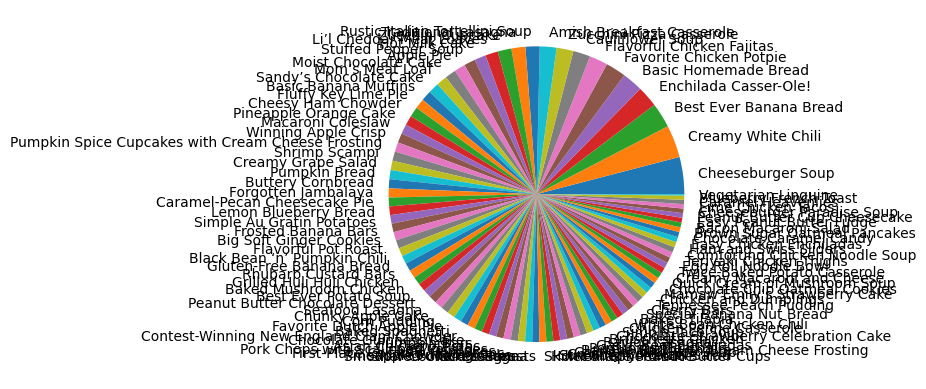

In [44]:
plt.pie(Recipe_val,labels=uniq_RName);

> **As can be seen the plot is too messy to look upon, so ploting the top 10 Recipe**

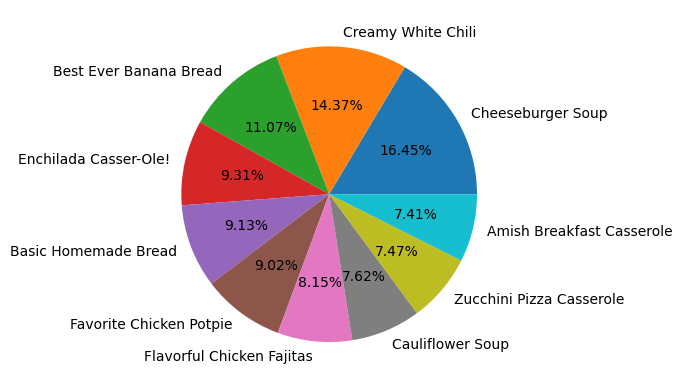

In [45]:
plt.pie(Recipe_val[:10],labels=uniq_RName[:10],autopct = '%1.2f%%')
plt.show()

> **So the observation shows that the highest Recipe ordered in the restaurant is the "Cheeseburger Soup" and then Creamy White Chili and then Best Ever Banana Bread and so on...**

## Univariate analysis 

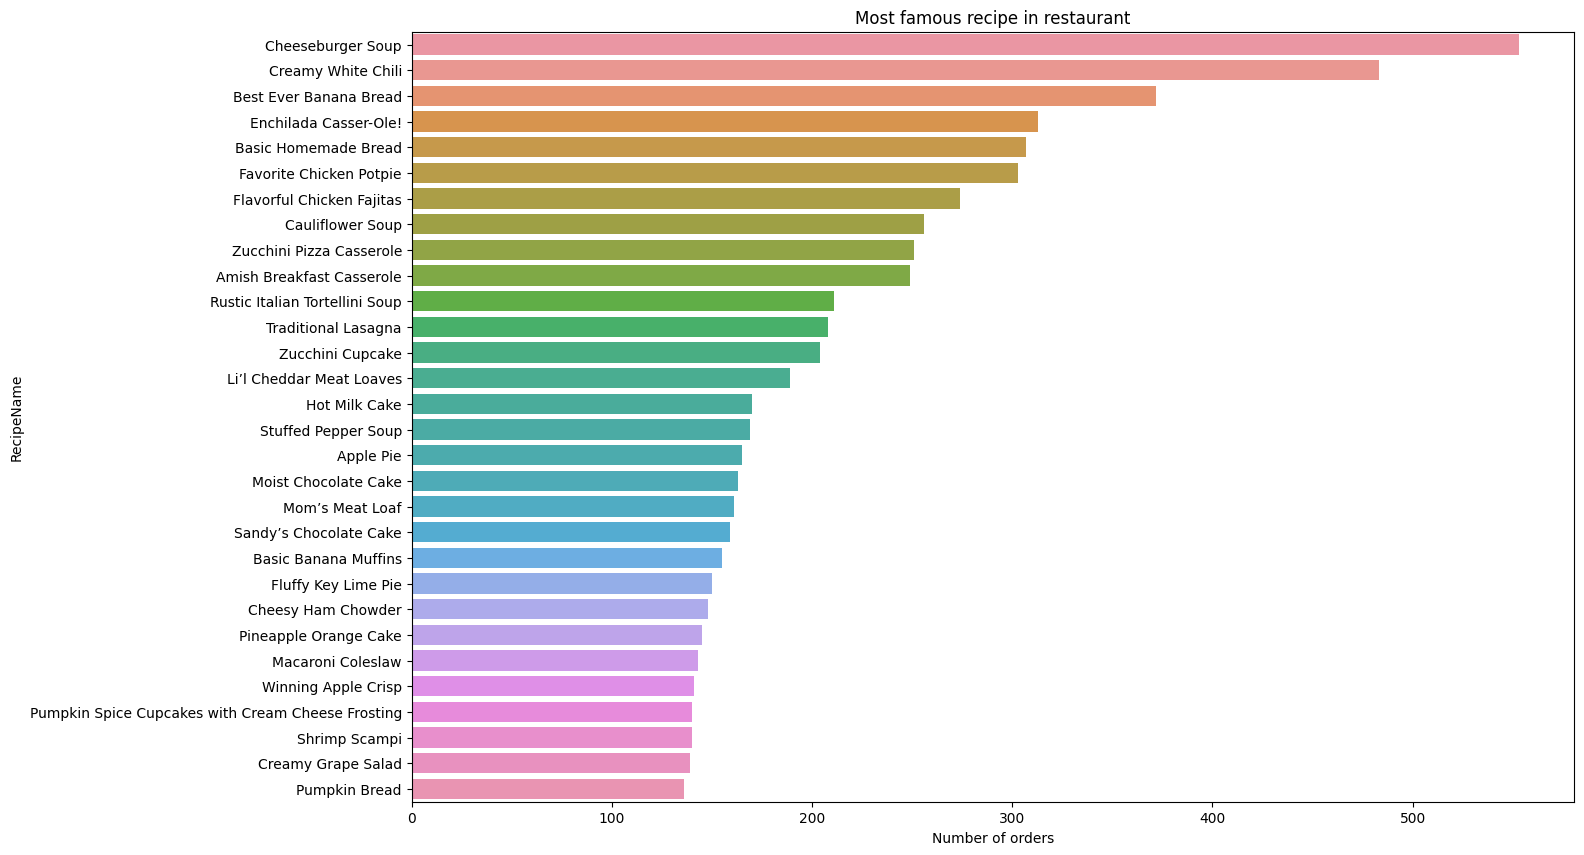

In [46]:
plt.figure(figsize=(15, 10))
df1 = df['RecipeName'].value_counts()[:30]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous recipe in restaurant')
plt.xlabel('Number of orders')
plt.show()

In [47]:
df['Recipe_Review'].value_counts().values[:30]

array([12,  7,  7,  6,  6,  6,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2])

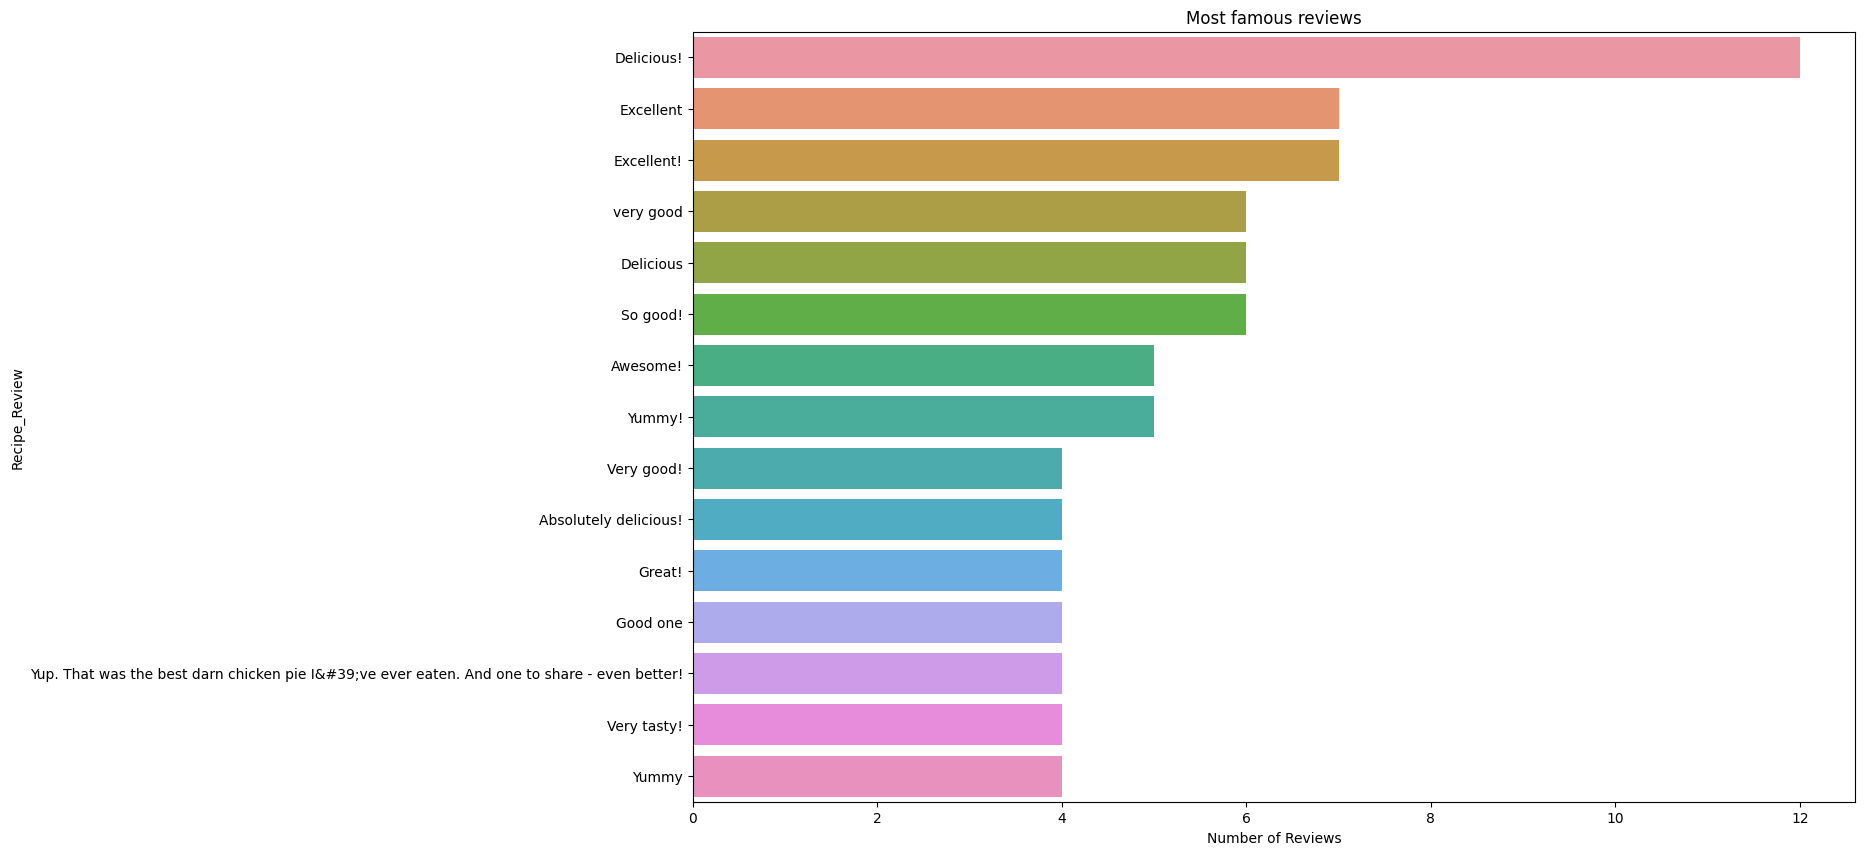

In [48]:
plt.figure(figsize=(15, 10))
df1 = df['Recipe_Review'].value_counts()[:15]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous reviews')
plt.xlabel('Number of Reviews')
plt.show()

## BiVariate analysis


In [49]:
df[['UserName','Rating']].value_counts()

UserName         Rating
2124arizona      5         20
justmbeth        5         17
No_Time_To_Cook  5         16
gunslinger       5         15
mjlouk           5         15
                           ..
Monona           1          1
Montana86        1          1
                 5          1
MooMooPIE11      5          1
annecooks        4          1
Name: count, Length: 11201, dtype: int64

In [50]:
comp1= df[['UserName','Rating']].value_counts().reset_index()
comp1

,UserName,Rating,count
0,2124arizona,5,20
1,justmbeth,5,17
2,No_Time_To_Cook,5,16
3,gunslinger,5,15
4,mjlouk,5,15
...,...,...,...
11196,Monona,1,1
11197,Montana86,1,1
11198,Montana86,5,1
11199,MooMooPIE11,5,1


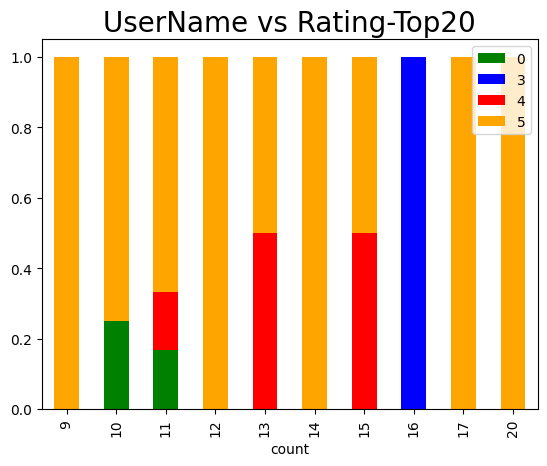

In [51]:
Y = pd.crosstab(comp1['count'][0:20], df['Rating'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green','blue','red','orange','hotpink','cyan'])
plt.title('UserName vs Rating-Top20', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

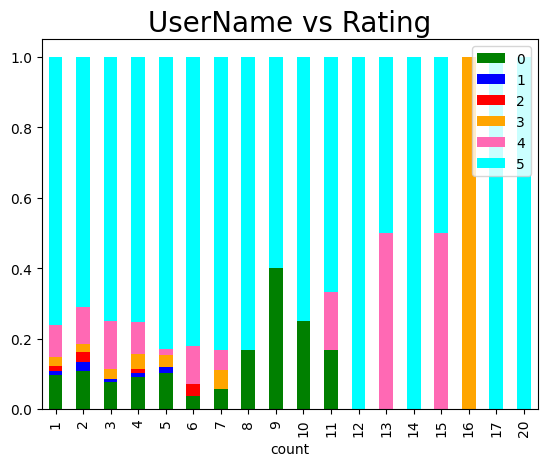

In [52]:
Y1 = pd.crosstab(comp1['count'], df['Rating'])
Y1.div(Y1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green','blue','red','orange','hotpink','cyan'])
plt.title('UserName vs Rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [53]:
# 'UserName'vs'BestScore'
comp2= df[['UserName','BestScore']].value_counts().reset_index()
comp2

,UserName,BestScore,count
0,2124arizona,100,15
1,justmbeth,100,15
2,mjlouk,100,14
3,jmkasprak,100,13
4,No_Time_To_Cook,100,12
...,...,...,...
11336,Milysa,100,1
11337,Mimi573,590,1
11338,MimiCT,100,1
11339,Mimigar,100,1


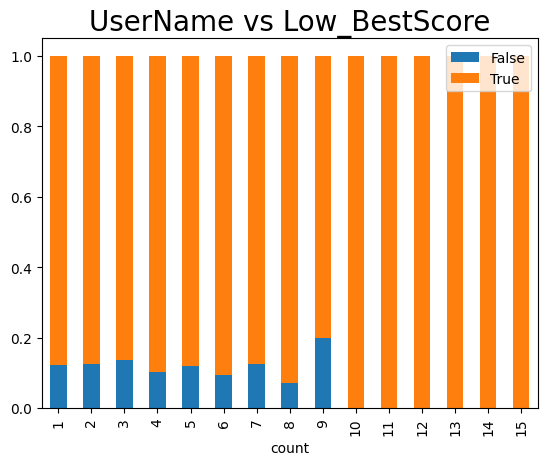

In [54]:
#This are the count of BestScores below 200 given by the User. 

Y2 = pd.crosstab(comp2['count'], df['BestScore']<200)
Y2.div(Y2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('UserName vs Low_BestScore', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

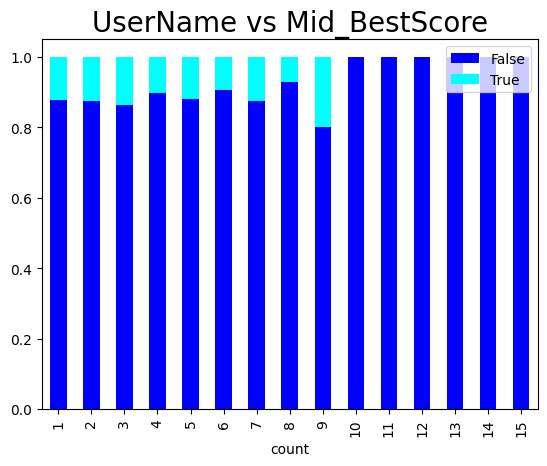

In [56]:
#This are the count of BestScores above 200 given by the User. 

Y3 = pd.crosstab(comp2['count'], df['BestScore']>200)
Y3.div(Y3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color =['blue','cyan'])
plt.title('UserName vs Mid_BestScore', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

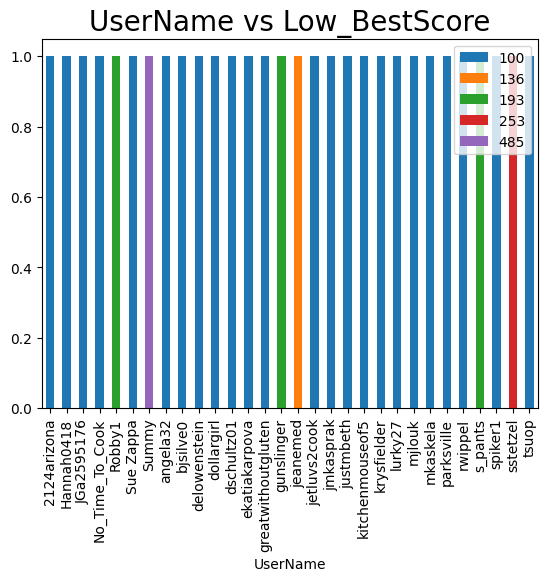

In [57]:
# This is the plot of top 30 UserName who has given Best Scores ..which only compose of scores 100 to 485

Y4 = pd.crosstab(comp2['UserName'][0:30], df['BestScore'])
Y4.div(Y4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('UserName vs Low_BestScore', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [60]:
## This are the UserNames and their Count , who has given BestScore greater than 500 for a Recipe
comp3=df[df['BestScore']>200]['UserName'].value_counts().reset_index()
comp3

,UserName,count
0,grandmascooking22,12
1,resalee,6
2,sgronholz,6
3,dlynsmith9,5
4,2124arizona,5
...,...,...
1512,StephanieLambert,1
1513,Cornwall,1
1514,Lynda1111,1
1515,Teresa290,1


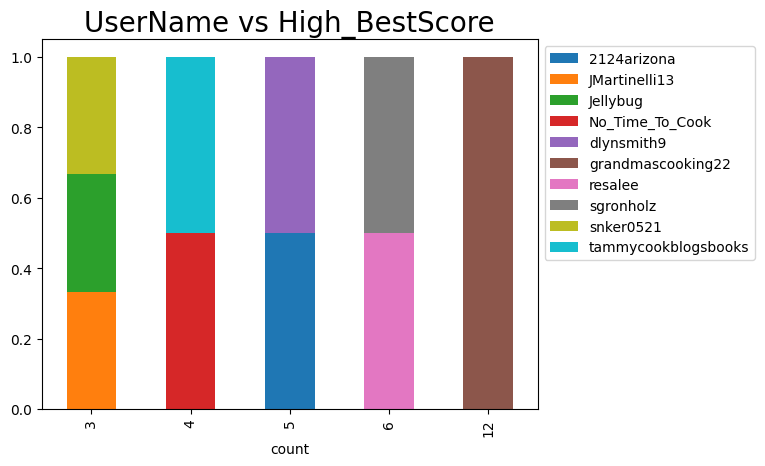

In [62]:
# Plot of top 10 UserNames who has given Best score above 500
Y5 = pd.crosstab(comp3['count'], comp3['UserName'][0:10])
Y5.div(Y5.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('UserName vs High_BestScore', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [64]:
df['CreationTimestamp'].value_counts()

CreationTimestamp
1622648873    59
1622648881    32
1622648872    29
1622718408    28
1622717924    28
              ..
1656521871     1
1661654013     1
1642792803     1
1622717701     1
1645402286     1
Name: count, Length: 2422, dtype: int64

In [65]:
comp4 = df[['CreationTimestamp','RecipeNumber']].value_counts().reset_index()
comp4

,CreationTimestamp,RecipeNumber,count
0,1622648883,6,11
1,1622648883,12,10
2,1622648872,89,9
3,1622648880,3,8
4,1622648884,13,8
...,...,...,...
12557,1622717439,3,1
12558,1622717439,20,1
12559,1622717439,23,1
12560,1622717439,35,1


<Axes: xlabel='CreationTimestamp', ylabel='Density'>

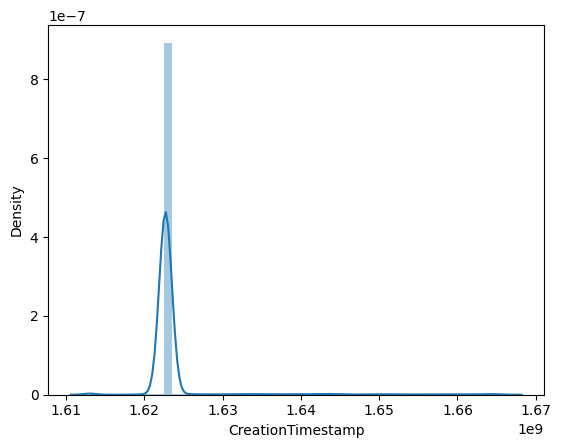

In [66]:
#Densityplot of creationTimestamp
sns.distplot(df['CreationTimestamp'])

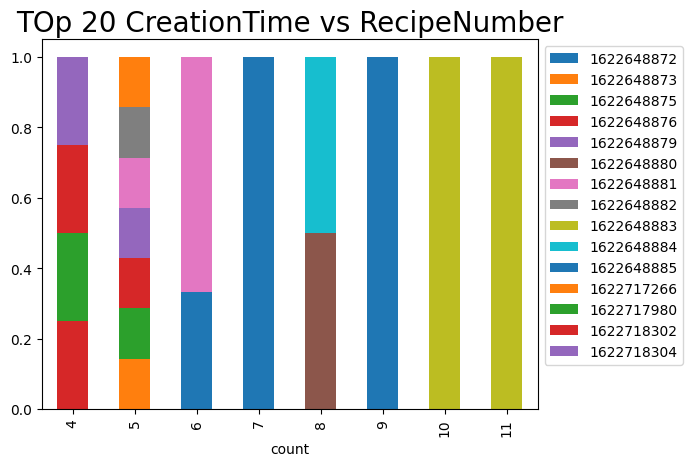

In [67]:
# The count of RecipNumber which has ordered for a particular time 
Y6 = pd.crosstab(comp4['count'], comp4['CreationTimestamp'][0:20])
Y6.div(Y6.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('TOp 20 CreationTime vs RecipeNumber', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

**Now grouping some features together..like RecipeName, BestScore, Rating to observe the recipeName which has similar best score and rating.**

In [68]:
df.groupby(['RecipeName','BestScore','Rating']).size().reset_index()


,RecipeName,BestScore,Rating,0
0,Amish Breakfast Casserole,4,5,1
1,Amish Breakfast Casserole,100,0,3
2,Amish Breakfast Casserole,100,1,4
3,Amish Breakfast Casserole,100,3,6
4,Amish Breakfast Casserole,100,4,22
...,...,...,...,...
2482,Zucchini Pizza Casserole,766,5,1
2483,Zucchini Pizza Casserole,768,5,1
2484,Zucchini Pizza Casserole,811,5,1
2485,Zucchini Pizza Casserole,813,5,1


In [ ]:
#df.groupby(['RecipeName','UserName','BestScore','Rating']).size().reset_index()

In [ ]:
#df.groupby(['RecipeName','UserName','Rating']).size()

In [ ]:
#df.groupby(['RecipeName','UserName','Rating']).size().reset_index()

In [ ]:
#df.groupby(['RecipeName','UserName','BestScore']).size()

In [69]:
relation1 = df.groupby(['RecipeName','BestScore','Rating']).size().reset_index().rename(columns={0:'Count'})
relation1

,RecipeName,BestScore,Rating,Count
0,Amish Breakfast Casserole,4,5,1
1,Amish Breakfast Casserole,100,0,3
2,Amish Breakfast Casserole,100,1,4
3,Amish Breakfast Casserole,100,3,6
4,Amish Breakfast Casserole,100,4,22
...,...,...,...,...
2482,Zucchini Pizza Casserole,766,5,1
2483,Zucchini Pizza Casserole,768,5,1
2484,Zucchini Pizza Casserole,811,5,1
2485,Zucchini Pizza Casserole,813,5,1


**THe above table shows how the different recipe has a different Best score given by the user and parallely the rating towards the recipe with the rating count at the last column.**
But seen a absurdness that the BestScore is very less ie 4 and the rating for that Recipe is 5 

## * Outlier Detection..

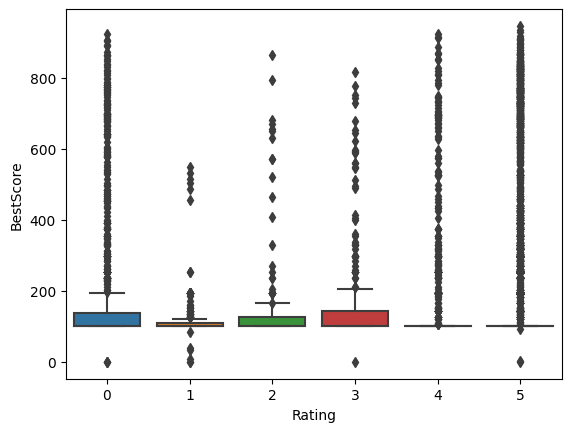

In [70]:
sns.boxplot(x='Rating',y = 'BestScore',data = df);

 >This is the count of ratings in different classes ranging (0-5) recieved for all RecipeName
 
 Obervation:
 The rating recieved for the Recipe have the highest value for the rating 5 but the absurdness is that the 

In [71]:
relation2 = df[['BestScore','Rating']].groupby(['BestScore','Rating']).size().reset_index().rename(columns={0:'BS_RCount'})
relation2

,BestScore,Rating,BS_RCount
0,0,0,3
1,0,1,1
2,0,3,1
3,0,5,1
4,1,1,1
...,...,...,...
802,922,0,1
803,922,4,1
804,928,5,1
805,934,5,1


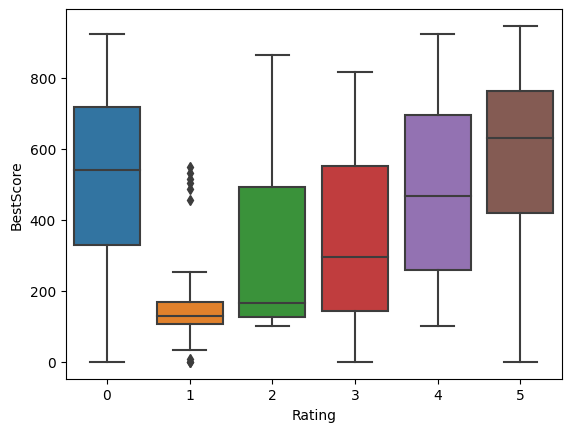

In [72]:
sns.boxplot(y='BestScore',x = 'Rating',data = relation2);

In [ ]:
#relation2[relation2['Rating']==1 & relation2['BestScore']>400]

<Axes: xlabel='Rating', ylabel='BestScore'>

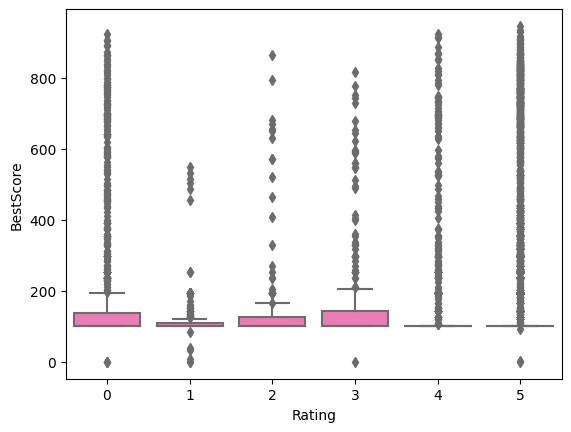

In [73]:
sns.boxplot(data= df,y='BestScore',x='Rating',color='hotpink')

So Here we can see that from above two graphs that the rating 1 and the bestscore above 400 is an outlier...

In [74]:
df[(df['Rating']==1)& (df['BestScore']>400)]


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
3082,13,20,6504,Mom’s Meat Loaf,sp_aUSaElGf_6504_c_1yXTQFCofNGDzwHTpAfsk78ok6U,u_KIQp2IK3hYP8,Lynda984,1,1635278703,0,13,62,1,505,"this was the worst meat loaf ,there was no tas..."
5707,0,87,11330,Twice-Baked Potato Casserole,sp_aUSaElGf_11330_c_2CjWxhXRHwqEg6lVvTA026AWNiG,u_MK7F3PWf5xnV,Karen3353,1,1659648417,0,0,0,1,488,I definitely don’t recommend this recipe witho...
7238,3,77,16458,Cherry Bars,sp_aUSaElGf_16458_c_2CFx3YJeaaUWtEBekOzRPfh91oB,u_SiNlXIIOGHVE,Foxycook,100,1658411935,0,3,32,1,550,Every year for our family picnic my sister-n-l...
10683,23,13,32480,Basic Homemade Bread,sp_aUSaElGf_32480_c_1uOxaOQdnTFAmrx4OIhdIsjcbvK,u_hZL1PvEAXM7n,Diamond095,1,1632245743,0,13,39,1,533,The recipe is too salty 😅
11119,1,41,35948,Caramel-Pecan Cheesecake Pie,sp_aUSaElGf_35948_c_21LxzU65KZhMu9T8Q9TSn8zOJSI,u_ncPDkXrtaexg,Mitchell072,1,1637734430,1,0,1,1,516,Why is the batter runny? Made it just like it ...
11976,3,96,3290,Brown Sugar Oatmeal Pancakes,sp_aUSaElGf_3290_c_1xV4bsxSuxJA76Gp5j5Y0FVtT8o,u_bcmiL5Oz9OvJ,Alan710,1,1630515755,0,1,8,1,456,I found this to be a rather horrible recipe. T...


## Dropping the outlier from the dataset..

In [75]:
df[(df['Rating']==1)& (df['BestScore']>400)].index

Index([3082, 5707, 7238, 10683, 11119, 11976], dtype='int64')

In [76]:
df[(df['Rating']==1)& (df['BestScore']<40)]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
4059,95,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_388564,u_1oKd7OGtkT2cHxcC4DoEmHiAd7D,judy,1,1658019072,0,0,1,1,0,"Have not made this, would like to know what re..."
5203,44,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_428456,u_1oKWX4a8A6MMPbGnDbt7LeyC59u,GaryPhillips,10,1630527302,0,7,39,1,34,At a loss how this recipe became a contest win...
7491,22,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_394554,u_1oKc37S7gXGRL4Rh0CFwVcT3jTe,Landon,1,1664753210,0,5,126,1,7,I love it it is the BEST SOUP EVER that is why...
8197,25,44,31278,Corn Pudding,sp_aUSaElGf_31278_c_397098,u_1oKb5ezPW17kihGHXCtuGTKaABS,HenrySadowski,1,1655586592,1,1,46,1,1,I make corn pudding with fresh corn cut off th...
12140,15,29,3058,Winning Apple Crisp,sp_aUSaElGf_3058_c_410710,u_1oKcwInZl7QdT9YziRpOjVNqxyF,Bridget,10,1626248228,0,5,21,1,38,So bad. The corn starch makes it extremely glu...


In [77]:
df[(df['Rating']==1)& (df['BestScore']<40)].index

Index([4059, 5203, 7491, 8197, 12140], dtype='int64')

In [78]:
df[(df['Rating']==2)& (df['BestScore']>700)].index

Index([10079, 12310], dtype='int64')

In [ ]:
#labels = (3082, 5707, 7238, 10683, 11119, 11976,4059, 5203, 7491, 8197, 12140,10079, 12310)

In [3]:
df.drop(df.index[[3082, 5707, 7238, 10683, 11119, 11976,4059, 5203, 7491, 8197, 12140]],inplace = True)


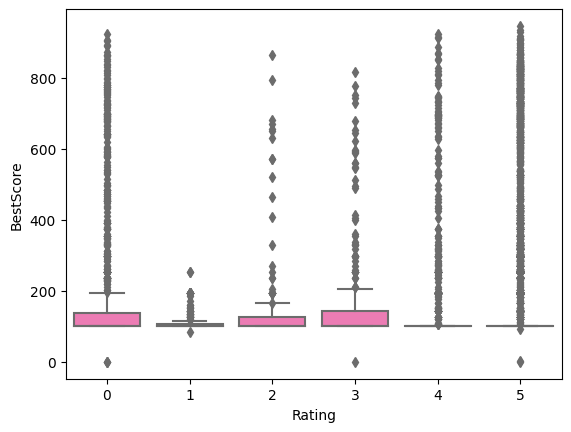

In [80]:
sns.boxplot(data= df,y='BestScore',x='Rating',color='hotpink');

In [ ]:
#relation3 = df.groupby(['RecipeNumber','Rating']).size().reset_index().rename(columns={0:'RNCount'})
#relation3

In [ ]:
#plt.figure(figsize=(30,20))
#sns.boxplot(x='RNCount',y = 'RecipeNumber',data = relation3);

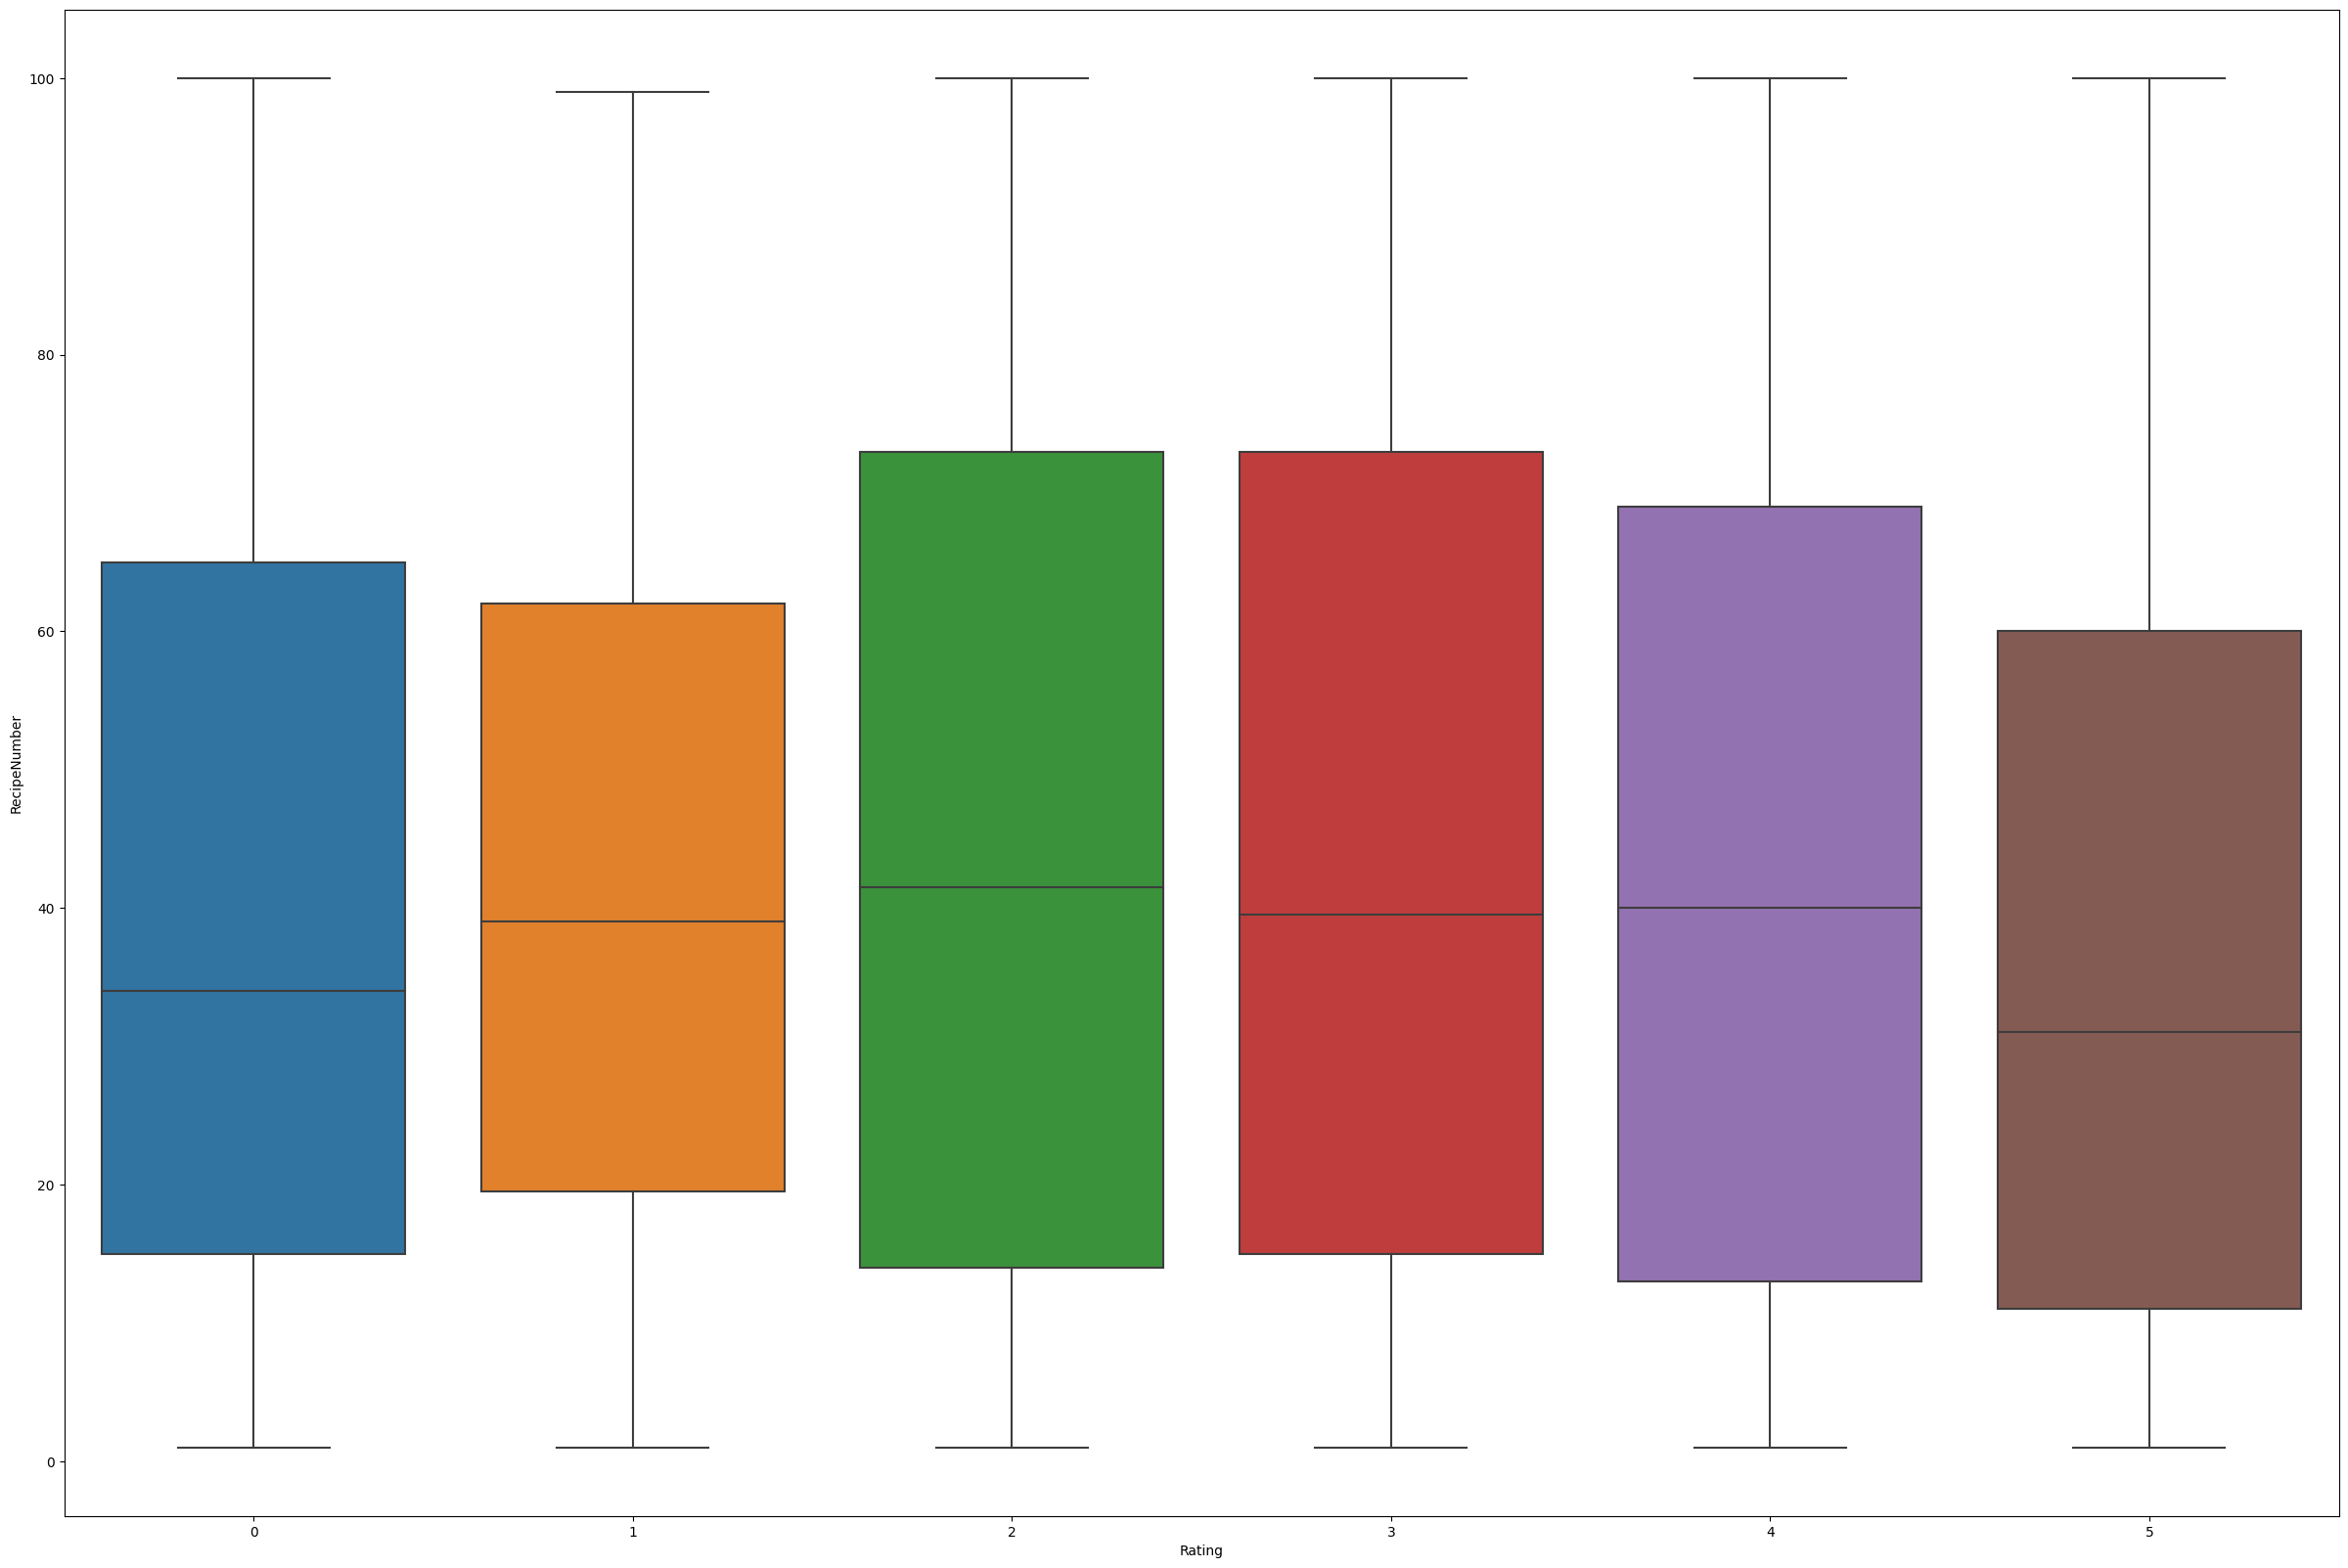

In [81]:
plt.figure(figsize=(30,20))
sns.boxplot(y='RecipeNumber',x = 'Rating',data = df);

In [82]:
relation4 = df.groupby(['RecipeNumber','BestScore']).size().reset_index().rename(columns={0:'RN_BSCount'})
relation4

,RecipeNumber,BestScore,RN_BSCount
0,1,100,428
1,1,113,1
2,1,127,3
3,1,148,1
4,1,193,12
...,...,...,...
1788,100,762,1
1789,100,766,1
1790,100,793,1
1791,100,833,1


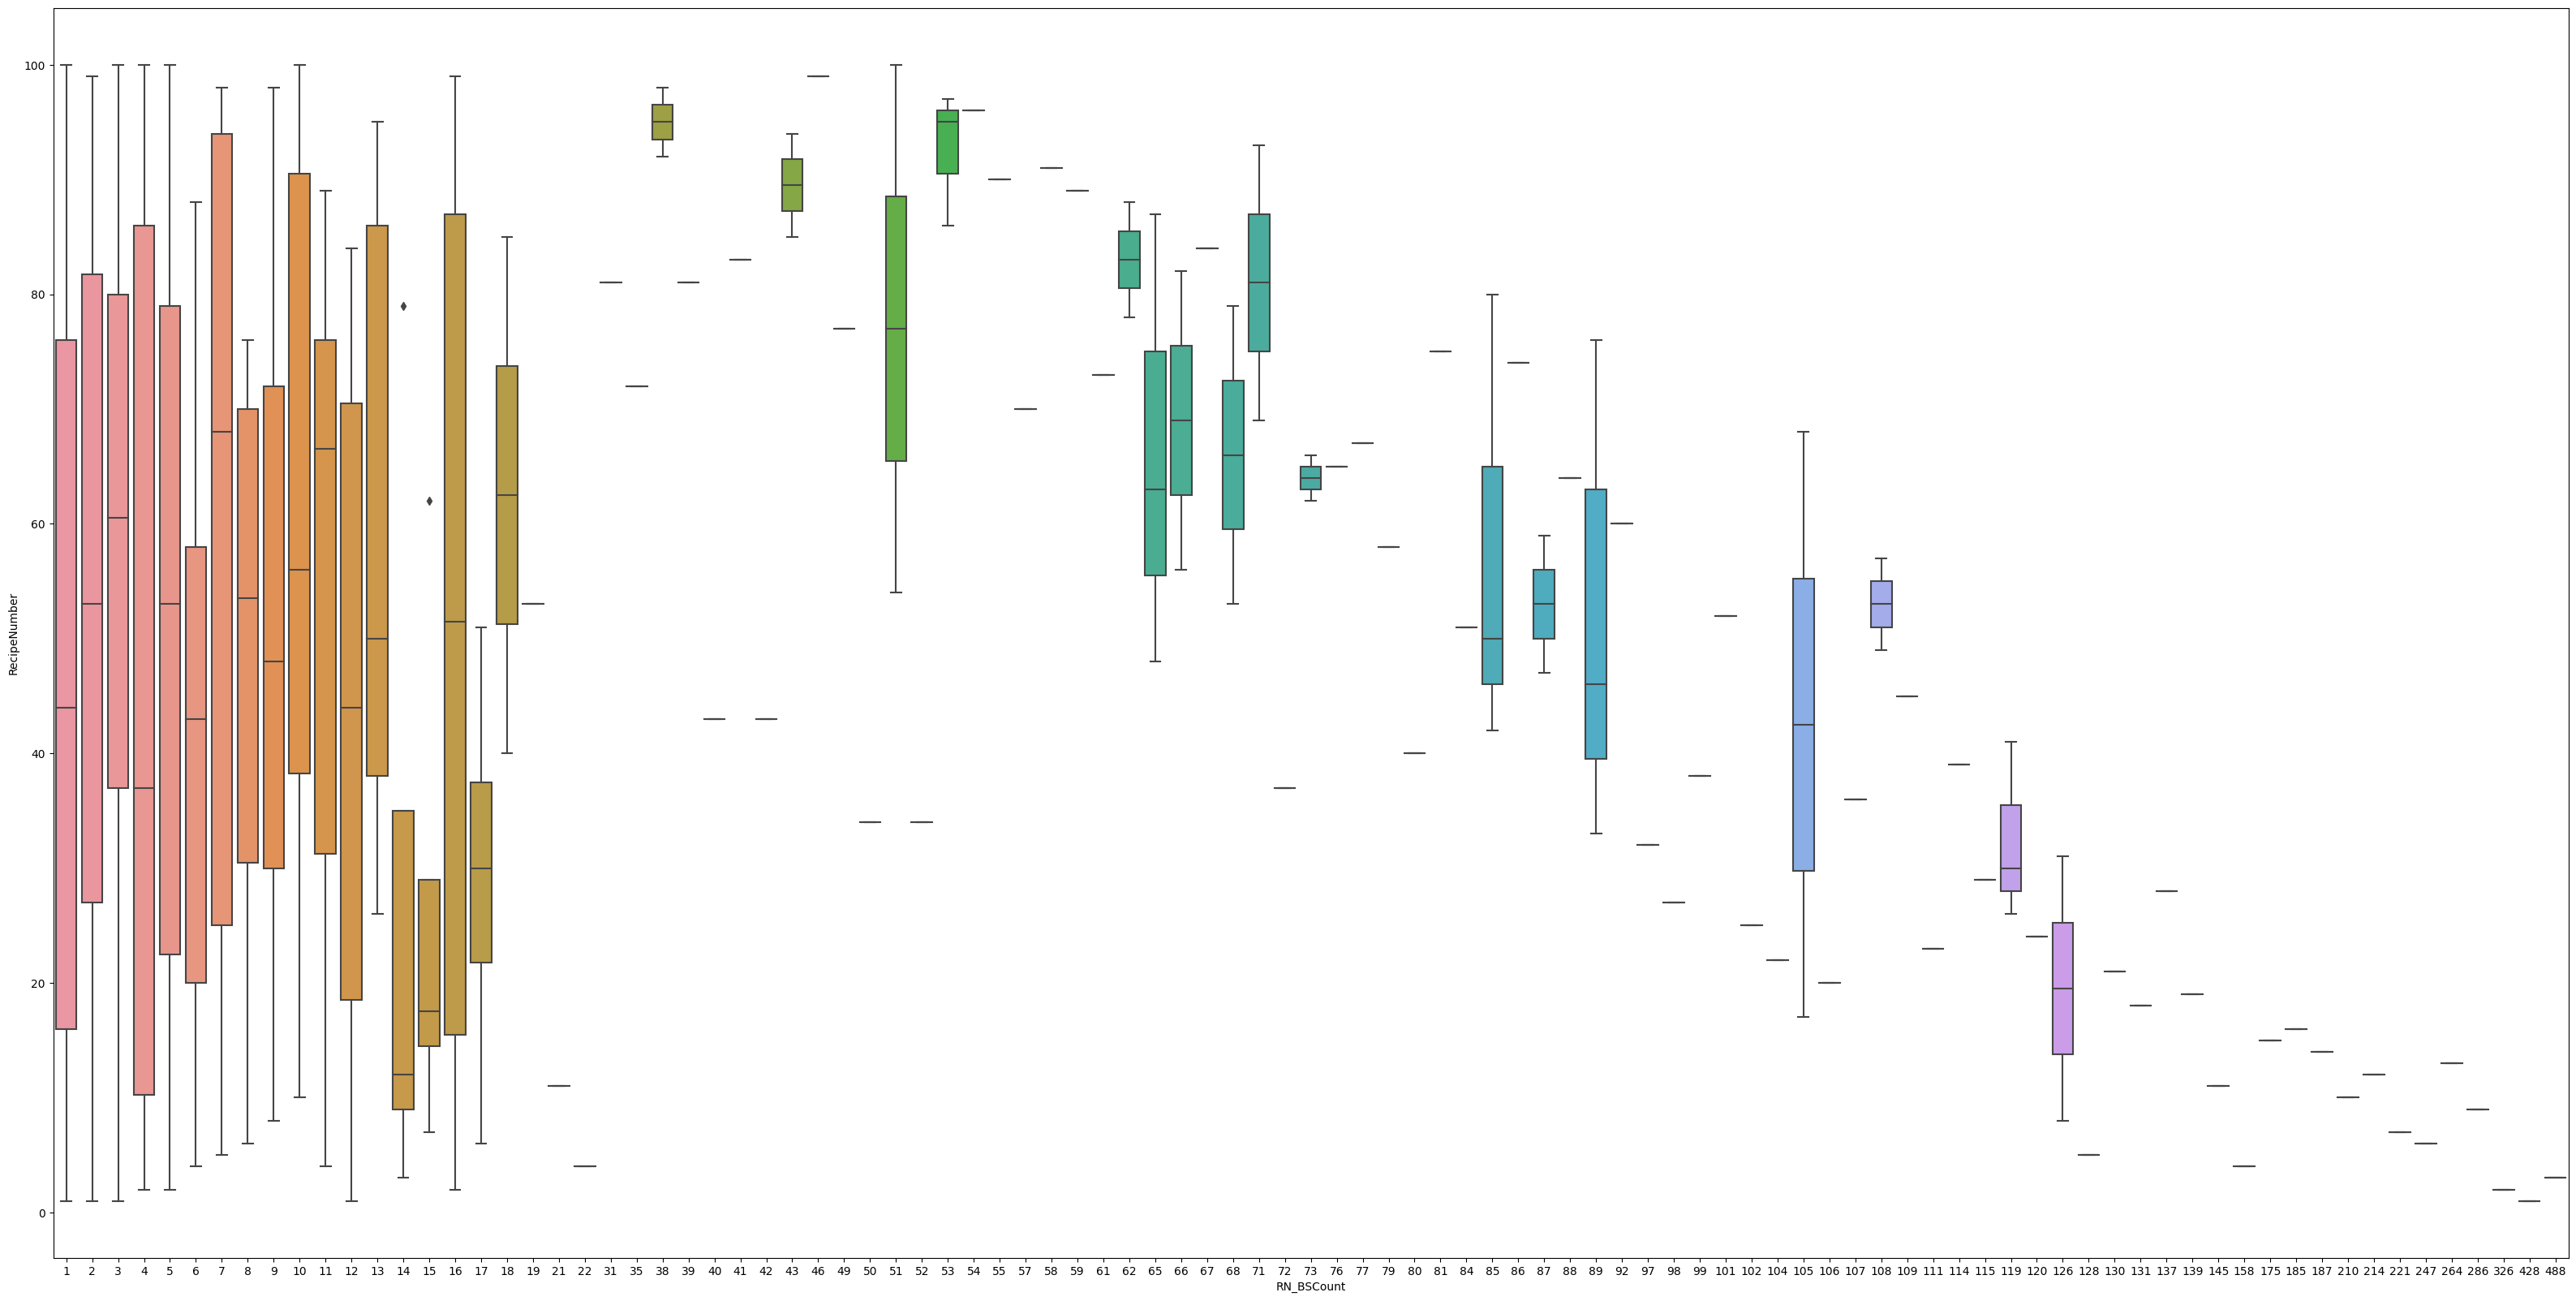

In [83]:
plt.figure(figsize=(40,20))
sns.boxplot(y='RecipeNumber',x = 'RN_BSCount',data = relation4);

In [ ]:
#x = df[(df['Rating']==1) & (df['BestScore']>400)]
#x.index

In [84]:
#plotting the correlation matrix
corr_matrix = df[['ID', 'RecipeNumber', 'RecipeCode','UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']].corr()
corr_matrix

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
ID,1.000000,-0.494759,-0.157529,-0.063027,-0.196226,-0.092991,-0.225976,-0.143265,0.048323,-0.318545
RecipeNumber,-0.494759,1.000000,0.300031,0.021361,0.032623,0.026532,0.065197,0.054927,-0.042834,0.085779
RecipeCode,-0.157529,0.300031,1.000000,0.016274,0.003107,-0.019905,0.014629,0.007026,-0.021312,0.025965
UserReputation,-0.063027,0.021361,0.016274,1.000000,0.171933,0.014352,0.053643,0.018626,0.016742,0.125507
CreationTimestamp,-0.196226,0.032623,0.003107,0.171933,1.000000,0.169421,0.320922,0.188225,-0.055241,0.686310
ReplyCount,-0.092991,0.026532,-0.019905,0.014352,0.169421,1.000000,0.222156,0.317902,-0.123459,0.210763
ThumbsUpCount,-0.225976,0.065197,0.014629,0.053643,0.320922,0.222156,1.000000,0.421404,-0.050535,0.694261
ThumbsDownCount,-0.143265,0.054927,0.007026,0.018626,0.188225,0.317902,0.421404,1.000000,-0.137775,0.247986
Rating,0.048323,-0.042834,-0.021312,0.016742,-0.055241,-0.123459,-0.050535,-0.137775,1.000000,-0.035240
BestScore,-0.318545,0.085779,0.025965,0.125507,0.686310,0.210763,0.694261,0.247986,-0.035240,1.000000


<Axes: >

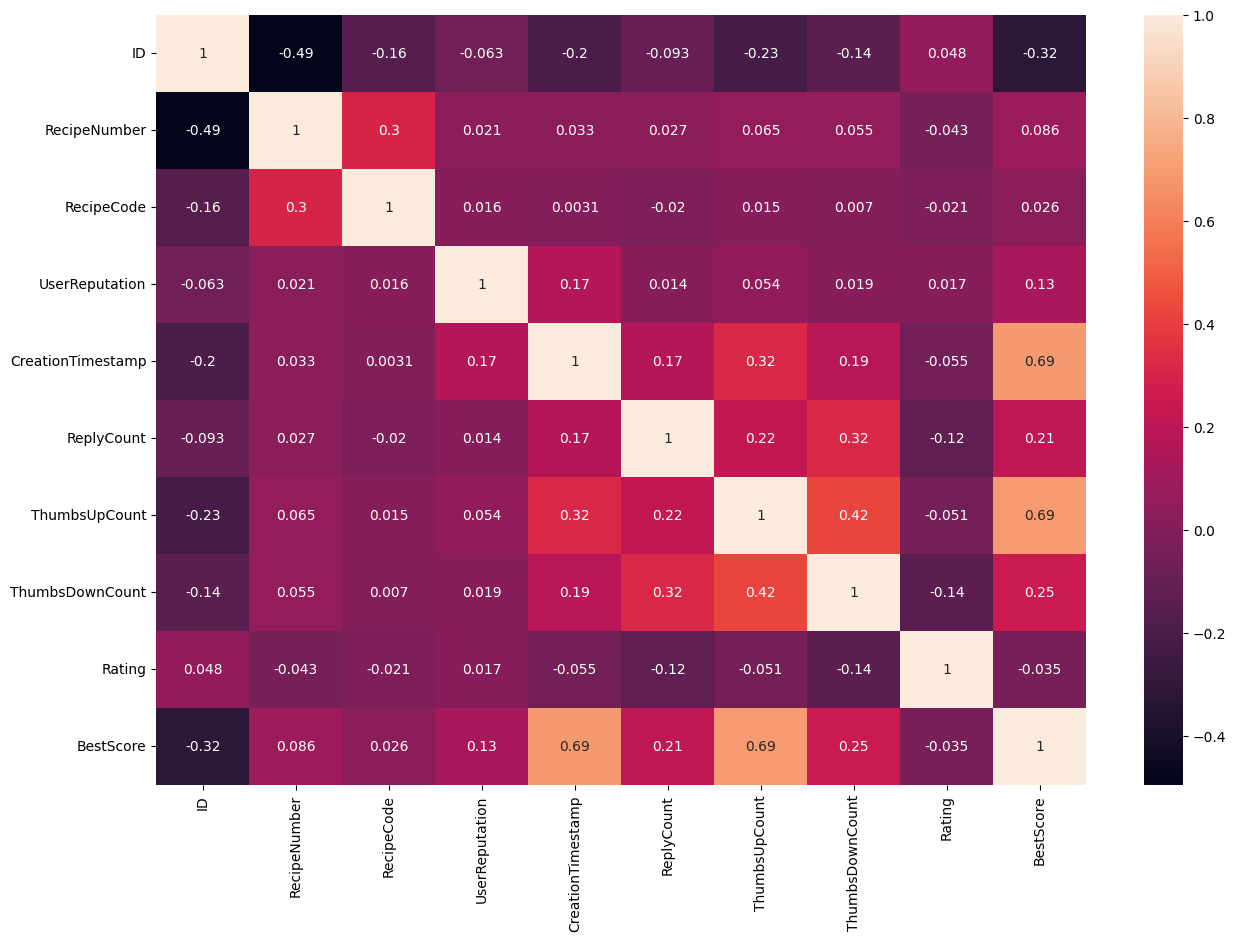

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

> It shows that how CreationTimestamp is correlated with Best Score and ThumbsUpcount..
so I don't need to take creationTimestamp and thumbsUpcount for the model making...


In [4]:
#Loading the Test Dataset and performing the EDA on that dataset...

#dftest = dataframe of test data

dftest = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [87]:
dftest

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_310012,u_1oKYP0QIv00q3K9Z5U0TosT5gYx,jsantullo,1,1622717899,0,0,0,100,This is an absolutely wonderful seafood recipe...
4542,121,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_331905,u_1oKVlhuSfIH4M8gwWLvmkvs3215,homeoftaste,1,1622717990,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...
4543,133,73,41095,Contest-Winning New England Clam Chowder,sp_aUSaElGf_41095_c_112060,u_1oKVb3oC9QR5uDI8OqeaPncMtBe,cmfisher,1,1622716903,0,0,0,100,absolutely great....even husband and grandson ...
4544,91,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_391682,u_1oKcs7T7xAY63ZrRKCwH8ccshww,danalu8,1,1622718289,0,0,1,100,I followed directions. It tastes very bland. V...


In [88]:
dftest.shape

(4546, 14)

In [89]:
dftest.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Recipe_Review'],
      dtype='object')

Here the target label is missing that is the rating feature....

In [90]:
dftest.dtypes

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
BestScore             int64
Recipe_Review        object
dtype: object

In [91]:
dftest.duplicated().sum()

0

In [92]:
dftest.nunique()

ID                    525
RecipeNumber          100
RecipeCode            100
RecipeName            100
CommentID            4546
UserID               4060
UserName             4029
UserReputation         14
CreationTimestamp    1688
ReplyCount              4
ThumbsUpCount          46
ThumbsDownCount        38
BestScore             275
Recipe_Review        4510
dtype: int64

> From Above unique values the conclusions drawn are:

* There are 100 unique RecipeName or RecipeCode or RecipeName(dealing with one feature will be possible)
* There are 4546 comments which matches with the rows of the dftest.
* There are 4060 unique UserID which doesn't matches with the UserName so the username are repeated.
* The commentID doesn't matches with the UserID that means some user has commented more than once for a particular recipe.
* For every rating and review and recipe there is a unique commentID...
* The ThumbsUpCount and ThumbsDownCount shows how many have of them replied thumbsUp and thumbsDown for a particular recipe
* There are 6 type of rating given to the food ranging(0-5) which makes it a multiclass classification problem.
* The recipe_review and commentID doesn;t matches means reviews are repeated for a particular recipe.


In [93]:
dftest.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000,4546.000000
mean,122.605147,38.884294,21736.701936,2.157501,1.623702e+09,0.014958,1.062253,0.566212,153.264848
std,116.006955,30.129333,24211.777711,9.797366,5.542652e+06,0.139922,4.303231,4.021903,141.355650
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,12.000000
25%,46.000000,11.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,92.000000,32.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,154.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,715.000000,100.000000,191775.000000,520.000000,1.665669e+09,3.000000,106.000000,122.000000,931.000000


> Conclusion from above stats(double click here)
 
 The count of every feature is 4546
    Feature               Min_value   Max_value   Mean_value
1.   ID                      0.         715         122
2. RecipeNumber.             1          100        38.82  * It means most of the recipe ordered have lower RecipeNumber
3. Recipecode                386      191775       21785.99
4. UserReputation.          10          520          2.15
6. BestScore.                0          946          153 * It tells us about the Score given to the Recipe is least 0 and highest 946 and the mean tells us that the lower scores presence are more.

The explanation to the above mean value and its significance given in below 5 cells of code.



Going feature by feature and observing the Numerical features of test dataset..

In [94]:
print(dftest['ID'].value_counts()) 
dftest['ID'].value_counts().index

ID
67     38
22     37
85     36
72     33
41     32
       ..
646     1
494     1
466     1
405     1
423     1
Name: count, Length: 525, dtype: int64


Index([ 67,  22,  85,  72,  41,   2,  52,   9,  23, 111,
       ...
       449, 325, 536, 562, 612, 646, 494, 466, 405, 423],
      dtype='int64', name='ID', length=525)

In [95]:
dftest['RecipeNumber'].value_counts()

RecipeNumber
3     172
1     171
2     137
9     108
7      94
     ... 
91     22
70     21
97     21
43     20
61     12
Name: count, Length: 100, dtype: int64

In [96]:
dftest['UserReputation'].value_counts()

UserReputation
1      4228
10      179
20       68
0        33
30       20
80        5
40        3
100       2
60        2
50        2
70        1
130       1
170       1
520       1
Name: count, dtype: int64

In [97]:
print(dftest['BestScore'].value_counts())
dftest['BestScore'].value_counts().head(20)

BestScore
100    3496
193     375
253      84
142      54
297      47
       ... 
447       1
761       1
744       1
344       1
834       1
Name: count, Length: 275, dtype: int64


BestScore
100    3496
193     375
253      84
142      54
297      47
329      32
235      18
127      14
374      14
167      10
203      10
354      10
284       7
296       7
404       6
120       6
390       6
723       4
143       4
171       4
Name: count, dtype: int64

In [98]:
##Exploring the missing values...

pd.isnull(dftest)


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4542,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4543,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4544,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
pd.isnull(dftest).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

* Looking in the Categorical features...

In [100]:
dftest['RecipeName'].value_counts()

RecipeName
Cheeseburger Soup            172
Creamy White Chili           171
Best Ever Banana Bread       137
Enchilada Casser-Ole!        108
Flavorful Chicken Fajitas     94
                            ... 
Caramel Heavenlies            22
Easy Chicken Enchiladas       21
Lime Chicken Tacos            21
Chunky Apple Cake             20
Vegetarian Linguine           12
Name: count, Length: 100, dtype: int64

In [101]:
uniqtest_RName = dftest['RecipeName'].value_counts().index
uniqtest_RName

Index(['Cheeseburger Soup', 'Creamy White Chili', 'Best Ever Banana Bread',
       'Enchilada Casser-Ole!', 'Flavorful Chicken Fajitas',
       'Favorite Chicken Potpie', 'Basic Homemade Bread',
       'Amish Breakfast Casserole', 'Zucchini Pizza Casserole', 'Apple Pie',
       'Fluffy Key Lime Pie', 'Moist Chocolate Cake', 'Cauliflower Soup',
       'Traditional Lasagna', 'Zucchini Cupcake', 'Li’l Cheddar Meat Loaves',
       'Mom’s Meat Loaf', 'Rustic Italian Tortellini Soup',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Hot Milk Cake',
       'Stuffed Pepper Soup', 'Winning Apple Crisp', 'Sandy’s Chocolate Cake',
       'Buttery Cornbread', 'Gluten-Free Banana Bread', 'Basic Banana Muffins',
       'Macaroni Coleslaw', 'Big Soft Ginger Cookies',
       'Pork Chops with Scalloped Potatoes', 'Cheesy Ham Chowder',
       'Pumpkin Bars', 'Caramel-Pecan Cheesecake Pie', 'Asian Chicken Thighs',
       'Grilled Huli Huli Chicken', 'Ravioli Lasagna', 'Creamy Coleslaw',
     

In [102]:
dftest.UserName.value_counts()

UserName
JGa2595176           11
2124arizona           8
dschultz01            7
angela32              7
delowenstein          7
                     ..
triciac71             1
HoneyBee1             1
lorikb4               1
Kaniz Fatemahappy     1
KrystalK87            1
Name: count, Length: 4029, dtype: int64

In [103]:
dftest.UserID.value_counts()

UserID
u_1oKVeN9YNf07RT0P9R63Yu80P5A    10
u_1oKVZzipo1u8lcqQzDUcw4UBn9e     8
u_1oKVa5FSx8thvFfGGM6whXv482h     7
u_1oKVZxAOR5BEzyF4H6ENc7jwfUW     7
u_1oKViYcsgLsMPuJqQWcDav8rnWB     7
                                 ..
u_1oKZaJ2b2GWYvnOp9feFAzpHY5U     1
u_1oKXSiXIILHVgKuZZVrsLYAILBd     1
u_1oKalTuCSNXi062uDCqOjFH9lGE     1
u_1oKdRZx7MMaBa6fxhcEUtjJypHl     1
u_1oKVnzyJyDQtTpG0U7QQIHaw5o2     1
Name: count, Length: 4060, dtype: int64

In [104]:
dftest[['CommentID','UserID']].groupby(['CommentID','UserID']).size().reset_index()

,CommentID,UserID,0
0,sp_aUSaElGf_100276_c_117252,u_1oKVeJWf0KPBaOuxlIXFwpxRrMg,1
1,sp_aUSaElGf_100276_c_123333,u_1oKVgBLl5J4mYeVN74gqWnOMp2n,1
2,sp_aUSaElGf_100276_c_126906,u_1oKVrknUWrIPz9b6g1EnumVgP5O,1
3,sp_aUSaElGf_100276_c_130609,u_1oKVa0hThBjc7ljLGxKqdbodLiC,1
4,sp_aUSaElGf_100276_c_132364,u_1oKVjarsBmYjTYdXofNvyNGmitn,1
...,...,...,...
4541,sp_aUSaElGf_9739_c_417795,u_1oKc9KRbupmPgvpqaQmpTBBjdAS,1
4542,sp_aUSaElGf_9739_c_418442,u_1oKdWdwTajq6Bbdg3MQl2Yi5rVB,1
4543,sp_aUSaElGf_9739_c_420280,u_1oKdRyieXrluIL6J5aJeSWzwOuq,1
4544,sp_aUSaElGf_9739_c_420375,u_1oKdW2YFGx7FMqvbQNlQFqbAFaV,1


In [105]:
dftest[['CommentID','UserID']].groupby(['CommentID','UserID']).value_counts().sum()


4546

# Data Visualization..

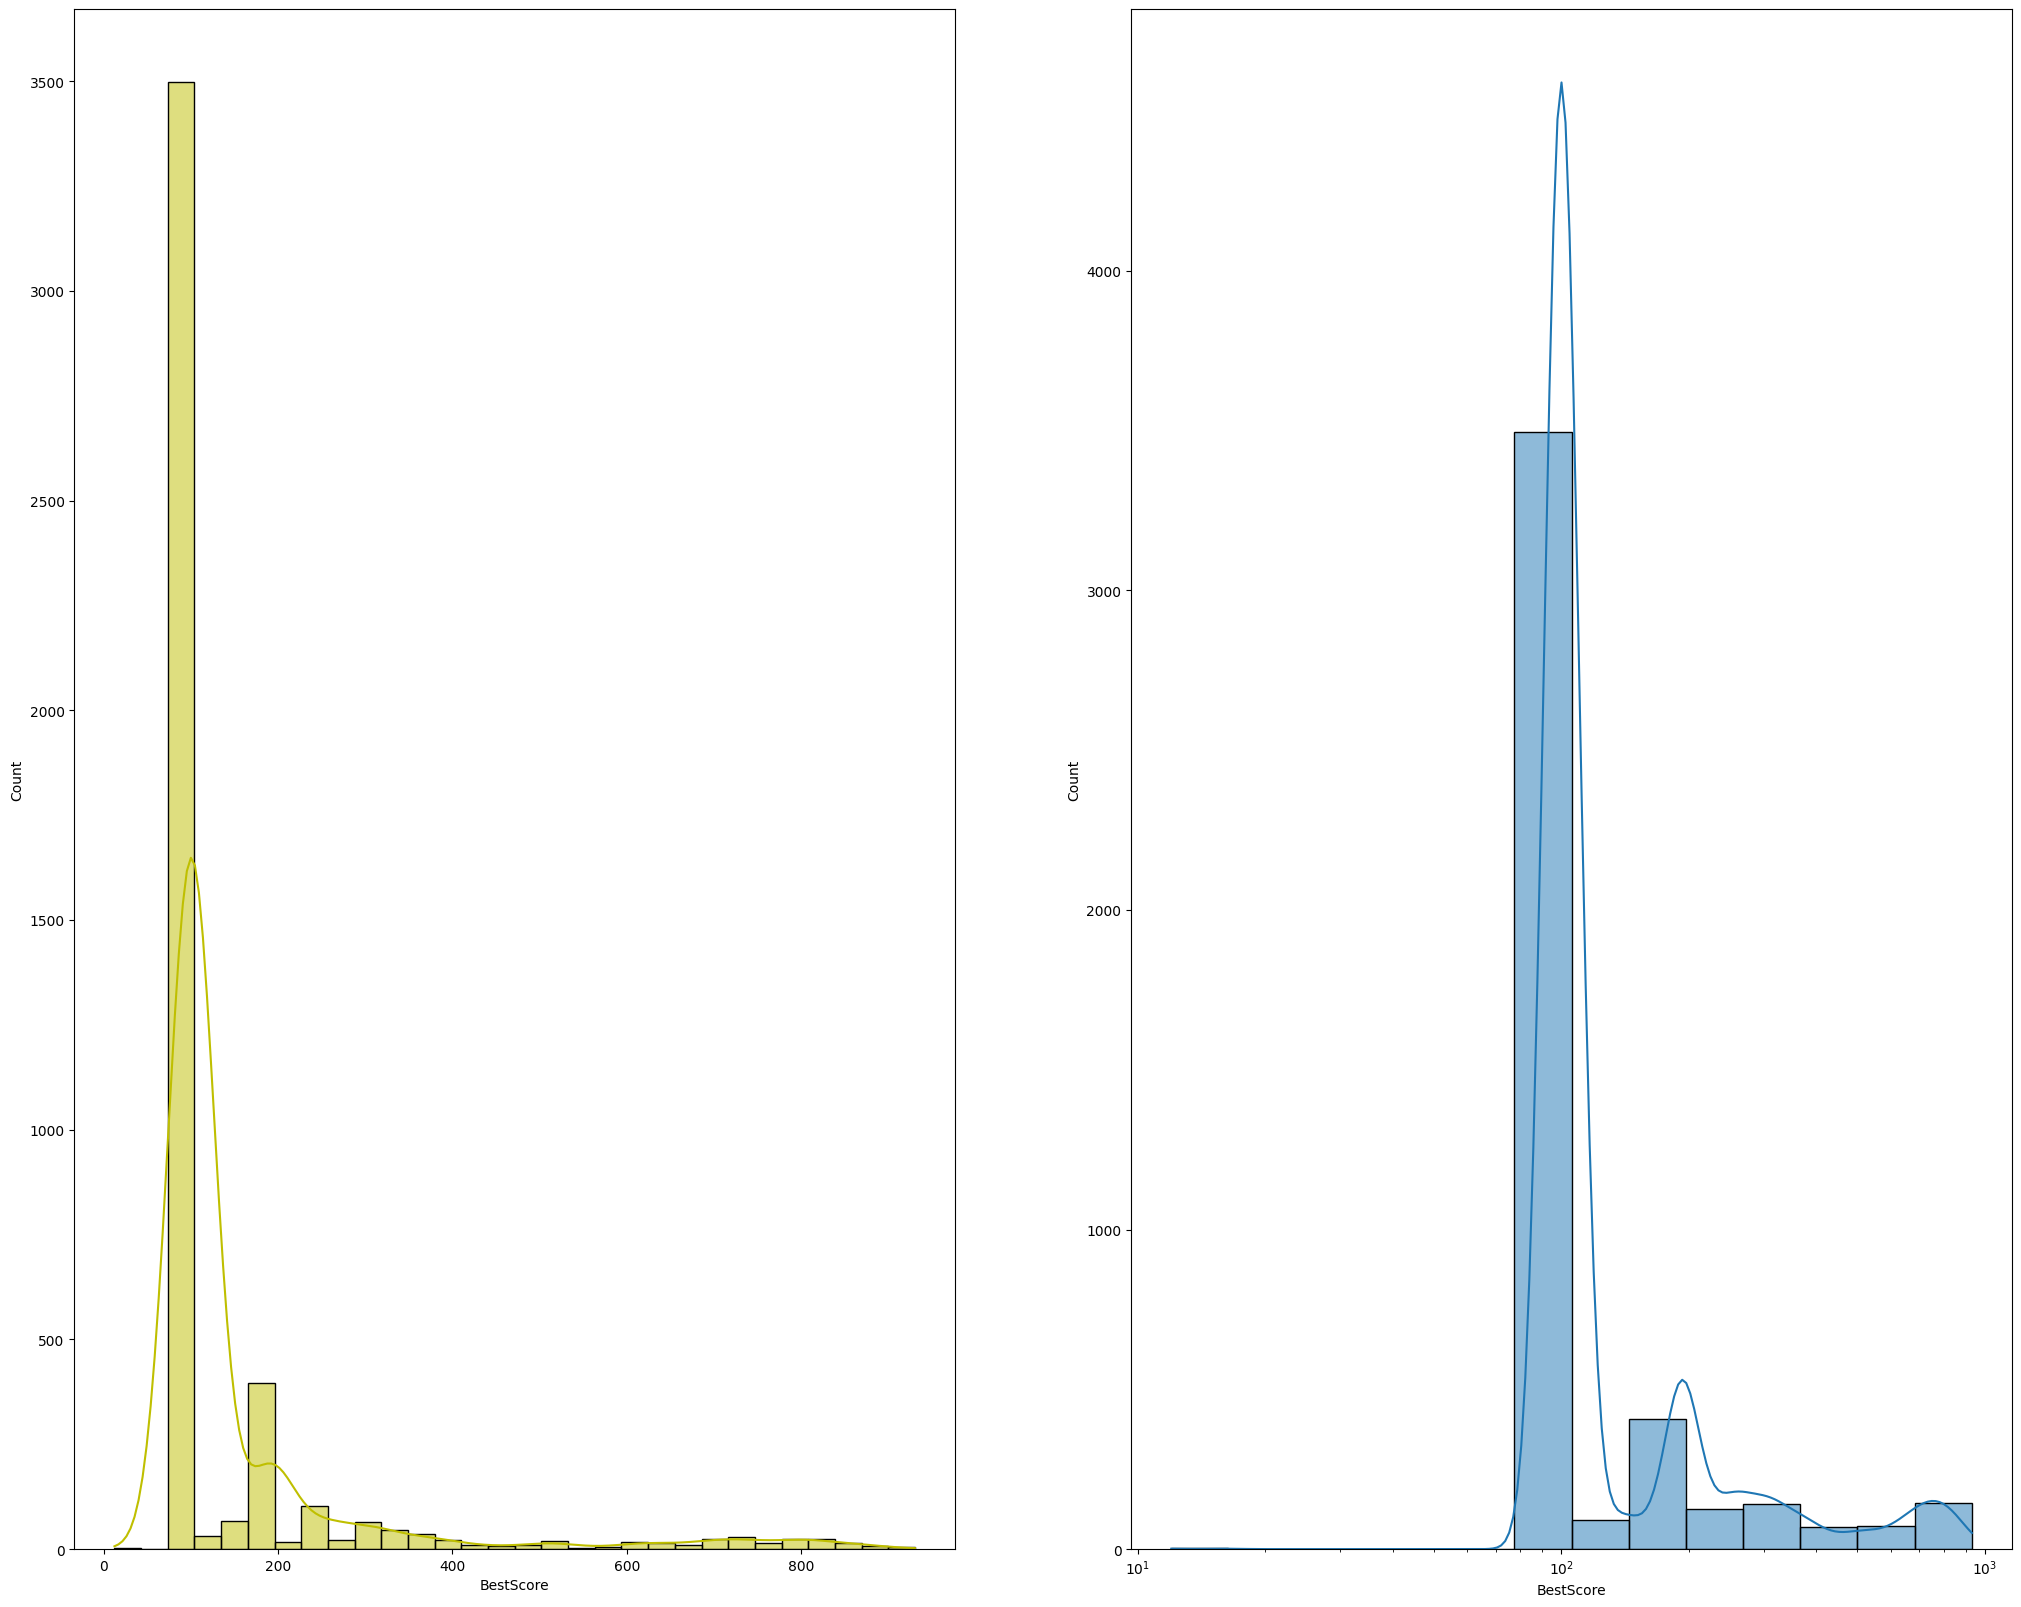

In [106]:
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(1, 2, figsize=(25, 20))
plt.subplot(121)
sns.histplot(data=dftest,x='BestScore',bins=30,kde=True,color='y')
#plt.subplot(122)
#sns.histplot(data=dftest,x='BestScore',kde=True,hue='RecipeNumber')
plt.subplot(122)
sns.histplot(data=dftest,x='BestScore',log_scale = True,kde= True)
#plt.subplot(122)
#sns.histplot(data=dftest,x='RecipeNumber',bins=30,kde=True,color='r')
plt.show()

* Similar to the train dataset the test dataset is also highly skewed..
* plotting the logscale kde as it gives good plot for skewed dataset..

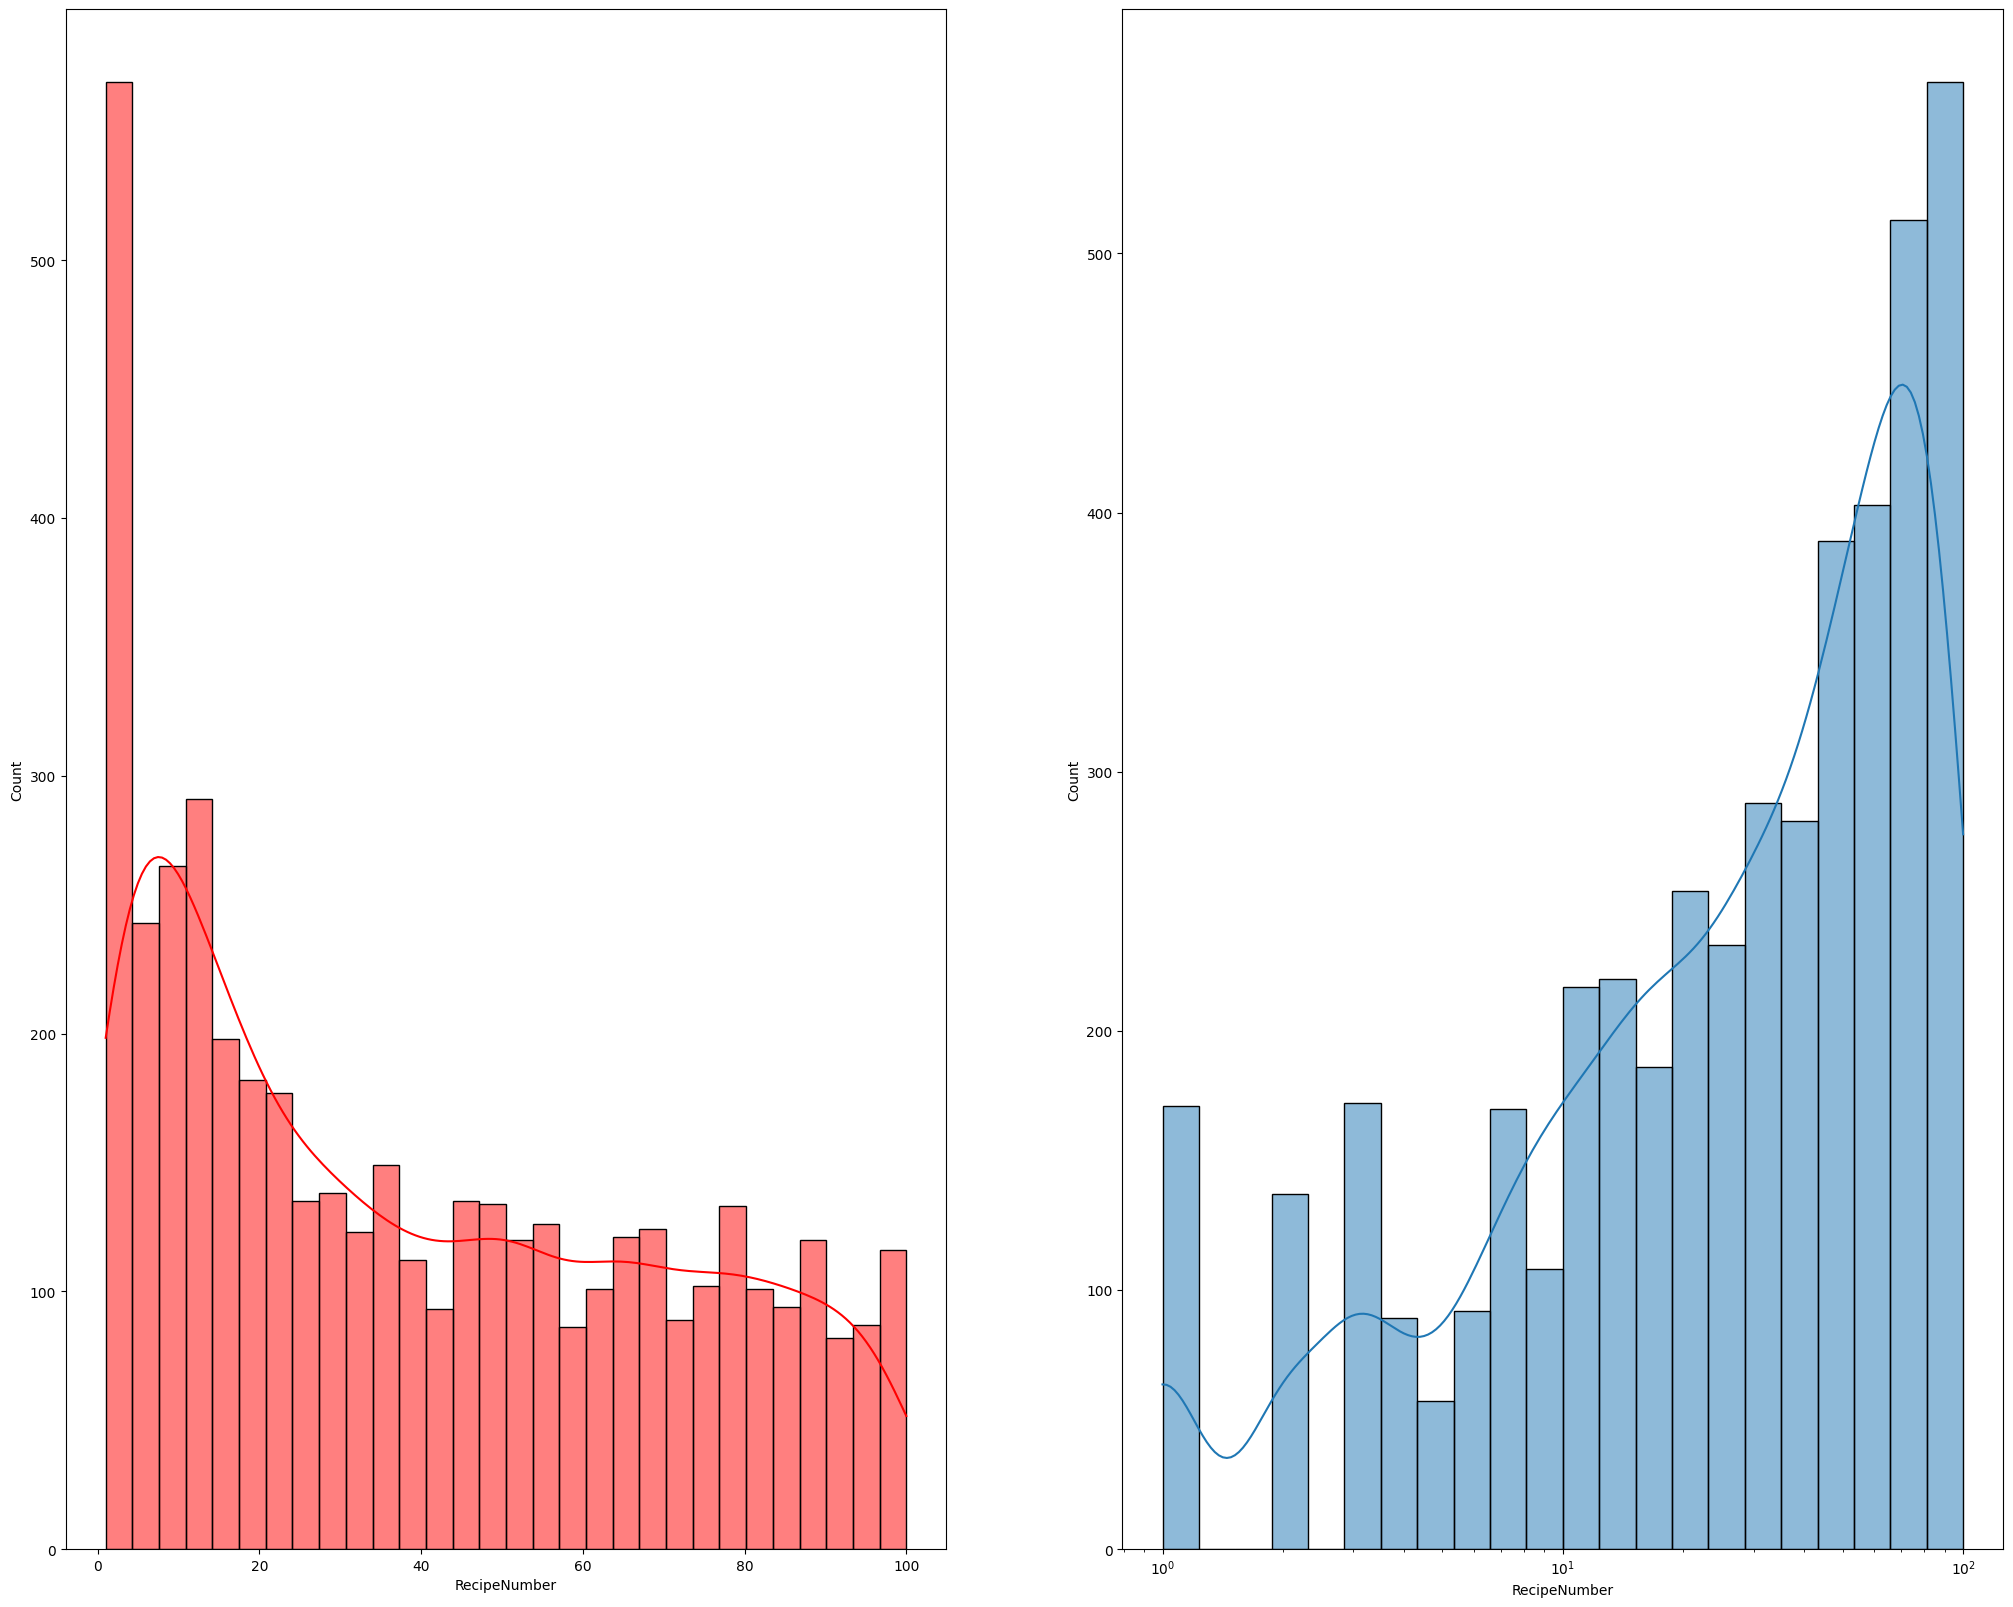

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(25, 20))
plt.subplot(121)
sns.histplot(data=dftest,x='RecipeNumber',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=dftest,x='RecipeNumber',log_scale = True,kde = True)
plt.show()

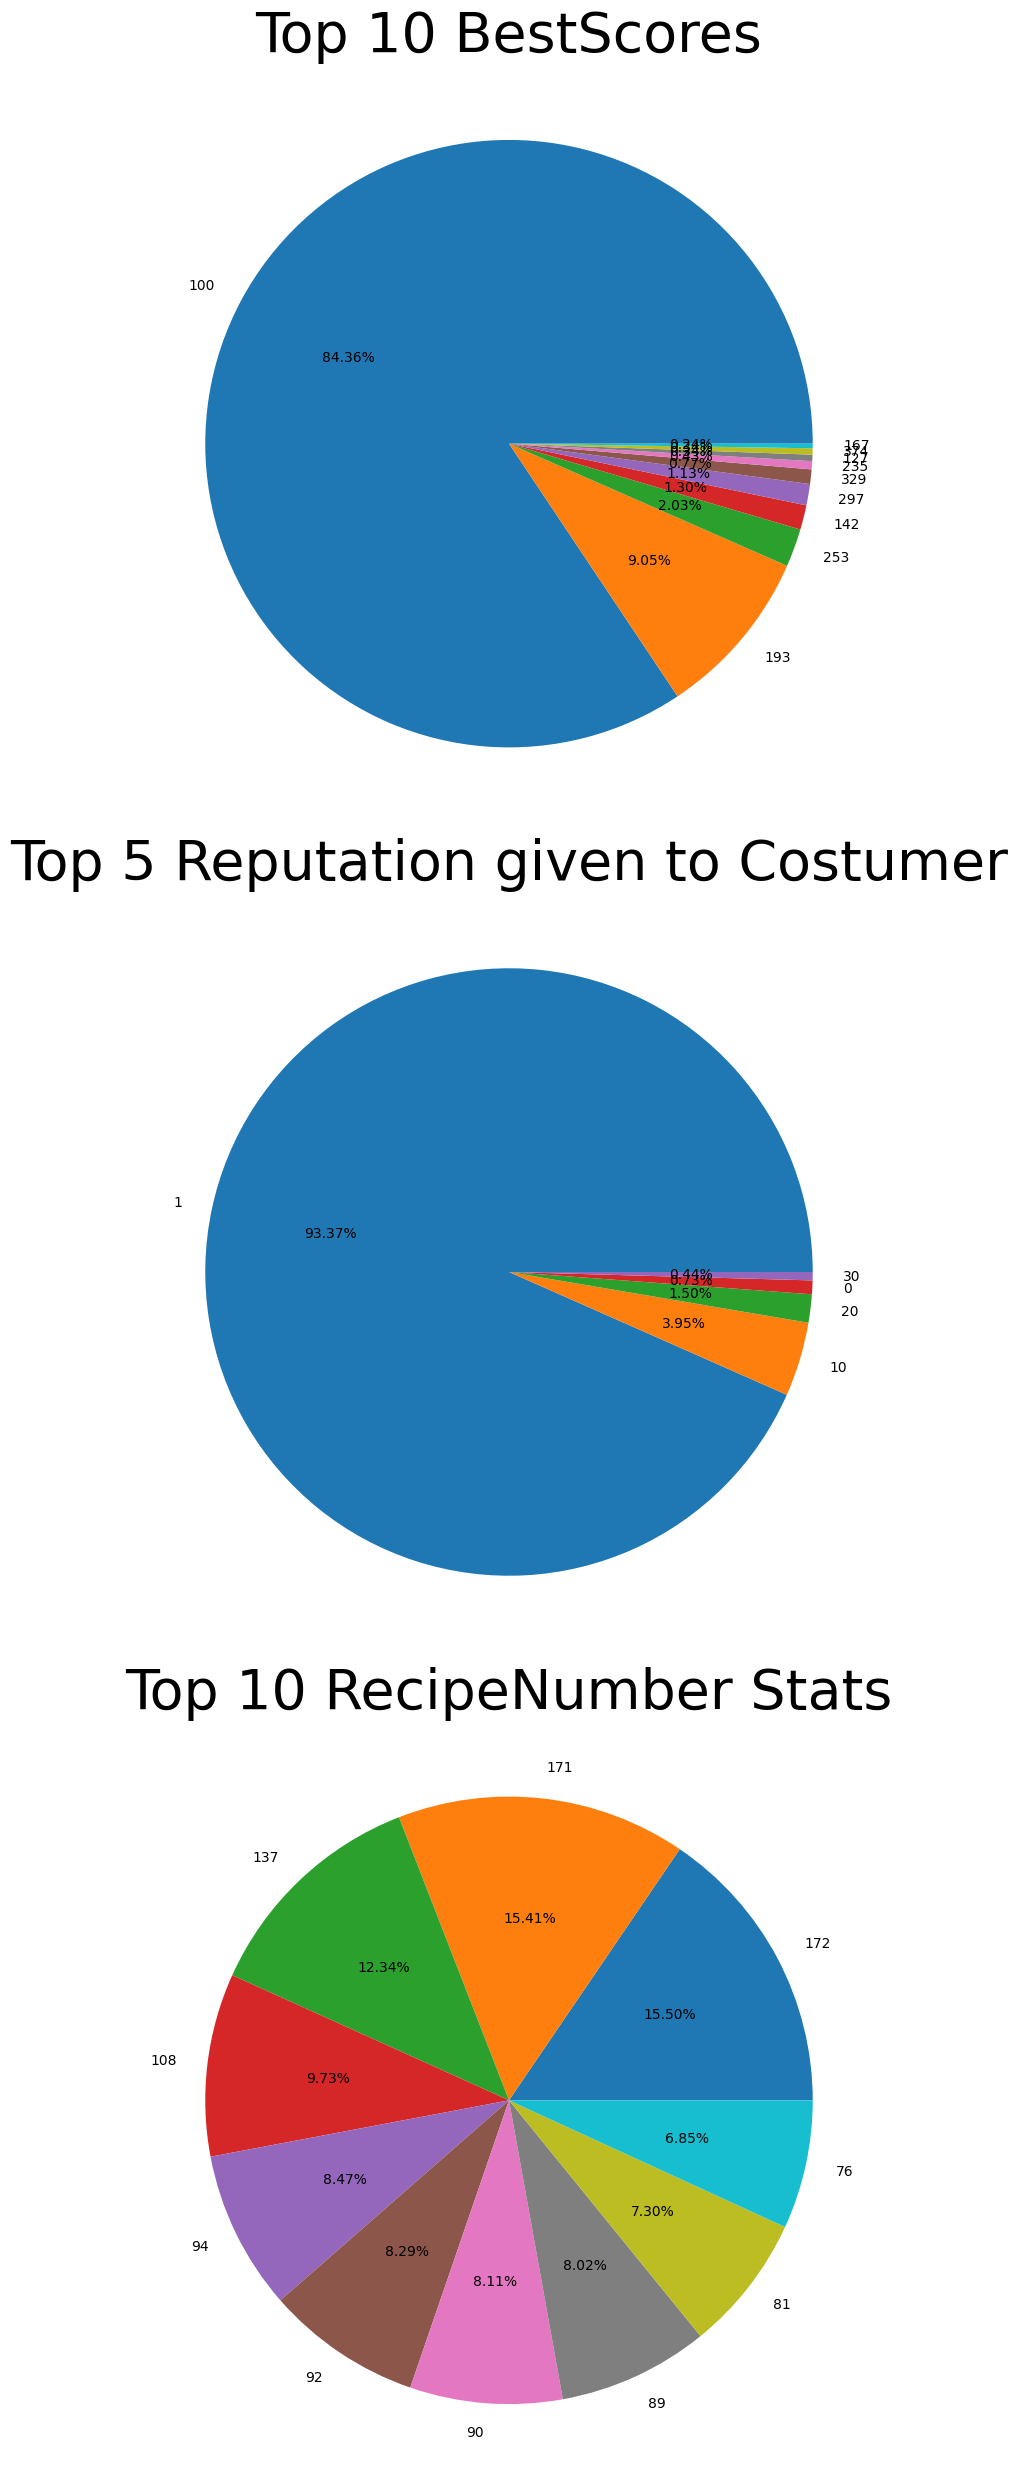

In [111]:
plt.subplots(3,1,figsize=(33,25))

#plotting the BestScore percentage for Recipe

uniqtest_BS= dftest['BestScore'].value_counts()
plt.subplot(311)
size_test = dftest['BestScore'].value_counts().values[:10]
labelst = uniqtest_BS[:10].index
plt.pie(size_test,labels = labelst,autopct = '%1.2f%%')
plt.title('Top 10 BestScores', fontsize = 40)
plt.axis('off')

#plotting the UserReputation percentage given to users
uniqtest_Repu = dftest['UserReputation'].value_counts()
plt.subplot(312)
size_test = dftest['UserReputation'].value_counts().values[:5]
labelst = uniqtest_Repu.index[:5]
plt.pie(size_test,labels = labelst,autopct = '%1.2f%%')
plt.title('Top 5 Reputation given to Costumer', fontsize = 40)
plt.axis('off')

#plotting the Top 10 RecipeNumber ordered the most...
plt.subplot(313)
size_test = dftest['RecipeNumber'].value_counts().values[:10]
uniqtest_RNo= dftest['RecipeNumber'].value_counts()
labelst = uniqtest_RNo[:10]
plt.pie(size_test,labels = labelst,autopct = '%1.2f%%')
plt.title('Top 10 RecipeNumber Stats', fontsize = 40)
plt.axis('off')

plt.tight_layout()

plt.grid()

plt.show()


In [112]:
#plotting pieplot for the recipenames
Recipetest_val = dftest.RecipeNumber.value_counts().values

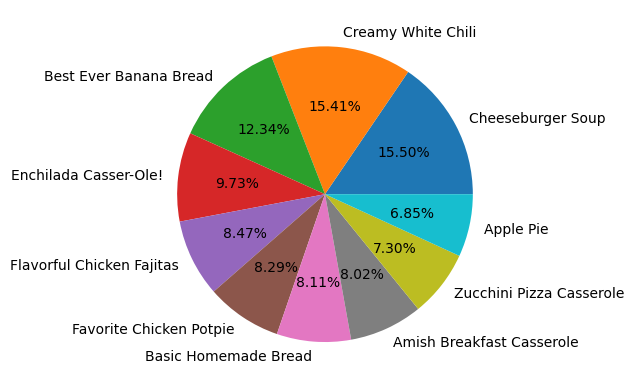

In [113]:
plt.pie(Recipetest_val[:10],labels=uniqtest_RName[:10],autopct = '%1.2f%%')
plt.show()

In [114]:
rel = dftest.groupby(['RecipeNumber','BestScore']).size().reset_index().rename(columns={0:'RN_BSCountTest'})
rel

,RecipeNumber,BestScore,RN_BSCountTest
0,1,100,155
1,1,127,1
2,1,143,1
3,1,193,4
4,1,220,1
...,...,...,...
785,100,297,1
786,100,354,1
787,100,368,1
788,100,611,1


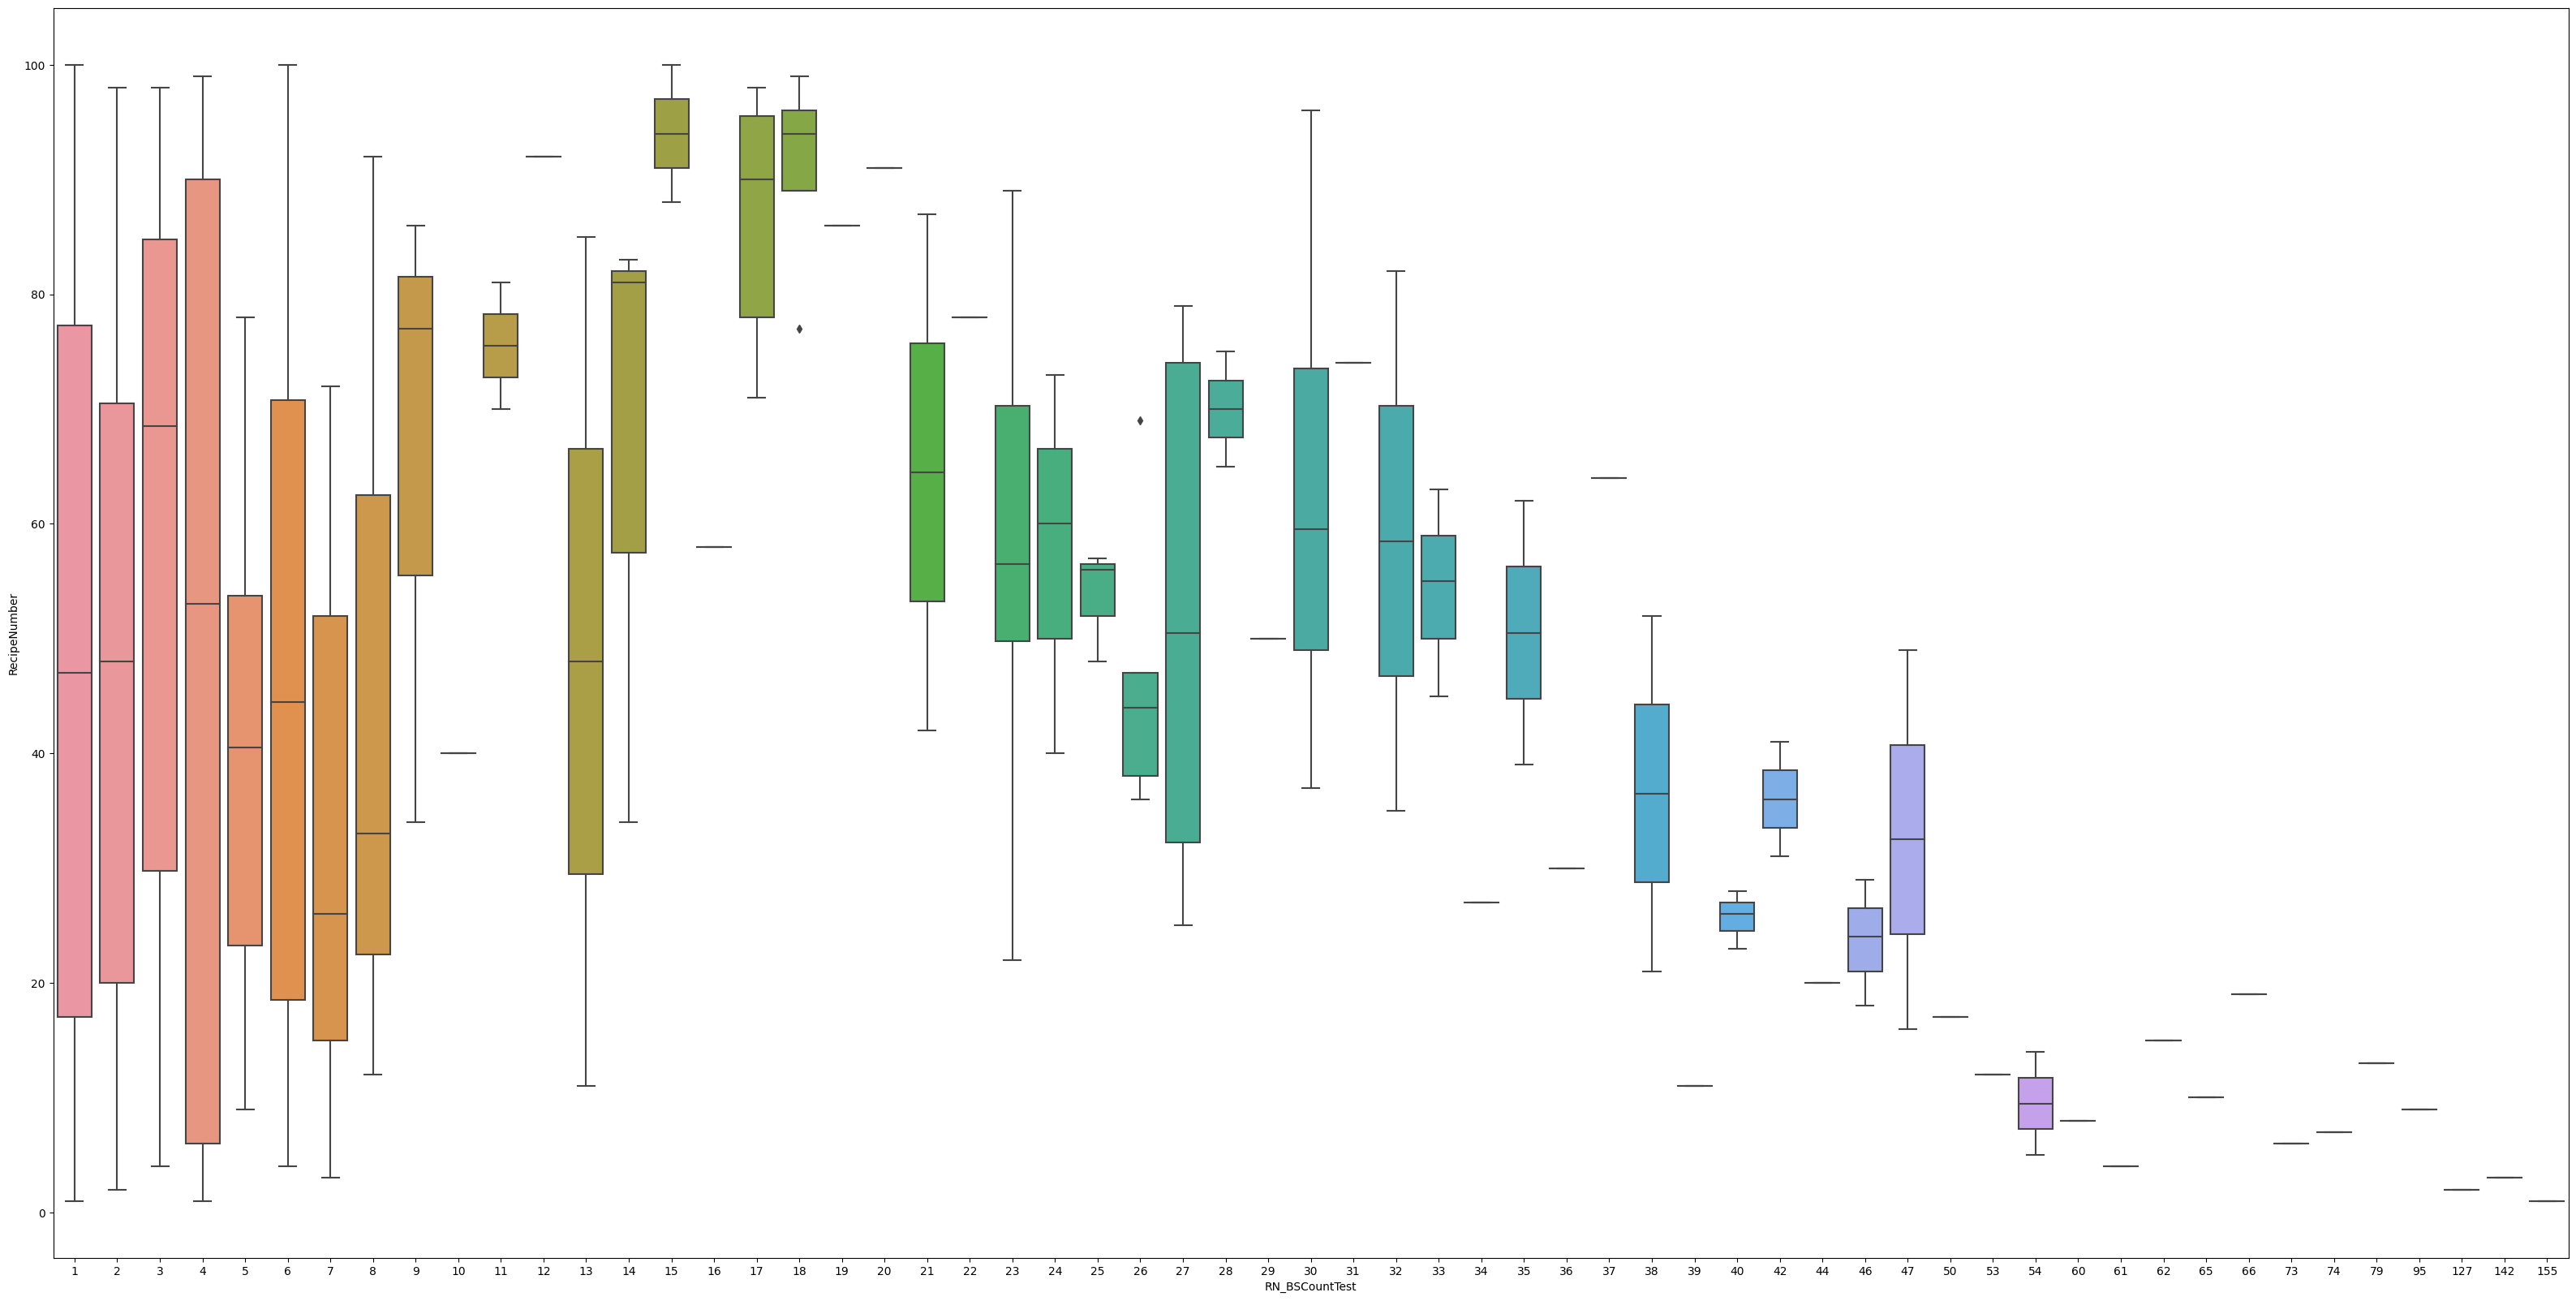

In [115]:
plt.figure(figsize=(40,20))
sns.boxplot(y='RecipeNumber',x = 'RN_BSCountTest',data = rel);

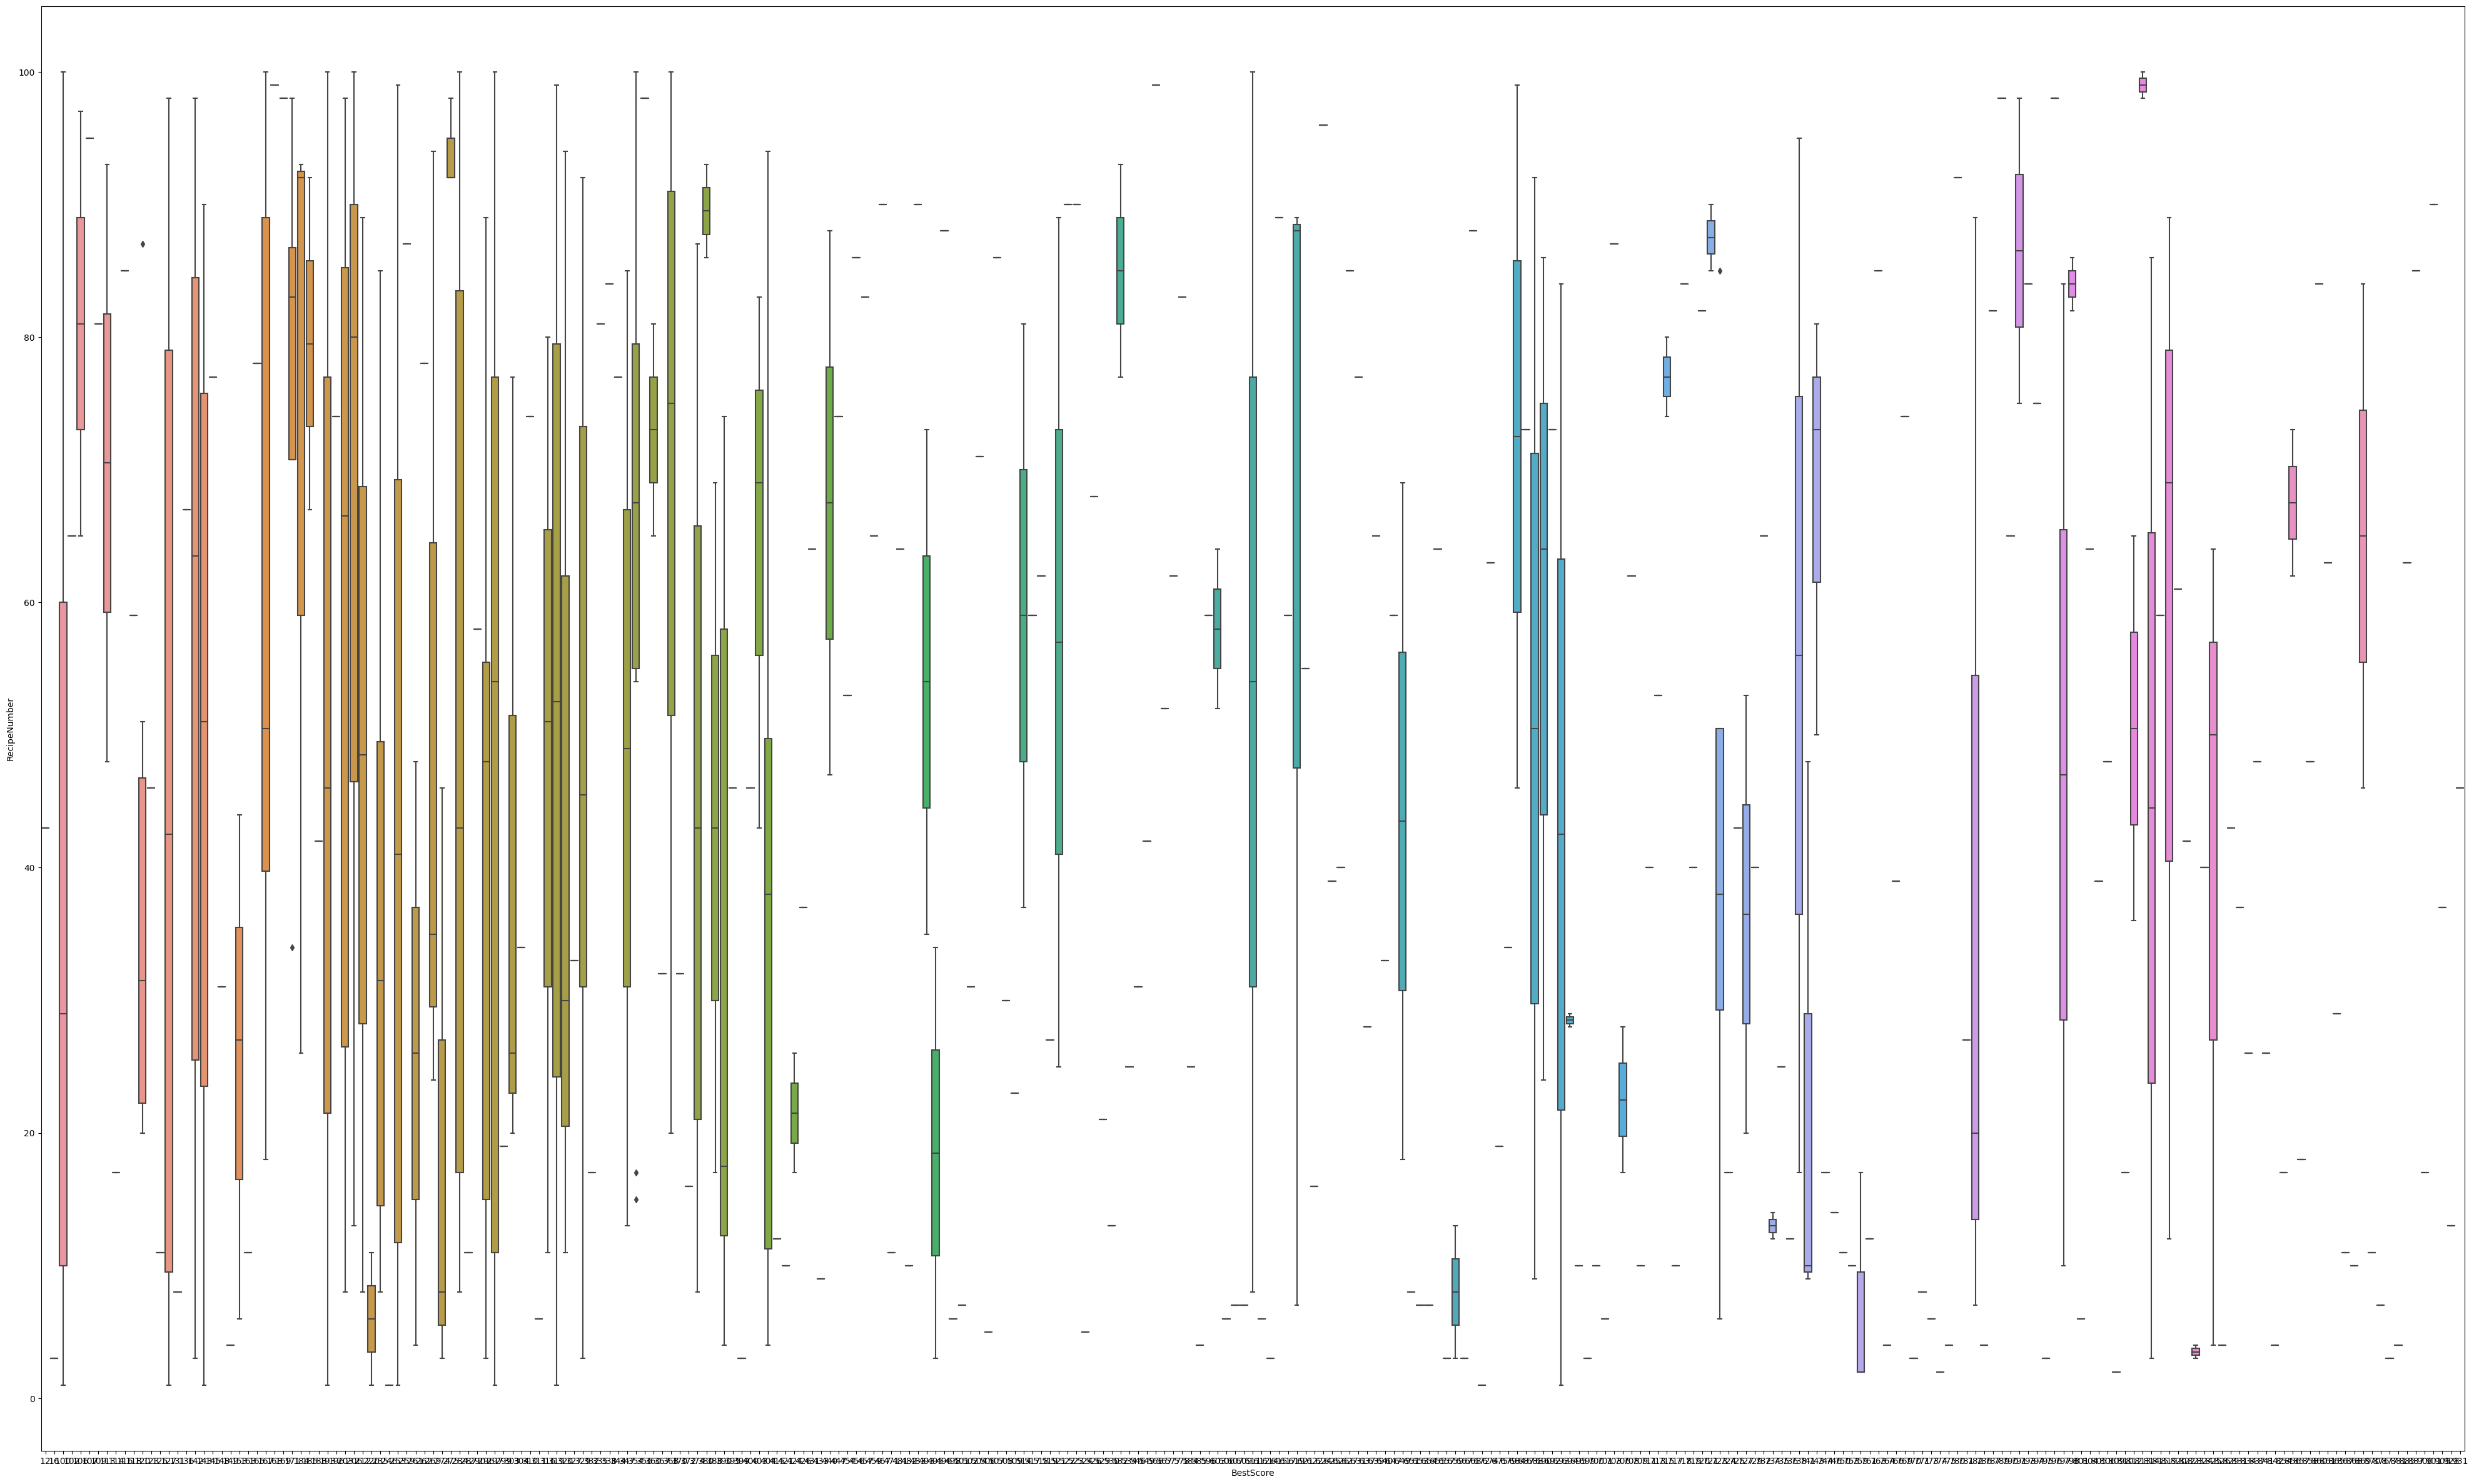

In [116]:
plt.figure(figsize=(50,30))
sns.boxplot(y='RecipeNumber',x= 'BestScore',data = dftest);


# Trying different text cleaning methods..


In [ ]:
#!pip install neattext
#import neattext as nt
#import neattext.functions as nfx


In [ ]:
'''
corpus=[]
for i in range(len(df['Recipe_Review'])):
    s = df.iloc[i]['Recipe_Review']
    docx= nt.TextFrame(s)
    
    #docx.remove_stopwords().text
    docx.remove_puncts(most_common = False).text
    docx.remove_numbers().text
    docx.remove_emojis().text
    docx.remove_special_characters().text
    
    
    docx = docx.text
    docx = docx.lower()
    
    corpus.append(docx)
#print(corpus)
print(len(corpus))
'''
'''
#stemming and tokenization of the word...
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus1 = []
my_stopwords = stopwords.words('english')
for i in range(len(corpus)):
  voca = re.sub('[^a-zA-Z]', ' ',corpus[i])
  voca = voca.lower()
  voca = voca.split()
print(voca)
'''

'''
corpus_train = nt.TextFrame(corpus)
corpus_train= corpus_train.word_tokens()
'''

'''
corpust=[]
for i in range(len(dft['Recipe_Review'])):
    st = dft.iloc[i]['Recipe_Review']
    docxt= nt.TextFrame(st)
    #docx.remove_stopwords().text
    docxt.remove_puncts(most_common = False).text
    docxt.remove_numbers().text
    docxt.remove_emojis().text
    docxt.remove_special_characters().text
    docxt = docxt.text
    docxt = docxt.lower()
    corpust.append(docxt)
#print(corpus)
print(len(corpust))
'''

'''
corpus_test = nt.TextFrame(corpust)
corpus_test= corpus_test.word_tokens()
'''

'''
#TF-IDF being applied on the cleaned dataset of both dataset

from sklearn.sklearn.feature_extraction.text import TFidfVectorizer
tf = TFidfVectorizer()
review=tf.fit.transform(corpus_train).toarray()
'''

## TEXT Cleaning...and Feature Engineering..
I will clean the data and then transform the numeric and categorical data ....

In [117]:
# looking at the data of review column how are they written 
#and what type of cleaning should be requierd

df.iloc[0]['Recipe_Review']

'great recipe! I have made them just as written, wonderfull, moist, delicate flavor...then the next time, I did not have sour cream so used vanilla yogurt and added toffee pieces- still good.  I have made them as cupcakes and they rise very nicely and stay moist.'

# Handling the Missing values..

In [5]:
#IMputing the missing values in the dataset with the fillna,method = bfill which 
#fills the value of the missing place with previous row value 

df=df.fillna(method='bfill')

In [119]:
df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [120]:
df.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [6]:

#importing important libraries...

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings('ignore')


##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

#from sklearn.preprocessing import TargetEncoder

## Feature Selection.. of the Train dataset..

In [7]:
#now first of all taking the feature columns which i will use to train the model..
#X = df.iloc[:,[1,5,7,13,14]]
#Y = df.iloc[:,[12]]
X = df.iloc[:,[1,5,13,14]]
Y = df.iloc[:,[12]]

In [8]:
#Now splitting the data for training and testing on the train dataset and making the model

from sklearn.model_selection import train_test_split


In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.10,shuffle = True,random_state =33)
Xtrain.shape,Xtest.shape

((12262, 4), (1363, 4))

In [10]:
#This is the numeric columns of train set 
#XtrainNum = Xtrain.iloc[:,[0,2,3]]
XtrainNum = Xtrain.iloc[:,[0,2]]

#This is the categorical columns of the text set
#XtrainText = Xtrain.iloc[:,[1,4]]
XtrainText = Xtrain.iloc[:,[1,3]]

#This is the Numerical columns of the test set 
#XtestNum = Xtest.iloc[:,[0,2,3]]
XtestNum = Xtest.iloc[:,[0,2]]

#This is the categorical columns of the test set
#XtestText = Xtest.iloc[:,[1,4]]
XtestText = Xtest.iloc[:,[1,3]]

# This is the part 1 of categorical columns where i will apply the direct transformation. 
XtrainText1 = Xtrain.iloc[:,[1]]

#this is the part2 of categorical columns where i will apply Tfidfvectorizer..
#XtrainText2 = Xtrain.iloc[:,[4]]
XtrainText2 = Xtrain.iloc[:,[3]]

#This is the part1 of the test set's categoricl columns where transformation will be applied
XtestText1 = Xtest.iloc[:,[1]]

#this is the part2 of the test set's categorical column where Tfidfvectorizer
#XtestText2 = Xtest.iloc[:,[4]]
XtestText2 = Xtest.iloc[:,[3]]



'''
#XtrainNum = Xtrain.iloc[:,[0,4,5]]
#XtrainText = Xtrain.iloc[:,[1,2,3,6]]

#XtrainNum = Xtrain.iloc[:,[0,2,3]]
#XtrainText = Xtrain.iloc[:,[1,4]]

XtrainNum = Xtrain.iloc[:,[0,2]]
XtrainText = Xtrain.iloc[:,[1,3]]
#XtrainNum = Xtrain.iloc[:,[0,1]]
#XtrainText = Xtrain.iloc[:,[2]]



#XtrainText2 = Xtrain.iloc[:,[6]]
#XtrainText1 = Xtrain.iloc[:,[1,2,3]]

#XtrainText2 = Xtrain.iloc[:,[4]]
#XtrainText1 = Xtrain.iloc[:,[1]]

XtrainText2 = Xtrain.iloc[:,[3]]
XtrainText1 = Xtrain.iloc[:,[1]]
#XtrainText2 = Xtrain.iloc[:,[2]]
#XtrainText1 = Xtrain.iloc[:,[]]



#XtestNum = Xtest.iloc[:,[0,4,5]]
#XtestText = Xtest.iloc[:,[1,2,3,6]]
#XtestNum = Xtest.iloc[:,[0,2,3]]
#XtestText = Xtest.iloc[:,[1,4]]

XtestNum = Xtest.iloc[:,[0,2]]
XtestText = Xtest.iloc[:,[1,3]]
#XtestNum = Xtest.iloc[:,[0,1]]
#XtestText = Xtest.iloc[:,[2]]



#XtestText2 = Xtest.iloc[:,[6]]
#XtestText1 = Xtest.iloc[:,[1,2,3]]
#XtestText2 = Xtest.iloc[:,[4]]
#XtestText1 = Xtest.iloc[:,[1]]
XtestText2 = Xtest.iloc[:,[3]]
XtestText1 = Xtest.iloc[:,[1]]
#XtestText2 = Xtest.iloc[:,[2]]
#XtestText1 = Xtest.iloc[:,[1]]
'''

'\n#XtrainNum = Xtrain.iloc[:,[0,4,5]]\n#XtrainText = Xtrain.iloc[:,[1,2,3,6]]\n\n#XtrainNum = Xtrain.iloc[:,[0,2,3]]\n#XtrainText = Xtrain.iloc[:,[1,4]]\n\nXtrainNum = Xtrain.iloc[:,[0,2]]\nXtrainText = Xtrain.iloc[:,[1,3]]\n#XtrainNum = Xtrain.iloc[:,[0,1]]\n#XtrainText = Xtrain.iloc[:,[2]]\n\n\n\n#XtrainText2 = Xtrain.iloc[:,[6]]\n#XtrainText1 = Xtrain.iloc[:,[1,2,3]]\n\n#XtrainText2 = Xtrain.iloc[:,[4]]\n#XtrainText1 = Xtrain.iloc[:,[1]]\n\nXtrainText2 = Xtrain.iloc[:,[3]]\nXtrainText1 = Xtrain.iloc[:,[1]]\n#XtrainText2 = Xtrain.iloc[:,[2]]\n#XtrainText1 = Xtrain.iloc[:,[]]\n\n\n\n#XtestNum = Xtest.iloc[:,[0,4,5]]\n#XtestText = Xtest.iloc[:,[1,2,3,6]]\n#XtestNum = Xtest.iloc[:,[0,2,3]]\n#XtestText = Xtest.iloc[:,[1,4]]\n\nXtestNum = Xtest.iloc[:,[0,2]]\nXtestText = Xtest.iloc[:,[1,3]]\n#XtestNum = Xtest.iloc[:,[0,1]]\n#XtestText = Xtest.iloc[:,[2]]\n\n\n\n#XtestText2 = Xtest.iloc[:,[6]]\n#XtestText1 = Xtest.iloc[:,[1,2,3]]\n#XtestText2 = Xtest.iloc[:,[4]]\n#XtestText1 = Xtest.iloc[

In [126]:
XtrainNum.columns

Index(['RecipeNumber', 'BestScore'], dtype='object')

In [127]:
XtrainText.columns

Index(['UserID', 'Recipe_Review'], dtype='object')

In [128]:
XtrainText1.columns

Index(['UserID'], dtype='object')

In [129]:
XtrainText2.columns

Index(['Recipe_Review'], dtype='object')

# Now first preprocessing and transforming the review columns with TfidfVectorizer..


In [11]:
'''
this is the stopwords i created along with english words I have
added the numeric data, alphanumeric, special characters and some text lines which
in the dataset where given for the urls...
'''
#stopword_catego = ['_','u','1','o','K']
stopwords= ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves','😊', '🙂', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😇', '😉', '😌', '😍', '😘', '😗', '😙', '😚', '😋', '😜', '😝', '😛', '🤑', '🤗', '🤓', '😎', '🤠', '😏', '😒', '😞', '😔','❤️', '💛', '💚', '💙', '💜', '🖤', '💔', '❣️', '💕', '💞', '💓', '💗', '💖', '💘', '💝','!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '.', ',','1','2','3','4','5','6','7','8','9','0','http://media-cache-ec0.pinimg.com/236x/6b/2d/2b/6b2d2b81f0cdcaa95a3151d58bc7e9d6.jpg','http://media-cache-ec0.pinimg.com/236x/6b/2d/2b/6b2d2b81f0cdcaa95a3151d58bc7e9d6.jpg','https://goo.gl/4rfasy','https://web.facebook.com/cookingplushomedecor/?modal=admin_todo_tour','https://www.BeasleysSmokehouseRub.com/shop','(<a href="https://silkroadspices.ca/products/scarborough-fair)','target="_blank" rel="noopener">https://silkroadspices.ca/products/scarborough-fair).</a>','http://www.food.com/recipe/chicken-pot-pie-with-biscuit-crust-26846)','https://www.recipespack.com/chicken-fajita-stuffed-peppers-recipe/','https://pakistanpropertyinfo.blogspot.com/2019/03/plot-for-sale-in-bahria-town-Islamabad.html','<h1><span>Here'' is the link to the recipe &amp;',' picture of it.</span></h1> <h1><span></span>\xa0</h1> <h1><span><a ','href="https://www.tasteofhome.com/recipes/enchilada-casser-ole','" target="_blank" rel="noopener"','>https://www.tasteofhome.com/recipes/enchilada-casser-ole</a>-</span></h1>','https://www.tasteofhome.com/Recipes/Onion---Cheddar-Biscuits','Good.... but I think I prefer my Guinness Chocolate Cheesecake','http://thedipnchip.weebly.com/guinness-chocolate-cheesecake.html','https://kitchenbackground.com/ ', '<h1><span>Enchilada Casser-Ole</span></h1> <h1><span><span><span>\xa0</span></span></span></h1> <h2>Ingredients</h2> <ul> <li><span>1 pound </span><i><span>lean ground beef (90% lean)</span></i></li> <li><span></span><i><span>1 large onion, chopped</span></i></li> <li><span>2 cups </span><i><span>salsa</span></i></li> <li><span>1 can </span><i><span>(15 ounces) black beans, rinsed and drained</span></i></li> <li><span>1/4 cup </span><i><span>reduced-fat Italian salad dressing</span></i></li> <li><span>2 tablespoons </span><i><span>reduced-sodium taco seasoning</span></i></li> <li><span>1/4 teaspoon </span><i><span>ground cumin</span></i></li> <li><span></span><i><span>6 flour tortillas (8 inches)</span></i></li> <li><span>3/4 cup </span><i><span>reduced-fat sour cream</span></i></li> <li><span>1 cup </span><i><span>(4 ounces) shredded reduced-fat Mexican cheese blend</span></i></li> <li><span>1 cup </span><i><span>shredded lettuce</span></i></li> <li><span></span><i><span>1 medium tomato, chopped</span></i></li> <li><span>1/4 cup </span><i><span>minced fresh cilantro</span></i></li> </ul> <h2>Directions</h2> <ul> <li><span>','   ','https://www.tasteofhome.com/recipes/cheesy-meatball-soup','http://applepiefromscratch105.wordpress.com/','(http://allrecipes.com/recipe/12492/pie-crust-iv/)','https://pakrealestatenews.wordpress.com/2019/08/08/dha-defence-islamabad/','https://www.tasteofhome.com/recipes/Frosted-Banana-Bars-2','https://thepioneerwoman.com/cooking/perfect-potato-soup/ ','http://community.tasteofhome.com/community_forums/f/30/p/867124/7455685.aspx#7455685',' (https://www.tasteofhome.com/recipes/apple-pie-filling)','href=&#34','https://scoopkeeda.com/video-banane-wala-apps-download/&#34','target=&#34;_blank&#34;&gt;information&lt;/a&gt','http://heavenissmilingabove.blogspot.com/2014/12/game-chili-my-kids-cook-5.html',' https://www.southernplate.com/grandma-pearls-flaky-chocolate-icing/','http://cake-delivery.in/gurgaonhttp://cake-delivery.in/delhihttp://cake-delivery.in/noidahttp://cake-delivery.in/kota','http://www.food.com/recipe/chicken-pot-pie-with-biscuit-crust-26846','https://www.BeasleysSmokehouseRub.com/shop','<a href=https://therecipecritic.com/yum-yum-sauce/)',' http://www.food.com/recipe/turkey-breakfast-sausage-patties-100408',' http://www.foodnetwork.com/recipes/paula-deen/pumpkin-bars-recipe.html<p>Not ',' https://amzn.to/333eZke ',' https://www.tasteofhome.com/recipes/homemade-peanut-butter-cups','http://www.mynewlywedcookingadventures.com/2013/02/taste-of-homes-dutch-apple-pie.htmlI','(her&#39;s would be about 16 slices) ----- (very thin slices)my Nutritional Facts on her recipecutting her loaf into 8 slices is 496 calories per slicefor the whole loaf is 3,975 calories1-3/4 cups all-purpose flour                           (cal 770)1-1/2 cups sugar                                               (cal 1161)1 teaspoon baking soda                                  Cal 01/2 teaspoon salt                                               cal 02 eggs                                                                      cal 1422 medium ripe bananas, mashed (1 cup)            cal 164 - 2001/2 cup canola oil                                                     cal 9901/4 cup plus 1 tablespoon buttermilk                 cal 261 teaspoon vanilla extract                                      cal 121 cup chopped walnuts                                            cal 720with no walnuts 3255 cal 406.8 per slicewith no walnuts and the (oil substitute with applesauce) 2315 cal 289 per slicewith no walnuts and the  (oil substitute with applesauce) and the (sugar substitute with 1 1/2 tsp of stevia ) 1154 cal 144 per sliceMy family loved it and it was so juicy and flavorful.I don&#39;t understand, in this day and age, why every recipe doesn&#39;t have nutritional information.','👍','👍👍👍👍👍😋😋😋😋😋','😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😊', '😇', '🙂', '🙃', '😉', '😌', '😍', '🥰', '😘', '😗', '😙', '😚', '😋', '😛', '😝', '😜', '🤪', '🤨', '🧐', '🤓', '😎', '🤩', '🥳', '😏', '😒', '😞', '😔', '😟', '😕', '🙁', '☹️', '😣', '😖', '😫', '😩', '🥺', '😢', '😭', '😤', '😠', '😡', '🤬', '🤯', '😳', '🥵', '🥶', '😱', '😨', '😰', '😥', '😓', '🤗', '🤔', '🤭', '🤫', '🤥', '😶\u200d🌫️', '😐', '😑', '😬', '🙄', '😯', '😦', '😧', '😮', '😲', '🥱', '😴', '🤤', '😪', '😵', '🤐', '🥴', '🤢', '🤮', '🤧', '😷', '🤒', '🤕', '🤑', '🤠', '🥳', '🥸', '😈', '👿', '👹', '👺', '🤡', '💩', '👻', '💀', '☠️', '👽', '👾', '🤖', '🎃', '😺', '😸', '😹', '😻', '😼', '😽', '🙀', '😿', '😾🐶', '🐱', '🐭', '🐹', '🐰', '🦊', '🦝', '🐻', '🐼', '🦘', '🦡', '🐨', '🐯', '🦁', '🐮', '🐷', '🐽', '🐸', '🐔', '🐧', '🐦', '🐤', '🐣', '🐥', '🦆', '🦢', '🦅', '🦉', '🦚', '🦜', '🐺', '🦊', '🦝', '🐴', '🦄', '🐗', '🐝', '🪱', '🐛', '🦋', '🐌', '🐞', '🐜', '🪰', '🪲', '🪳', '🦟', '🦗', '🕷️', '🦂', '🐢', '🐍', '🦎', '🦖', '🦕', '🐙', '🦑', '🦐', '🦞', '🦀', '🐡', '🐠', '🐟', '🐬', '🐳', '🐋', '🦈', '🐊', '🐅', '🐆', '🦓', '🦍', '🦧', '🦣', '🐘', '🦛', '🦏', '🐪', '🐫', '🦒', '🦘', '🦬', '🐃', '🐂', '🐄', '🐎', '🐖', '🐏', '🐑', '🦙', '🐐', '🦌', '🐕', '🐩', '🦮', '🐕\u200d🦺', '🐈', '🐈\u200d⬛', '🪶', '🐓', '🦃', '🦤', '🦚', '🦜', '🦢', '🦩', '🕊️', '🐇', '🦝', '🦨', '🦡', '🦦', '🦥', '🐁', '🐀', '🐿️', '🦔', '🐾', '🐉', '🐲', '🌵', '🎄', '🌲', '🌳', '🌴', '🌱', '🪴', '🌿', '☘️', '🍀', '🎍', '🪵', '🎋', '🍃', '🍂', '🍁', '🍄', '🌾', '💐', '🌷', '🌹']

#stopwords= ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'😊', '🙂', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😇', '😉', '😌', '😍', '😘', '😗', '😙', '😚', '😋', '😜', '😝', '😛', '🤑', '🤗', '🤓', '😎', '🤠', '😏', '😒', '😞', '😔','❤️', '💛', '💚', '💙', '💜', '🖤', '💔', '❣️', '💕', '💞', '💓', '💗', '💖', '💘', '💝','!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '∕', '∙', '√', '∞', '∫', '≈', '≠', '≡', '≤', '≥', '⌠', '⌡', '÷', '≈', '≤', '≥', 'ﬁ', 'ﬂ', 'ﬀ', 'ﬃ', 'ﬄ', '√', '⁄', '€', '‚', 'ƒ', '„', '…', '†', '‡', 'ˆ', '‰', 'Š', '‹', 'Œ', 'Ž', '‘', '’', '“', '”', '•', '–', '—', '˜', '™', 'š', '›', 'œ', 'ž', 'Ÿ', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', '÷', '÷', '×', '±', '∂', '∆', '∏', '∑', '−', '.', ',','1','2','3','4','5','6','7','8','9','0','http://media-cache-ec0.pinimg.com/236x/6b/2d/2b/6b2d2b81f0cdcaa95a3151d58bc7e9d6.jpg','http://media-cache-ec0.pinimg.com/236x/6b/2d/2b/6b2d2b81f0cdcaa95a3151d58bc7e9d6.jpg','https://goo.gl/4rfasy','https://web.facebook.com/cookingplushomedecor/?modal=admin_todo_tour','https://www.BeasleysSmokehouseRub.com/shop','(<a href="https://silkroadspices.ca/products/scarborough-fair)','target="_blank" rel="noopener">https://silkroadspices.ca/products/scarborough-fair).</a>','http://www.food.com/recipe/chicken-pot-pie-with-biscuit-crust-26846)','https://www.recipespack.com/chicken-fajita-stuffed-peppers-recipe/','https://pakistanpropertyinfo.blogspot.com/2019/03/plot-for-sale-in-bahria-town-Islamabad.html','<h1><span>Here'' is the link to the recipe &amp;',' picture of it.</span></h1> <h1><span></span>\xa0</h1> <h1><span><a ','href="https://www.tasteofhome.com/recipes/enchilada-casser-ole','" target="_blank" rel="noopener"','>https://www.tasteofhome.com/recipes/enchilada-casser-ole</a>-</span></h1>','https://www.tasteofhome.com/Recipes/Onion---Cheddar-Biscuits','Good.... but I think I prefer my Guinness Chocolate Cheesecake','http://thedipnchip.weebly.com/guinness-chocolate-cheesecake.html','https://kitchenbackground.com/ ', '<h1><span>Enchilada Casser-Ole</span></h1> <h1><span><span><span>\xa0</span></span></span></h1> <h2>Ingredients</h2> <ul> <li><span>1 pound </span><i><span>lean ground beef (90% lean)</span></i></li> <li><span></span><i><span>1 large onion, chopped</span></i></li> <li><span>2 cups </span><i><span>salsa</span></i></li> <li><span>1 can </span><i><span>(15 ounces) black beans, rinsed and drained</span></i></li> <li><span>1/4 cup </span><i><span>reduced-fat Italian salad dressing</span></i></li> <li><span>2 tablespoons </span><i><span>reduced-sodium taco seasoning</span></i></li> <li><span>1/4 teaspoon </span><i><span>ground cumin</span></i></li> <li><span></span><i><span>6 flour tortillas (8 inches)</span></i></li> <li><span>3/4 cup </span><i><span>reduced-fat sour cream</span></i></li> <li><span>1 cup </span><i><span>(4 ounces) shredded reduced-fat Mexican cheese blend</span></i></li> <li><span>1 cup </span><i><span>shredded lettuce</span></i></li> <li><span></span><i><span>1 medium tomato, chopped</span></i></li> <li><span>1/4 cup </span><i><span>minced fresh cilantro</span></i></li> </ul> <h2>Directions</h2> <ul> <li><span>','   ','https://www.tasteofhome.com/recipes/cheesy-meatball-soup','http://applepiefromscratch105.wordpress.com/','(http://allrecipes.com/recipe/12492/pie-crust-iv/)','https://pakrealestatenews.wordpress.com/2019/08/08/dha-defence-islamabad/','https://www.tasteofhome.com/recipes/Frosted-Banana-Bars-2','https://thepioneerwoman.com/cooking/perfect-potato-soup/ ','http://community.tasteofhome.com/community_forums/f/30/p/867124/7455685.aspx#7455685',' (https://www.tasteofhome.com/recipes/apple-pie-filling)','href=&#34','https://scoopkeeda.com/video-banane-wala-apps-download/&#34','target=&#34;_blank&#34;&gt;information&lt;/a&gt','http://heavenissmilingabove.blogspot.com/2014/12/game-chili-my-kids-cook-5.html',' https://www.southernplate.com/grandma-pearls-flaky-chocolate-icing/','http://cake-delivery.in/gurgaonhttp://cake-delivery.in/delhihttp://cake-delivery.in/noidahttp://cake-delivery.in/kota','http://www.food.com/recipe/chicken-pot-pie-with-biscuit-crust-26846','https://www.BeasleysSmokehouseRub.com/shop','<a href=https://therecipecritic.com/yum-yum-sauce/)',' http://www.food.com/recipe/turkey-breakfast-sausage-patties-100408',' http://www.foodnetwork.com/recipes/paula-deen/pumpkin-bars-recipe.html<p>Not ',' https://amzn.to/333eZke ',' https://www.tasteofhome.com/recipes/homemade-peanut-butter-cups','http://www.mynewlywedcookingadventures.com/2013/02/taste-of-homes-dutch-apple-pie.htmlI','(her&#39;s would be about 16 slices) ----- (very thin slices)my Nutritional Facts on her recipecutting her loaf into 8 slices is 496 calories per slicefor the whole loaf is 3,975 calories1-3/4 cups all-purpose flour                           (cal 770)1-1/2 cups sugar                                               (cal 1161)1 teaspoon baking soda                                  Cal 01/2 teaspoon salt                                               cal 02 eggs                                                                      cal 1422 medium ripe bananas, mashed (1 cup)            cal 164 - 2001/2 cup canola oil                                                     cal 9901/4 cup plus 1 tablespoon buttermilk                 cal 261 teaspoon vanilla extract                                      cal 121 cup chopped walnuts                                            cal 720with no walnuts 3255 cal 406.8 per slicewith no walnuts and the (oil substitute with applesauce) 2315 cal 289 per slicewith no walnuts and the  (oil substitute with applesauce) and the (sugar substitute with 1 1/2 tsp of stevia ) 1154 cal 144 per sliceMy family loved it and it was so juicy and flavorful.I don&#39;t understand, in this day and age, why every recipe doesn&#39;t have nutritional information.','👍','👍👍👍👍👍😋😋😋😋😋','😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😊', '😇', '🙂', '🙃', '😉', '😌', '😍', '🥰', '😘', '😗', '😙', '😚', '😋', '😛', '😝', '😜', '🤪', '🤨', '🧐', '🤓', '😎', '🤩', '🥳', '😏', '😒', '😞', '😔', '😟', '😕', '🙁', '☹️', '😣', '😖', '😫', '😩', '🥺', '😢', '😭', '😤', '😠', '😡', '🤬', '🤯', '😳', '🥵', '🥶', '😱', '😨', '😰', '😥', '😓', '🤗', '🤔', '🤭', '🤫', '🤥', '😶\u200d🌫️', '😐', '😑', '😬', '🙄', '😯', '😦', '😧', '😮', '😲', '🥱', '😴', '🤤', '😪', '😵', '🤐', '🥴', '🤢', '🤮', '🤧', '😷', '🤒', '🤕', '🤑', '🤠', '🥳', '🥸', '😈', '👿', '👹', '👺', '🤡', '💩', '👻', '💀', '☠️', '👽', '👾', '🤖', '🎃', '😺', '😸', '😹', '😻', '😼', '😽', '🙀', '😿', '😾🐶', '🐱', '🐭', '🐹', '🐰', '🦊', '🦝', '🐻', '🐼', '🦘', '🦡', '🐨', '🐯', '🦁', '🐮', '🐷', '🐽', '🐸', '🐔', '🐧', '🐦', '🐤', '🐣', '🐥', '🦆', '🦢', '🦅', '🦉', '🦚', '🦜', '🐺', '🦊', '🦝', '🐴', '🦄', '🐗', '🐝', '🪱', '🐛', '🦋', '🐌', '🐞', '🐜', '🪰', '🪲', '🪳', '🦟', '🦗', '🕷️', '🦂', '🐢', '🐍', '🦎', '🦖', '🦕', '🐙', '🦑', '🦐', '🦞', '🦀', '🐡', '🐠', '🐟', '🐬', '🐳', '🐋', '🦈', '🐊', '🐅', '🐆', '🦓', '🦍', '🦧', '🦣', '🐘', '🦛', '🦏', '🐪', '🐫', '🦒', '🦘', '🦬', '🐃', '🐂', '🐄', '🐎', '🐖', '🐏', '🐑', '🦙', '🐐', '🦌', '🐕', '🐩', '🦮', '🐕\u200d🦺', '🐈', '🐈\u200d⬛', '🪶', '🐓', '🦃', '🦤', '🦚', '🦜', '🦢', '🦩', '🕊️', '🐇', '🦝', '🦨', '🦡', '🦦', '🦥', '🐁', '🐀', '🐿️', '🦔', '🐾', '🐉', '🐲', '🌵', '🎄', '🌲', '🌳', '🌴', '🌱', '🪴', '🌿', '☘️', '🍀', '🎍', '🪵', '🎋', '🍃', '🍂', '🍁', '🍄', '🌾', '💐', '🌷', '🌹']

#stopword_new =['<a href="https://therecipecritic.com/yum-yum-sauce/)',' http://www.food.com/recipe/turkey-breakfast-sausage-patties-100408',' http://www.foodnetwork.com/recipes/paula-deen/pumpkin-bars-recipe.html<p>Not ',' https://amzn.to/333eZke ',' https://www.tasteofhome.com/recipes/homemade-peanut-butter-cups','http://www.mynewlywedcookingadventures.com/2013/02/taste-of-homes-dutch-apple-pie.htmlI','(her&#39;s would be about 16 slices) ----- (very thin slices)my Nutritional Facts on her recipecutting her loaf into 8 slices is 496 calories per slicefor the whole loaf is 3,975 calories1-3/4 cups all-purpose flour                           (cal 770)1-1/2 cups sugar                                               (cal 1161)1 teaspoon baking soda                                  Cal 01/2 teaspoon salt                                               cal 02 eggs                                                                      cal 1422 medium ripe bananas, mashed (1 cup)            cal 164 - 2001/2 cup canola oil                                                     cal 9901/4 cup plus 1 tablespoon buttermilk                 cal 261 teaspoon vanilla extract                                      cal 121 cup chopped walnuts                                            cal 720with no walnuts 3255 cal 406.8 per slicewith no walnuts and the (oil substitute with applesauce) 2315 cal 289 per slicewith no walnuts and the  (oil substitute with applesauce) and the (sugar substitute with 1 1/2 tsp of stevia ) 1154 cal 144 per sliceMy family loved it and it was so juicy and flavorful.I don&#39;t understand, in this day and age, why every recipe doesn&#39;t have nutritional information.','👍','👍👍👍👍👍😋😋😋😋😋','😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '😊', '😇', '🙂', '🙃', '😉', '😌', '😍', '🥰', '😘', '😗', '😙', '😚', '😋', '😛', '😝', '😜', '🤪', '🤨', '🧐', '🤓', '😎', '🤩', '🥳', '😏', '😒', '😞', '😔', '😟', '😕', '🙁', '☹️', '😣', '😖', '😫', '😩', '🥺', '😢', '😭', '😤', '😠', '😡', '🤬', '🤯', '😳', '🥵', '🥶', '😱', '😨', '😰', '😥', '😓', '🤗', '🤔', '🤭', '🤫', '🤥', '😶\u200d🌫️', '😐', '😑', '😬', '🙄', '😯', '😦', '😧', '😮', '😲', '🥱', '😴', '🤤', '😪', '😵', '🤐', '🥴', '🤢', '🤮', '🤧', '😷', '🤒', '🤕', '🤑', '🤠', '🥳', '🥸', '😈', '👿', '👹', '👺', '🤡', '💩', '👻', '💀', '☠️', '👽', '👾', '🤖', '🎃', '😺', '😸', '😹', '😻', '😼', '😽', '🙀', '😿', '😾🐶', '🐱', '🐭', '🐹', '🐰', '🦊', '🦝', '🐻', '🐼', '🦘', '🦡', '🐨', '🐯', '🦁', '🐮', '🐷', '🐽', '🐸', '🐔', '🐧', '🐦', '🐤', '🐣', '🐥', '🦆', '🦢', '🦅', '🦉', '🦚', '🦜', '🐺', '🦊', '🦝', '🐴', '🦄', '🐗', '🐝', '🪱', '🐛', '🦋', '🐌', '🐞', '🐜', '🪰', '🪲', '🪳', '🦟', '🦗', '🕷️', '🦂', '🐢', '🐍', '🦎', '🦖', '🦕', '🐙', '🦑', '🦐', '🦞', '🦀', '🐡', '🐠', '🐟', '🐬', '🐳', '🐋', '🦈', '🐊', '🐅', '🐆', '🦓', '🦍', '🦧', '🦣', '🐘', '🦛', '🦏', '🐪', '🐫', '🦒', '🦘', '🦬', '🐃', '🐂', '🐄', '🐎', '🐖', '🐏', '🐑', '🦙', '🐐', '🦌', '🐕', '🐩', '🦮', '🐕\u200d🦺', '🐈', '🐈\u200d⬛', '🪶', '🐓', '🦃', '🦤', '🦚', '🦜', '🦢', '🦩', '🕊️', '🐇', '🦝', '🦨', '🦡', '🦦', '🦥', '🐁', '🐀', '🐿️', '🦔', '🐾', '🐉', '🐲', '🌵', '🎄', '🌲', '🌳', '🌴', '🌱', '🪴', '🌿', '☘️', '🍀', '🎍', '🪵', '🎋', '🍃', '🍂', '🍁', '🍄', '🌾', '💐', '🌷', '🌹']


In [ ]:
'''
len(df.iloc[0]['Recipe_Review'])

len(df['Recipe_Review'])

doc = []
for i in range(0,len(df['Recipe_Review'])-1):
    doc.append(len(df.iloc[i]['Recipe_Review']))
#print(doc)
print(max(doc))    
    

XtrainText2['Recipe_Review'] 

def lister(k):
    l = ''
    for i in range(0,len(k)):
        l+=(k.iloc[i])
    return l

dataTrain_Text = lister(XtrainText2['Recipe_Review'])
#dataTrain_Text
len(dataTrain_Text)

dataTest_Text =lister(XtestText['Recipe_Review'])
len(dataTest_Text)
'''

**Now cleaning the Recipe Review columns with proper tfidf vectorizer using stopwords and using TruncatedSVD which will make the sparcity in control...**

In [12]:
#tfvec = TfidfVectorizer(stop_words=stopwords,max_features = 200000)

tfvec = Pipeline(steps=[("tfidf",TfidfVectorizer(stop_words=stopwords,
                        max_features = 10000 ))])

In [ ]:
#Making a pipeline for the preprocessing of the Review column using tfidf 
#and using TruncatedSVD for lowering the sparcity of the tfidf vector features.
'''
tfvec = Pipeline(
    steps=[("tfidf",TfidfVectorizer(stop_words=stopwords))
         ('TSVD',TruncatedSVD(n_components=3000,random_state=33))])
'''
# 

In [13]:
tfvec

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000,
                                 stop_words=['a', 'about', 'above', 'across',
                                             'after', 'afterwards', 'again',
                                             'against', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always', 'am',
                                             'among', 'amongst', 'amoungst',
                                             'amount', 'an', 'and', 'another',
                                             'any', 'anyhow', 'anyone',
                                             'anything', 'anyway', 'anywhere', ...]))])

In [14]:
# performing fit and transform on the review column of train set ..

XtrainText2_vec = tfvec.fit_transform(XtrainText2['Recipe_Review'])

In [15]:
# performing the transform on the review column of the test set...

XtestText2_vec = tfvec.transform(XtestText2['Recipe_Review'])

In [16]:
XtrainText2_vec.shape,XtrainText2_vec # shows the shape and sparcity 

((12262, 9680),
 <12262x9680 sparse matrix of type '<class 'numpy.float64'>'
 	with 198100 stored elements in Compressed Sparse Row format>)

In [17]:
XtestText2_vec.shape,XtestText2_vec # shows the shape and sparcity 

((1363, 9680),
 <1363x9680 sparse matrix of type '<class 'numpy.float64'>'
 	with 21970 stored elements in Compressed Sparse Row format>)

# **Now performing transformation for the numerical and categorical set of train set and test set..**

In [18]:
## Numerical processing pipeline


#n_cols = ['RecipeNumber','UserReputation','BestScore']
#num_processor=Pipeline(steps=[("scaler",StandardScaler())])

n_cols = ['RecipeNumber','BestScore']
num_processor=Pipeline(steps=[("scaler",StandardScaler())])

#num_processor2 = Pipeline(steps=[('minmax', MinMaxScaler())])

In [19]:
num_processor

Pipeline(steps=[('scaler', StandardScaler())])

In [20]:
#performing fit and Transform on numerical train set...

XtrainNum_vec = num_processor.fit_transform(XtrainNum)

In [21]:
#performing the transform on the test set..
XtestNum_vec = num_processor.transform(XtestNum)

In [22]:
XtestNum_vec.shape,XtestNum_vec #show the shape of the matrix.

((1363, 2),
 array([[ 0.21261838, -0.37797412],
        [ 0.04409484, -0.37797412],
        [ 1.19005489, -0.37797412],
        ...,
        [-0.22554282, -0.37797412],
        [-0.96704638, -0.37797412],
        [ 0.11150425,  0.28463135]]))

In [23]:
XtrainNum_vec.shape,XtrainNum_vec

((12262, 2),
 array([[ 0.98782664, -0.37797412],
        [ 1.83044433, -0.37797412],
        [ 0.24632308,  4.0678948 ],
        ...,
        [ 1.45969255, -0.37797412],
        [ 1.86414904, -0.37797412],
        [-1.20297933, -0.37797412]]))

In [61]:
## Categorical processor pipeline

c_cols2 = ['UserID']  #'CommentID','UserID','UserName'

cat_processor=Pipeline(steps=[("ohe",OneHotEncoder(handle_unknown="ignore",
                            max_categories = 10000))])
'''
cat_processor=Pipeline(
    steps=[("onehot",OneHotEncoder(handle_unknown="ignore")),
           ('TSVD',TruncatedSVD(n_components=5000,random_state=33))
          ]
)

'''
'''
cat_processor2=Pipeline(
    steps=[("onehot",OneHotEncoder(handle_unknown="ignore")),
          ('TSVD',TruncatedSVD(n_components=1, random_state=108))]
)

'''
'''

#c_cols = ['Recipe_Review']
c_cols = ['UserID']
#
cat_processor=Pipeline(steps=[("ohe",OneHotEncoder(handle_unknown="ignore",max_categories = 30000))
                             ])
cat_processor=Pipeline(steps=[("labelencode",LabelEncoder())])



from sklearn.feature_extraction.text import HashingVectorizer

# Initialize HashingVectorizer with desired number of features (dimensionality)
hashing_encoder = HashingVectorizer( alternate_sign=False)
'''
#cat_processor = LabelEncoder()
#tfvec2 = TfidfVectorizer(stop_words=stopword_catego)

'\n\n#c_cols = [\'Recipe_Review\']\nc_cols = [\'UserID\']\n#\ncat_processor=Pipeline(steps=[("ohe",OneHotEncoder(handle_unknown="ignore",max_categories = 30000))\n                             ])\ncat_processor=Pipeline(steps=[("labelencode",LabelEncoder())])\n\n\n\nfrom sklearn.feature_extraction.text import HashingVectorizer\n\n# Initialize HashingVectorizer with desired number of features (dimensionality)\nhashing_encoder = HashingVectorizer( alternate_sign=False)\n'

In [62]:
cat_processor 

Pipeline(steps=[('ohe',
                 OneHotEncoder(handle_unknown='ignore', max_categories=10000))])

In [63]:
XtrainText1_vec = cat_processor.fit_transform(XtrainText1)
#XtrainText1_vec = tfvec2.fit_transform(XtrainText1['UserID'])

In [64]:
XtestText1_vec = cat_processor.transform(XtestText1)
#XtestText1_vec = tfvec2.transform(XtestText1['UserID'])

In [65]:
XtrainText1_vec.shape,XtrainText1_vec

((12262, 9834),
 <12262x9834 sparse matrix of type '<class 'numpy.float64'>'
 	with 12262 stored elements in Compressed Sparse Row format>)


((12262, 5000),
 array([[-1.67201303e-11, -3.21105582e-11,  1.84862015e-11, ...,
         -6.17995238e-17, -3.62123526e-17, -6.34952838e-17],
        [ 4.64384687e-10, -2.95829864e-11, -4.94589368e-10, ...,
          1.18214312e-02,  4.52392390e-04,  4.59165089e-03],
        [ 6.52760581e-11, -6.26795921e-10,  8.34826810e-10, ...,
          5.53200655e-03,  2.31869402e-02, -1.47912237e-02],
        ...,
        [-3.31788020e-12,  4.33713941e-12,  2.00602929e-12, ...,
         -8.75027386e-18,  4.28810430e-18, -1.09157136e-17],
        [ 1.62508782e-10,  1.11859720e-10, -5.39090206e-10, ...,
          5.41766443e-03, -4.22848542e-04,  1.26811355e-02],
        [ 6.42467739e-11,  4.10391369e-11, -2.45611703e-11, ...,
         -1.43453500e-17, -7.56773116e-17,  8.98532550e-18]]))

In [66]:
XtestText1_vec.shape,XtestText1_vec

((1363, 9834),
 <1363x9834 sparse matrix of type '<class 'numpy.float64'>'
 	with 411 stored elements in Compressed Sparse Row format>)

In [ ]:
#Group = cat_processor.fit_transform(df['UserID'])

In [ ]:
'''
Transformer = ColumnTransformer(
    [
        ("Ohe", cat_processor, c_cols),
         ("Sc", num_processor, n_cols),        
    ]
)
'''

In [67]:
#Now stacking the transformed features as the review column is
#having higher dimension..that the other transformed cols..

XtrainText_stack = np.hstack([XtrainText1_vec.toarray(),XtrainText2_vec.toarray()])


In [68]:
XtrainText_stack.shape,XtrainText_stack 

((12262, 19514),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [69]:
#Stacking the test set matrix..

XtestText_stack = np.hstack([XtestText1_vec.toarray(),XtestText2_vec.toarray()])

In [70]:
XtestText_stack.shape,XtestText_stack

((1363, 19514),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [71]:
# now stacking both the numerical and the categorical stacked columns...


Xtrain_stack = np.hstack([XtrainNum_vec,XtrainText_stack])
#Xtrain_stack = np.hstack([XtrainNum_vec,XtrainText2_vec.toarray()])

In [72]:
#this the final shape of the transformed trainset..

Xtrain_stack.shape,Xtrain_stack 

((12262, 19516),
 array([[ 0.98782664, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.83044433, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.24632308,  4.0678948 ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.45969255, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.86414904, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-1.20297933, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

In [73]:
#this is the stacking of the testset of both numerical and categorical columns..

Xtest_stack = np.hstack([XtestNum_vec,XtestText_stack])
#Xtest_stack = np.hstack([XtestNum_vec,XtestText2_vec.toarray()])

In [74]:
#this is the final shape of the transformed testset..

Xtest_stack.shape,Xtest_stack

((1363, 19516),
 array([[ 0.21261838, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.04409484, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.19005489, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.22554282, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.96704638, -0.37797412,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.11150425,  0.28463135,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

In [76]:

#Making a Baseline model comprising of LOGISTIC REGRESSION...

start = time.time() #for calculating the time taken by code..starting the time.

logreg = LogisticRegression(warm_start= True)  #calling the model ...
predictor = logreg.fit(Xtrain_stack,Ytrain) # fitting the model on the train set

end = time.time()  # gives the end time of the execution of the model..
print("Execution time: ", end - start,"secs")

Ypredict_train = predictor.predict(Xtrain_stack) # predicting for the trainset
Ypredict_test = predictor.predict(Xtest_stack) # predicting the target col..for testset..

#printing the accuracy of the training set..
print('Training Accuracy:',accuracy_score(Ytrain,Ypredict_train))

#printing the accuracy score of the test set..
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict_test))

#random_state = 33, warm_start= True

Execution time:  125.10987067222595 secs
Training Accuracy: 0.8703311042244332
Testing Accuracy: 0.7740278796771827


Execution time:  73.71529507637024 secs
Training Accuracy: 0.8651932800521938
Testing Accuracy: 0.7740278796771827

Execution time:  124.049795627594 secs
Training Accuracy: 0.8703311042244332
Testing Accuracy: 0.7740278796771827

#with truncated svd

Execution time:  62.37004852294922 secs
Training Accuracy: 0.8408905561898549
Testing Accuracy: 0.776962582538518

In [ ]:
'''
# using a max_iter parameter of Logistic regression..for observing any better output
start = time.time()

logreg2 = LogisticRegression(max_iter = 5000,)
logreg2.fit(Xtrain_stack,Ytrain)


end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict2_train = logreg.predict(Xtrain_stack)
Ypredict2_test = logreg.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict2_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict2_test))
'''

**Execution time:  78.36829161643982 secs
      Training Accuracy: 0.8697848761408083
      Testing Accuracy: 0.7793255131964809**

Execution time:  73.19281029701233 secs
Training Accuracy: 0.8676398629913554
Testing Accuracy: 0.7791636096845195
    
Execution time:  73.89988923072815 secs
Training Accuracy: 0.8685073339085418
Testing Accuracy: 0.7746823069403714

* with userid column taken and new stopwords added...with test size= 0.1 and 
using standscaler on numerical categories and ohehotencoder+truncated svd on 
categorical..handling sparcity ...this is the score..

1st run..

Execution time:  44.80336141586304 secs
Training Accuracy: 0.8015808344198174
Testing Accuracy: 0.7778592375366569

2nd run..

Execution time:  54.24994373321533 secs
Training Accuracy: 0.7991358930463847
Testing Accuracy: 0.7776962582538518

* without the userid column ..this is the score...


Execution time:  42.25938844680786 secs
Training Accuracy: 0.8013363754889179
Testing Accuracy: 0.7763929618768328

* without the userid column and using truncated svd for the manipulation of 
* of the high sparse feature columns..reducing to 2500 from 9699..

Execution time:  16.094401359558105 secs
Training Accuracy: 0.796284224250326
Testing Accuracy: 0.7771260997067448

* without the userid column and using truncated svd for the manipulation of 
* of the high sparse feature columns..reducing to 8000 from 9699

Execution time:  38.53745985031128 secs
Training Accuracy: 0.8013363754889179
Testing Accuracy: 0.7763929618768328

* using userid and userreputation with matrix sparcity ...of 9188

Execution time:  45.07596778869629 secs
Training Accuracy: 0.7987894350696992
Testing Accuracy: 0.7721936903888481

* using recipenumber bestscore and recipereview ...feature

Execution time:  54.500550270080566 secs
Training Accuracy: 0.7988913344746067
Testing Accuracy: 0.7791636096845195

* with test size= 0.2 and using username col and using standscaler on numerical
features and ohehotencoder on categorical..not handling sparcity ...this is the score..


Execution time:  65.39983010292053 secs
Training Accuracy: 0.8647285399853265
Testing Accuracy: 0.7714600146735143


* with test size= 0.2 and using username col and using minmaxscaler on numerical features
and ohehotencoder on categorical..not handling sparcity ...this is the score..


Execution time:  70.9216935634613 secs
Training Accuracy: 0.8670212765957447
Testing Accuracy: 0.7714600146735143

* with test size= 0.1 and using userid col and using standscaler on numerical features 
and ohehotencoder on categorical..not handling sparcity ...this is the score..
 
Execution time:  76.57034850120544 secs
Training Accuracy: 0.8698948398141355
Testing Accuracy: 0.7798972853998533

In [77]:
#this gives the probabilisitcs value of the predicted column on the test set.

Ypredict_proba= logreg.predict_proba(Xtest_stack)
Ypredict_proba

array([[0.04337987, 0.00603653, 0.00803425, 0.01517425, 0.07142749,
        0.85594761],
       [0.03849884, 0.00401392, 0.0026942 , 0.00309047, 0.00712596,
        0.94457661],
       [0.15360088, 0.00953705, 0.00569967, 0.01622909, 0.04319096,
        0.77174235],
       ...,
       [0.1191078 , 0.01296454, 0.00737522, 0.01455182, 0.05312209,
        0.79287853],
       [0.08669476, 0.00724013, 0.00646649, 0.00549282, 0.00643637,
        0.88766941],
       [0.03504255, 0.00295548, 0.00355884, 0.00566861, 0.03231762,
        0.92045689]])

In [78]:
Ypredict_proba.shape

(1363, 6)

In [79]:
#printing the classification report 

print(classification_report(Ytest,Ypredict_test))

              precision    recall  f1-score   support

           0       0.47      0.07      0.12       113
           1       1.00      0.10      0.17        21
           2       0.00      0.00      0.00        15
           3       0.40      0.07      0.12        28
           4       0.56      0.10      0.16       145
           5       0.78      0.99      0.87      1041

    accuracy                           0.77      1363
   macro avg       0.54      0.22      0.24      1363
weighted avg       0.72      0.77      0.70      1363



  #WITH no TSVD 
  
       precision    recall  f1-score   support

           0       0.44      0.07      0.12       113
           1       1.00      0.10      0.17        21
           2       0.00      0.00      0.00        15
           3       0.40      0.07      0.12        28
           4       0.56      0.10      0.16       145
           5       0.78      0.99      0.87      1041

    accuracy                           0.77      1363
   macro avg       0.53      0.22      0.24      1363
weighted avg       0.72      0.77      0.70      1363


#WITH TSVD

              precision    recall  f1-score   support

           0       0.42      0.10      0.16       113
           1       1.00      0.10      0.17        21
           2       0.00      0.00      0.00        15
           3       0.33      0.07      0.12        28
           4       0.58      0.10      0.18       145
           5       0.79      0.99      0.88      1041

    accuracy                           0.78      1363
   macro avg       0.52      0.23      0.25      1363
weighted avg       0.72      0.78      0.71      1363


In [187]:
#print(ConfusionMatrixDisplay.from_predictions(Ytest,Ypredict_test))

In [46]:
# gives the unique value of the Ytest col...
classes = np.unique(Ytest)
classes

array([0, 1, 2, 3, 4, 5])

In [80]:
#ROC curve and Area under the curve plotting

from sklearn.metrics import roc_curve,auc

from sklearn.preprocessing import label_binarize

#binarize the y_values to make it of same shape as that of predicted probabilities.

Ytest_binarized=label_binarize(Ytest,classes=np.unique(Ytest))
nclass = classes.shape[0]

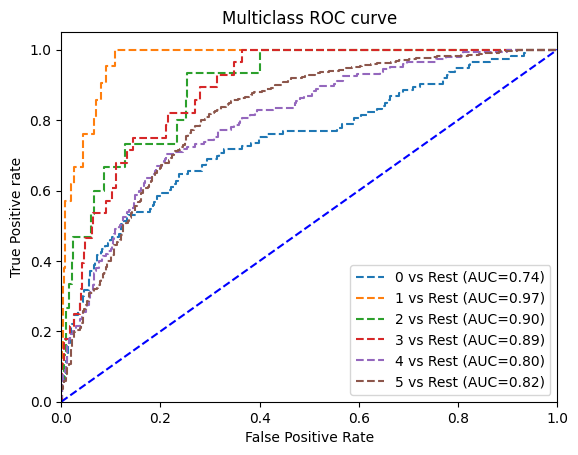

In [81]:

# roc curve for classes
fpr = {}
tpr = {}
threshold ={}
roc_auc = dict()

for i in range(nclass):    
    fpr[i], tpr[i], threshold[i] = roc_curve(Ytest_binarized[:,i], Ypredict_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


# Trying different models on the train set

In [51]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [57]:
# this is the dictionary containing the different names of the model 
#inn the keyvalue place..

model_dict1 = { "MultiLayerPerceptron": MLPClassifier(warm_start = True,activation ='logistic')
              "K-Neighborsclassifier": KNeighborsClassifier(),
              "Decision TreeClassifier": DecisionTreeClassifier(),
               "RandomForestClassifier": RandomForestClassifier(warm_start = True),
              "SGDclass" : SGDClassifier(loss = 'log_loss',warm_start = True),
               "Adaboost" : AdaBoostClassifier(random_state = 33),
               "lightGBM" : LGBMClassifier(),
               "HGboost" : HistGradientBoostingClassifier(warm_start = True)
              }

#,
#'SVM' : SVC(),AdaBoostClassifier()
#"lightLGM" : LGBMClassifier()

            

In [58]:

model_list_fitted = []
ypred_list = []
AccuracyScore_train = []
AccuracyScore_test = [] 
Ypredict_probas=[]

for i in range(len(list(model_dict1))):
    model = list(model_dict1.values())[i]
    start = time.time()
    model.fit(Xtrain_stack, Ytrain) # Train model
    end = time.time()

    # Make predictions
    Y_train_pred = model.predict(Xtrain_stack)
    Y_test_pred = model.predict(Xtest_stack)
    
    print(list(model_dict1.keys())[i])
    print(f"Execution time of",list(model_dict1.keys())[i],'is:', end - start,"secs")
    print('\n')
    
    print('Training Accuracy:',accuracy_score(Ytrain,Y_train_pred))
    print('\n')
    print('Testing Accuracy:',accuracy_score(Ytest,Y_test_pred))
    
    AccuracyScore_train.append(accuracy_score(Ytrain,Y_train_pred))
    AccuracyScore_test.append(accuracy_score(Ytest,Y_test_pred))
    Ypredict_probas.append(model.predict_proba(Xtest_stack))
    model_list_fitted.append(list(model_dict1.keys())[i])
    ypred_list.append(Y_test_pred)
    
    print('\n')
    print(confusion_matrix(Ytest,Y_test_pred))
    print('\n')
    print(classification_report(Ytest,Y_test_pred))
      
    print('*'*99)
    print('\n')


K-Neighborsclassifier
Execution time of K-Neighborsclassifier is: 0.2198634147644043 secs


Training Accuracy: 0.799298646224107


Testing Accuracy: 0.7417461482024945


[[ 10   1   0   0   3  99]
 [  0   2   0   0   0  19]
 [  1   0   0   1   2  11]
 [  1   0   1   1   3  22]
 [  5   0   0   0   7 133]
 [ 33   0   1   1  15 991]]


              precision    recall  f1-score   support

           0       0.20      0.09      0.12       113
           1       0.67      0.10      0.17        21
           2       0.00      0.00      0.00        15
           3       0.33      0.04      0.06        28
           4       0.23      0.05      0.08       145
           5       0.78      0.95      0.86      1041

    accuracy                           0.74      1363
   macro avg       0.37      0.20      0.21      1363
weighted avg       0.65      0.74      0.68      1363

***************************************************************************************************


Decision TreeClassif

Adaboost
Execution time of Adaboost is: 559.4310262203217 secs


Training Accuracy: 0.7649934810951761


Testing Accuracy: 0.7697947214076246


[[   1    2    0    0    0  121]
 [   4    3    2    0    0   12]
 [   0    2    1    3    0   12]
 [   0    2    1    1    2   24]
 [   0    1    0    0    3  119]
 [   2    1    2    1    1 1041]]


              precision    recall  f1-score   support

           0       0.14      0.01      0.02       124
           1       0.27      0.14      0.19        21
           2       0.17      0.06      0.08        18
           3       0.20      0.03      0.06        30
           4       0.50      0.02      0.05       123
           5       0.78      0.99      0.88      1048

    accuracy                           0.77      1364
   macro avg       0.34      0.21      0.21      1364
weighted avg       0.67      0.77      0.68      1364

***********************************************************************

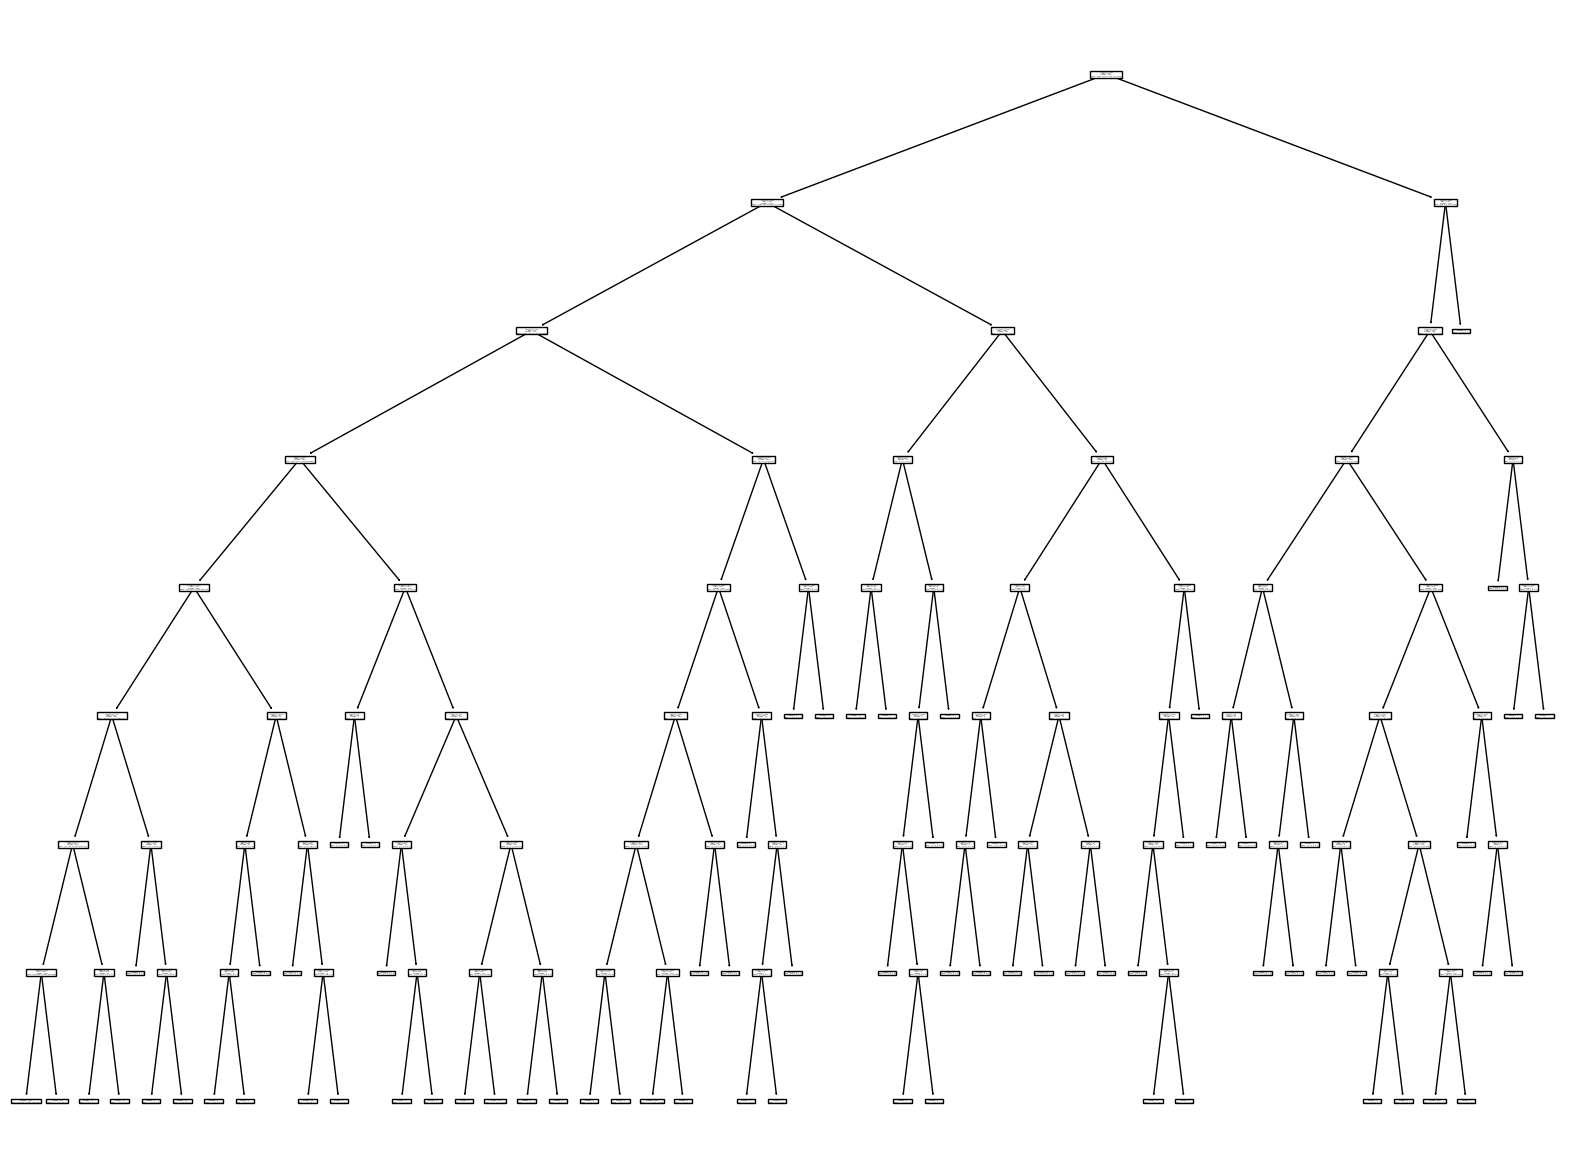

In [59]:
# doing some postprunning on the tree as it was overfit...just trying ..
treemodel = DecisionTreeClassifier(max_depth = 8)
treemodel.fit(Xtrain_stack,Ytrain)

from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(treemodel);

In [60]:
Ytrain_pred = treemodel.predict(Xtrain_stack)

Ytest_pred = treemodel.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ytrain_pred))
print('\n')
print('Testing Accuracy:',accuracy_score(Ytest,Ytest_pred))

Training Accuracy: 0.7798075354754527


Testing Accuracy: 0.7659574468085106



Max_Depth = 5 ,

Training Accuracy: 0.7678192790735606

Testing Accuracy: 0.7630227439471754


max_depth = 8

Training Accuracy: 0.7798075354754527


Testing Accuracy: 0.7659574468085106

In [82]:

TSVD=pd.DataFrame(list(zip(model_list_fitted, AccuracyScore_train,AccuracyScore_test)), columns=['Model Name', 'Training Score','Testing Score']).sort_values(by=["Testing Score"],ascending=False)
TSVD

,Model Name,Training Score,Testing Score
5,lightGBM,0.996575,0.776229
3,SGDclass,0.801011,0.771093
6,HGboost,0.897814,0.770360
4,Adaboost,0.760235,0.764490
2,RandomForestClassifier,1.000000,0.762289
0,K-Neighborsclassifier,0.799299,0.741746
1,Decision TreeClassifier,1.000000,0.738811


In [ ]:
NSVD=pd.DataFrame(list(zip(model_list_fitted, AccuracyScore_train,AccuracyScore_test)), columns=['Model Name', 'Training Score','Testing Score']).sort_values(by=["Testing Score"],ascending=False)
NSVD

In [ ]:

#print(ypred_list)


In [ ]:
#print(AccuracyScore_train)
#print(AccuracyScore_test)

In [85]:
#Model 2 of comparison...


start = time.time()

lgbm = LGBMClassifier(verbose =-1)
predictor2 = lgbm.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict2_train = predictor2.predict(Xtrain_stack)
Ypredict2_test = predictor2.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict2_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict2_test))


Execution time:  16.906880378723145 secs
Training Accuracy: 0.91135214483771
Testing Accuracy: 0.7762289068231841


* with nestimators = 100 and max_depth = -1

test size = 0.10

Execution time:  15.775376081466675 secs
Training Accuracy: 0.9123207301173403
Testing Accuracy: 0.782258064516129

test size = 0.25

Execution time:  12.935472965240479 secs
Training Accuracy: 0.9235357387308106
Testing Accuracy: 0.77471399237313

* with nestimators = 500 and max_depth = 3

Execution time: 419.1856451034546 secs 
Training Accuracy: 0.8464172169234532 
Testing Accuracy: 0.7615553925165077

In [86]:

print(confusion_matrix(Ytest,Ypredict2_test))
print('\n')
print(classification_report(Ytest,Ypredict2_test))


[[  15    0    1    1    3   93]
 [   2    5    0    1    0   13]
 [   0    1    1    2    2    9]
 [   1    1    1    3    2   20]
 [   6    0    0    3   18  118]
 [  13    0    0    2   10 1016]]


              precision    recall  f1-score   support

           0       0.41      0.13      0.20       113
           1       0.71      0.24      0.36        21
           2       0.33      0.07      0.11        15
           3       0.25      0.11      0.15        28
           4       0.51      0.12      0.20       145
           5       0.80      0.98      0.88      1041

    accuracy                           0.78      1363
   macro avg       0.50      0.27      0.32      1363
weighted avg       0.72      0.78      0.72      1363



In [87]:

Ypredict_proba2 = lgbm.predict_proba(Xtest_stack)
Ypredict_proba2


array([[6.89953505e-02, 9.23106433e-05, 5.53469114e-04, 2.16360011e-03,
        4.08438955e-02, 8.87351374e-01],
       [5.80439654e-02, 6.73064774e-04, 3.42736962e-04, 1.98287581e-03,
        1.21510753e-02, 9.26806282e-01],
       [2.74305145e-01, 8.29478647e-05, 1.62882042e-04, 4.55916854e-03,
        6.07206079e-02, 6.60169249e-01],
       ...,
       [6.87653127e-02, 8.28555340e-04, 2.39039767e-04, 2.64306702e-03,
        2.62966585e-02, 9.01227367e-01],
       [4.40997145e-02, 5.67662379e-04, 5.13051866e-04, 8.82921541e-04,
        1.59112518e-03, 9.52345525e-01],
       [1.21985754e-02, 3.28049241e-05, 2.57714000e-05, 1.90631875e-04,
        1.34196142e-02, 9.74132602e-01]])

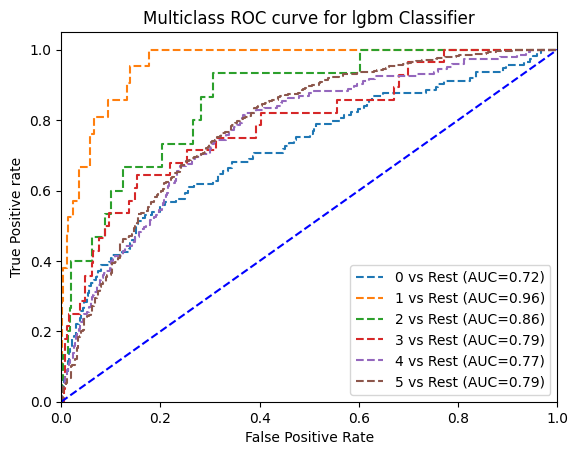

In [88]:
#ROC curve and Area under the curve plotting for the Classifier...


# roc curve for classes
fpr = {}
tpr = {}
threshold ={}
roc_auc = dict()

for i in range(nclass):    
    fpr[i], tpr[i], threshold[i] = roc_curve(Ytest_binarized[:,i], Ypredict_proba2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for lgbm Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


In [90]:
#model testing..number 3

start = time.time()

rfc =RandomForestClassifier(warm_start = True)
predictor3 = rfc.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict3_train = predictor3.predict(Xtrain_stack)
Ypredict3_test = predictor3.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict3_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict3_test))


Execution time:  218.89733052253723 secs
Training Accuracy: 1.0
Testing Accuracy: 0.772560528246515


* n_estimators=500, criterion='log_loss',random_state=33

* N_estimators = 100 

Execution time:  139.99861884117126 secs
Training Accuracy: 0.9999184472353613
Testing Accuracy: 0.7732942039618489

**Execution time:  168.3524670600891 secs
Training Accuracy: 1.0
Testing Accuracy: 0.7771260997067448**

In [91]:

print(confusion_matrix(Ytest,Ypredict3_test))
print('\n')
print(classification_report(Ytest,Ypredict3_test))


[[  10    0    0    0    0  103]
 [   0    0    0    0    0   21]
 [   0    0    0    2    0   13]
 [   0    0    0    1    0   27]
 [   0    0    0    0    2  143]
 [   1    0    0    0    0 1040]]


              precision    recall  f1-score   support

           0       0.91      0.09      0.16       113
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        15
           3       0.33      0.04      0.06        28
           4       1.00      0.01      0.03       145
           5       0.77      1.00      0.87      1041

    accuracy                           0.77      1363
   macro avg       0.50      0.19      0.19      1363
weighted avg       0.78      0.77      0.68      1363



In [92]:

Ypredict_proba3 = rfc.predict_proba(Xtest_stack)
Ypredict_proba3


array([[0.05, 0.  , 0.01, 0.03, 0.09, 0.82],
       [0.03, 0.  , 0.  , 0.  , 0.  , 0.97],
       [0.2 , 0.  , 0.  , 0.02, 0.1 , 0.68],
       ...,
       [0.02, 0.01, 0.  , 0.  , 0.01, 0.96],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.93],
       [0.06, 0.01, 0.01, 0.  , 0.04, 0.88]])

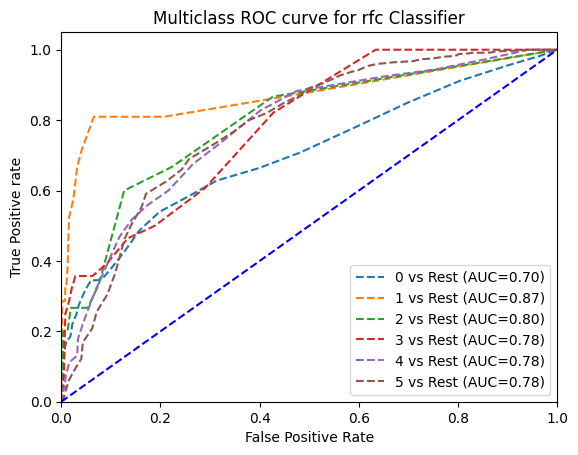

In [93]:

# roc curve for classes
fpr = {}
tpr = {}
threshold ={}
roc_auc = dict()

for i in range(nclass):    
    fpr[i], tpr[i], threshold[i] = roc_curve(Ytest_binarized[:,i], Ypredict_proba3[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for rfc Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#model 4 testing..

start = time.time()
#n_iter=20, class_weight="balanced", n_jobs=-1,random_state=42, alpha=1e-06, verbose=1

#defining the model..

sgd = SGDClassifier(loss='log_loss',alpha =1e-04)

predictor4 = sgd.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict4_train = predictor4.predict(Xtrain_stack)
Ypredict4_test = predictor4.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict4_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict4_test))


* loss='log_loss',alpha =1e-04


Execution time:  91.86199235916138 secs
Training Accuracy: 0.8058996088657105
Testing Accuracy: 0.7741935483870968


* for parameters loss='log_loss',alpha = 0.1

Execution time:  45.269530057907104 secs
Training Accuracy: 0.760968846843908
Testing Accuracy: 0.7630227439471754

Execution time:  45.887550354003906 secs
Training Accuracy: 0.7596968709256845
Testing Accuracy: 0.7683284457478006


* for default parameters

Execution time:  77.3353009223938 secs
Training Accuracy: 0.9512314467460447
Testing Accuracy: 0.7872340425531915

* loss='log_loss',alpha =1e-06 

Execution time:  138.68693709373474 secs
Training Accuracy: 0.9995925684485006
Testing Accuracy: 0.7441348973607038

In [185]:
'''
print(confusion_matrix(Ytest,Ypredict4_test))
print('\n')
print(classification_report(Ytest,Ypredict4_test))
'''

[[   4    0    0    0    1  119]
 [   2    0    0    0    0   19]
 [   0    0    0    0    2   16]
 [   0    0    0    1    2   27]
 [   1    0    0    0    7  115]
 [   4    0    0    0    2 1042]]


              precision    recall  f1-score   support

           0       0.36      0.03      0.06       124
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        18
           3       1.00      0.03      0.06        30
           4       0.50      0.06      0.10       123
           5       0.78      0.99      0.87      1048

    accuracy                           0.77      1364
   macro avg       0.44      0.19      0.18      1364
weighted avg       0.70      0.77      0.69      1364



In [186]:

'''
Ypredict_proba4 = sgd.predict_proba(Xtest_stack)
Ypredict_proba4
'''

array([[0.0235562 , 0.00409114, 0.00358228, 0.00341633, 0.02174037,
        0.94361369],
       [0.07739681, 0.00539403, 0.00359958, 0.00511225, 0.02373843,
        0.8847589 ],
       [0.13687656, 0.030118  , 0.01640255, 0.03789196, 0.1115746 ,
        0.66713632],
       ...,
       [0.07630736, 0.00382018, 0.00453932, 0.01128824, 0.03608046,
        0.86796445],
       [0.06412825, 0.0052828 , 0.00489491, 0.0215516 , 0.03066647,
        0.87347597],
       [0.063186  , 0.01191594, 0.00986545, 0.02631164, 0.05994108,
        0.82877989]])

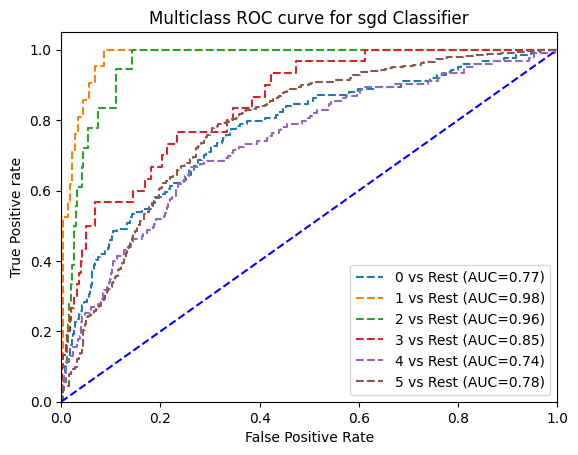

In [187]:
'''
# roc curve for classes
fpr = {}
tpr = {}
threshold ={}
roc_auc = dict()

for i in range(nclass):    
    fpr[i], tpr[i], threshold[i] = roc_curve(Ytest_binarized[:,i], Ypredict_proba4[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for sgd Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
'''

# Using Stratified for the imbalance data..and checking the score on validation data

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
#using Stratified kfold to keep the same percentage of data in the training
#and testing set to have a constant score and limit overfitting..
'''
skf = StratifiedKFold(n_splits=10)
#skf.get_n_splits(XTrain,Ytrain)

YTrain = np.array(Ytrain) #Target variable

data = np.column_stack((Xtrain_stack,YTrain))
akuracy = []

'''
'''
for train_index, test_index in skf.split(Xtrain_stack,Ytrain):
    X1_train,X1_valid = Xtrain_stack.iloc(train_index),Xtrain_stack.iloc(test_index)
    Y1_train,Y1_valid = Ytrain.iloc(train_index),Ytrain.iloc(test_index)
    
'''

'''
for fold, (train_index, test_index) in enumerate(skf.split(Xtrain_stack,YTrain)):
    train_data, test_data = data[train_index], data[test_index]
    X1_train, Y1_train = train_data[:, :-1], train_data[:, -1]  # Separate features and target
    X1_valid, Y1_valid = test_data[:, :-1], test_data[:, -1]
    
    logreg.fit(X1_train,Y1_train)
    predikktion = logreg.predict(X1_valid)
    skore = accuracy_score(predikktion,Y1_valid)
    
    akuracy.append(skore)
    
print(akuracy)
'''

In [ ]:
np.mean(akuracy)

* Logreg handling sparse matrix of review col and userid col...

* stratified kfold n_splits = 10 accuracy for each fold... for testsize=0.1 and random_state=1088


[0.7685411572942136, 0.7734311328443357, 0.7724306688417618, 0.7716150081566069, 0.7699836867862969, 0.768352365415987, 0.766721044045677, 0.7691680261011419, 0.7765089722675367, 0.767536704730832]

mean: 0.7704288766484388


* stratified kfold n_splits = 10 accuracy for each fold... for testsize=0.1 and random_state=33

[0.7728013029315961, 0.7671009771986971, 0.7677261613691931, 0.7775061124694377, 0.7693561532192339, 0.771801140994295, 0.7750611246943765, 0.7685411572942136, 0.7766911165444172, 0.7620211898940505]

mean : 0.7708606436609511


# With Stratified kfold
# Nsplits = 10
**score with stratified kfold using userid userreputation col with other num and catego features..as same...**

0.768617378215424


**score with stratified kfold using userid col only with other num and catego features..as same...**

[0.7734311328443357, 0.7660961695191524, 0.7660961695191524, 0.7685411572942136, 0.7701711491442543, 0.7685411572942136, 0.7734311328443357, 0.768352365415987, 0.7699836867862969, 0.7691680261011419]

mean is :
0.7693812146763084


**with userid not there... and using all sparce matrix**

[0.7726161369193154, 0.7669111654441728, 0.7660961695191524, 0.7693561532192339, 0.7701711491442543, 0.7677261613691931, 0.7734311328443357, 0.768352365415987, 0.7699836867862969, 0.7691680261011419]

mean is :0.7693812146763084

# Nsplits = 3

[0.7640009782342871, 0.7676693568109563, 0.7696258253851798]

0.7670987201434745


**with review col of 2500 features and not including the userid col...**

[0.7640009782342871, 0.7681584739545121, 0.7696258253851798]


0.7672617591913263

# Nsplits = 20
**with review col of 2500 features and using nsplits = 20

[0.7719869706840391, 0.7687296416938111, 0.7703583061889251, 0.7687296416938111, 0.7638436482084691, 0.7671009771986971, 0.7671009771986971, 0.7748776508972267, 0.7748776508972267, 0.766721044045677, 0.766721044045677, 0.7699836867862969, 0.7765089722675367, 0.7748776508972267, 0.768352365415987, 0.7699836867862969, 0.7765089722675367, 0.766721044045677, 0.7716150081566069, 0.766721044045677]

**mean is :** 0.7701159991710551

# nsplits = 40 

[0.7752442996742671, 0.7719869706840391, 0.7654723127035831, 0.7687296416938111, 0.7752442996742671, 0.7687296416938111, 0.7687296416938111, 0.7719869706840391, 0.7654723127035831, 0.7687296416938111, 0.762214983713355, 0.762214983713355, 0.7752442996742671, 0.7752442996742671, 0.7687296416938111, 0.7687296416938111, 0.7752442996742671, 0.7752442996742671, 0.7654723127035831, 0.7785016286644951, 0.7719869706840391, 0.758957654723127, 0.7719869706840391, 0.758957654723127, 0.7785016286644951, 0.762214983713355, 0.7654723127035831, 0.7810457516339869, 0.7647058823529411, 0.7679738562091504, 0.7679738562091504, 0.7712418300653595, 0.7679738562091504, 0.7843137254901961, 0.7712418300653595, 0.7679738562091504, 0.7581699346405228, 0.7777777777777778, 0.7679738562091504, 0.7647058823529411]

**mean is :** 0.7697079048774775


In [ ]:
#using Stratified kfold to keep the same percentage of data in the training
#and testing set to have a constant score and limit overfitting..
'''
skf = StratifiedKFold(n_splits=10)
#skf.get_n_splits(XTrain,Ytrain)

YTrain = np.array(Ytrain) #Target variable

data = np.column_stack((Xtrain_stack,YTrain))
akuracy2 = []
'''
'''
for train_index, test_index in skf.split(Xtrain_stack,Ytrain):
    X1_train,X1_valid = Xtrain_stack.iloc(train_index),Xtrain_stack.iloc(test_index)
    Y1_train,Y1_valid = Ytrain.iloc(train_index),Ytrain.iloc(test_index)
    
'''
'''
for fold, (train_index, test_index) in enumerate(skf.split(Xtrain_stack,YTrain)):
    train_data, test_data = data[train_index], data[test_index]
    X1_train, Y1_train = train_data[:, :-1], train_data[:, -1]  # Separate features and target
    X1_valid, Y1_valid = test_data[:, :-1], test_data[:, -1]
    
    lgbm2 = LGBMClassifier(verbose=-1)
    LGBM=lgbm2.fit(X1_train,Y1_train)
    predikktion2 = LGBM.predict(X1_valid)
    skore2 = accuracy_score(predikktion2,Y1_valid)
    
    akuracy2.append(skore2)
    
print(akuracy2)
'''

In [ ]:
#np.mean(akuracy2)


* for test_size = 0.10 and random_state = 1088

[0.7644661776691116, 0.7644661776691116, 0.7797716150081566, 0.7716150081566069, 0.7773246329526917, 0.7626427406199021, 0.7756933115823818, 0.7724306688417618, 0.7765089722675367, 0.765905383360522]

mean is: 0.7710824688127782


* for test size = 0.1 and random_state = 33
[0.7785016286644951, 0.7736156351791531, 0.7709861450692747, 0.7612061939690301, 0.7734311328443357, 0.7791361043194784, 0.7832110839445803, 0.7701711491442543, 0.7766911165444172, 0.7701711491442543]

mean is : 0.7737121338823274


In [ ]:
'''
test_predictions2 = LGBM.predict(Xtest_stack)
test_accuracy2 = accuracy_score(Ytest, test_predictions2)

print("Test Accuracy:", test_accuracy2)
'''

# Stratified fold for RandomForestClassifier..


In [ ]:
'''
#using Stratified kfold to keep the same percentage of data in the training
#and testing set to have a constant score and limit overfitting..

skf = StratifiedKFold(n_splits=10)
#skf.get_n_splits(XTrain,Ytrain)

YTrain = np.array(Ytrain) #Target variable

data = np.column_stack((Xtrain_stack,YTrain))
akuracy3 = []

'''
'''
for train_index, test_index in skf.split(Xtrain_stack,Ytrain):
    X1_train,X1_valid = Xtrain_stack.iloc(train_index),Xtrain_stack.iloc(test_index)
    Y1_train,Y1_valid = Ytrain.iloc(train_index),Ytrain.iloc(test_index)
    
'''
'''
for fold, (train_index, test_index) in enumerate(skf.split(Xtrain_stack,YTrain)):
    train_data, test_data = data[train_index], data[test_index]
    X1_train, Y1_train = train_data[:, :-1], train_data[:, -1]  # Separate features and target
    X1_valid, Y1_valid = test_data[:, :-1], test_data[:, -1]
    
    rfc2 = RandomForestClassifier()
    RFC=rfc2.fit(X1_train,Y1_train)
    predikktion3 = RFC.predict(X1_valid)
    skore3 = accuracy_score(predikktion3,Y1_valid)
    
    akuracy3.append(skore3)
    
print(akuracy3)
'''

* Stratified fold for lgbm  with random_state= 108

[0.8712306438467807, 0.8557457212713936, 0.8704156479217604, 0.8736756316218419, 0.8720456397718012, 0.8736756316218419, 0.8744906275468622, 0.8686786296900489, 0.8817292006525286, 0.8572593800978793]

mean: 0.8698946754042739

* for different random_state = 33

[0.8598207008964955, 0.8655256723716381, 0.865415986949429, 0.8727569331158238, 0.865415986949429, 0.8727569331158238, 0.8686786296900489, 0.8694942903752039, 0.8719412724306689, 0.767536704730832]

mean is : 0.8579343110625393

## Now performing the same text cleaning and Transformation for the Test Dataset

In [ ]:
dftest

## Feature Selection for the test dataset..

In [ ]:
#first of all taking the data from the test.csv and taking the required columns taken for the train.csv

xtest =dftest.iloc[:,[1,5,12,13]]

In [ ]:
#This is the numerical data of the Test dataset
#xtestNum = xtest.iloc[:,[0,2,3]]
xtestNum = xtest.iloc[:,[0,2]]

#this is the categorical data of the Test dataset
#xtestTxt = xtest.iloc[:,[1,4]]
xtestTxt = xtest.iloc[:,[1,3]]

#this is the part1 of the categorical data of test dataset
#xtestTxt1 = xtest.iloc[:,[1]]
xtestTxt1 = xtest.iloc[:,[1]]


#this is the part2 of the categorical data where tfidfvectorizer will be applied..
#xtestTxt2 = xtest.iloc[:,[4]]
xtestTxt2 = xtest.iloc[:,[3]]


In [ ]:
xtestNum

# Now performing the tfidfvectorizer on the review column of TEST dataset..

In [ ]:
#tftestvec = TfidfVectorizer(stop_words=stopwords,max_features = 21000,smooth_idf = False)

In [ ]:
'''
doc = []
for i in range(0,len(df['Recipe_Review'])-1):
    doc.append(len(df.iloc[i]['Recipe_Review']))
#print(doc)
print(max(doc))    
    
    
def lister(k):
    l = ''
    for i in range(0,len(k)):
        l+=(k.iloc[i])
    return l

m = lister(xtestTxt2['Recipe_Review'])
'''

In [ ]:
xtestTxt2_vec = tfvec.transform(xtestTxt2['Recipe_Review'])

In [ ]:
xtestTxt2_vec.shape,xtestTxt2_vec

* **Now performing numerical transformation and categorical  transformation..**

In [ ]:
#transforming the numerical features/..
xtestNum_vec = num_processor.transform(xtestNum)

In [ ]:
xtestNum_vec.shape,xtestNum_vec

In [ ]:
#Transforming the categorical features'...
xtestTxt1_vec = cat_processor.transform(xtestTxt1)

In [ ]:
xtestTxt1_vec.shape,xtestTxt1_vec

In [ ]:
#now performing the horizontal stacking of the numeric and the categorical features...

#xtestTxt_stack = np.hstack([xtestTxt1_vec.toarray(),xtestTxt2_vec.toarray()])

xtestTxt_stack = np.hstack([xtestTxt1_vec.toarray(),xtestTxt2_vec.toarray()])

In [ ]:
xtestTxt_stack.shape,xtestTxt_stack

In [ ]:
xtest_new = np.hstack([xtestNum_vec,xtestTxt_stack])

In [ ]:
xtest_new.shape,xtest_new


## Predicting the model made on the Test dataset...finallyy!!

In [ ]:
#xtestTxt_stack = np.hstack([xtestTxt1_vec.toarray(),xtestTxt2_vec.toarray()])

In [ ]:
'''
#xtest_new is the preprocessed dataset done which was accordingly done for train dataset.
ypred = lgbm.predict(xtest_new)


submission = pd.DataFrame({'ID': range(1,4547),
                          'total_amount': ypred})
submission.to_csv('submission.csv',index = False)
'''

* Test Accuracy: 0.7754952311078503


..


In [ ]:
#pd.DataFrame(list(zip(model_list_fitted2, ypred_list2)), columns=['Model Name', 'Accuracy score']).sort_values(by=["ypred_list2"],ascending=False)

In [ ]:
'''
y_pred2= predictor2.predict(xtest_new)

submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": y_pred2}) 

submission.to_csv('submission.csv',index=False)
'''

In [ ]:
'''
#model  testing..

start = time.time()

sgd_ultra = SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001,
                                learning_rate='optimal', class_weight='balanced', max_iter=1000,
                                early_stopping=True, n_iter_no_change=5, random_state=42)

predictor6 = sgd_ultra.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict6_train = predictor6.predict(Xtrain_stack)
Ypredict6_test = predictor6.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict6_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict6_test))

'''

In [ ]:
'''
y_pred6= predictor6.predict(xtest_new)

submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": y_pred6}) 

submission.to_csv('submission.csv',index=False)
'''

In [ ]:
'''
#Model testing....
start = time.time()

lgbm = LGBMClassifier(verbose=-1)
predictor3 = lgbm.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict3_train = predictor3.predict(Xtrain_stack)
Ypredict3_test = predictor3.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict3_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict3_test))
'''

In [ ]:
'''
y_pred3= predictor3.predict(xtest_new)

submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": y_pred3}) 

submission.to_csv('submission.csv',index=False)
'''

In [ ]:
'''
#Model testing....
start = time.time()

lgbm_ =LGBMClassifier(max_depth=-1,verbose=-1, random_state=33, silent=True, metric='None', n_jobs=4, n_estimators=5000)
lgm_model = lgbm_.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict7_train = lgm_model.predict(Xtrain_stack)
Ypredict7_test = lgm_model.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict7_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict7_test))

'''

In [ ]:
'''
from sklearn.multiclass import OneVsRestClassifier
start = time.time()

OVR = OneVsRestClassifier(SGDClassifier())
predictor4 = OVR.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict4_train = predictor4.predict(Xtrain_stack)
Ypredict4_test = predictor4.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict4_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict4_test))
'''

In [ ]:
'''
#from sklearn.multiclass import OneVsRestClassifier
start = time.time()

OVR2 = OneVsRestClassifier(RandomForestClassifier())
predictor5 = OVR2.fit(Xtrain_stack,Ytrain)

end = time.time()
print("Execution time: ", end - start,"secs")

Ypredict5_train = predictor5.predict(Xtrain_stack)
Ypredict5_test = predictor5.predict(Xtest_stack)

print('Training Accuracy:',accuracy_score(Ytrain,Ypredict5_train))
print('Testing Accuracy:',accuracy_score(Ytest,Ypredict5_test))
'''

# * HyperParameter tuning of Logistic Regression...(with StratifiedKfold for less split..)

In [100]:
# Define hyperparameters to tune

#OVR and L2
params_ = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2'], # Regularization penalty
    'multi_class':['ovr'],
    'solver': ['lbfgs','newton-cg']  # Solver for logistic regression
}

params_2 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2',], # Regularization penalty
    'multi_class':['ovr'],
    'solver': ['liblinear'] 
}                          # Solver for logistic regression

params_3 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2'], # Regularization penalty
    'multi_class':['ovr'],
    'solver': ['sag','saga'] } # Solver for logistic regression

    
## OVR and L1

params_4 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l1'], # Regularization penalty
    'multi_class':['ovr'],
    'solver': ['liblinear','saga'] } # Solver for logistic regression

    
    
#Multinomial and L2
params_5 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2'], # Regularization penalty
    'multi_class':['multinomial'],
    'solver': ['lbfgs','newton-cg','sag','saga'] } # Solver for logistic regression
    

##Multinomial and L1 

params_6 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l1'], # Regularization penalty
    'multi_class':['multinomial'],
    'solver': ['saga']  # Solver for logistic regression
}

#For SKF with nsplits = 10...
    
params_log = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2'], # Regularization penalty
    'multi_class':['ovr'],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga']  # Solver for logistic regression
}
    

params_log2 = {
    'C': [ 0.01, 0.1,1,10],  # Regularization parameter
    'penalty': ['l2'], # Regularization penalty
    'multi_class':['multinomial'],
    'solver': ['lbfgs','newton-cg','saga','sag'] } # Solver for logistic regression
# 'sag', 'saga',,'liblinear''newton-cg','lbfgs','newton-cg'

In [ ]:
# Performing RandomizedSearchCV
'''
logtune = RandomizedSearchCV(estimator=logreg, param_distributions=params_2, n_iter=10, cv=3,scoring = 'accuracy')
logtune.fit(Xtrain_stack,Ytrain)

# Make predictions
prediction2 = logtune.predict(Xtest_stack)

# Print classification report
print("Classification report:")
print(classification_report(Ytest, prediction2))

# Get best parameters and score

print("Best parameters found: ", logtune.best_params_)
print("Best score found: ", logtune.best_score_)
'''

# RandomisedSearchCV Newton-cg vs lbfgs..
* 1st run..

Best parameters found: 
{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1}

Best score found:  0.7648834163212362


In [ ]:

# Performing GridSearchCV
grid_search1 = GridSearchCV(estimator=logreg,param_grid= params_5, cv=3, scoring='accuracy', verbose=1)

# Train the model
grid_search1.fit(Xtrain_stack,Ytrain)

print("Best parameters found: ", grid_search1.best_params_)
print("Best score found: ", grid_search1.best_score_)

print('\n\n')


# Make predictions
prediction1 = grid_search1.predict(Xtest_stack)

# Print classification report
print("Classification report:")
print(classification_report(Ytest, prediction1))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


> # GridsearchCV 

# lbfgs and newton cg with multiclass as ovr...

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
Best score found:  0.7723271530305755



Classification report:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       124
           1       0.83      0.24      0.37        21
           2       0.00      0.00      0.00        18
           3       0.60      0.10      0.17        30
           4       0.42      0.15      0.22       123
           5       0.81      0.98      0.89      1048

    accuracy                           0.79      1364
   macro avg       0.53      0.28      0.32      1364
weighted avg       0.73      0.79      0.74      1364

# solver = liblinear

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
Best score found:  0.7726530916355441



Classification report:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       124
           1       0.83      0.24      0.37        21
           2       0.00      0.00      0.00        18
           3       0.60      0.10      0.17        30
           4       0.42      0.15      0.22       123
           5       0.81      0.98      0.89      1048

    accuracy                           0.79      1364
   macro avg       0.53      0.28      0.32      1364
weighted avg       0.73      0.79      0.74      1364



# Hyperparameter tuning the Logistic Regression..(with StratifiedKfold on nsplits = 10)

In [102]:
skf_log = StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [ ]:

# Initialize RandomizedSearchCV
random_search_log = RandomizedSearchCV(logreg, param_distributions=params_log2, n_iter=10, 
                                   scoring='accuracy', cv=skf_log, random_state=33,verbose=1)


# Perform hyperparameter tuning
random_search_log.fit(Xtrain_stack, Ytrain)

# Get the best model
best_model_log = random_search_log.best_estimator_

#evaluate best model on train set
train_prediction_log = best_model_log.predict(Xtrain_stack)
train_accuracy_log = accuracy_score(Ytrain, train_prediction_log)

# Evaluate the best model on the test set
test_prediction_log = best_model_log.predict(Xtest_stack)
test_accuracy_log = accuracy_score(Ytest, test_prediction_log)

print("Best Model Parameters:", random_search_log.best_params_)
print("Training Accuracy:", train_accuracy_log)
print("Test Accuracy:", test_accuracy_log)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [188]:
'''
train_prediction_log = best_model_log.predict(Xtrain_stack)
train_accuracy_log = accuracy_score(Ytrain, train_prediction_log)

# Evaluate the best model on the test set
test_prediction_log = best_model_log.predict(Xtest_stack)
test_accuracy_log = accuracy_score(Ytest, test_prediction_log)

print("Best Model Parameters:", random_search_log.best_params_)
print("Training Accuracy:", train_accuracy_log)
print("Test Accuracy:", test_accuracy_log)
'''

Best Model Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10}
Training Accuracy: 0.9949478487614081
Test Accuracy: 0.7881231671554252



Best Model Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10}
Training Accuracy: 0.9949478487614081
Test Accuracy: 0.7881231671554252

In [189]:
'''
print(confusion_matrix(Ytest,test_prediction_log))
print('\n')
print(classification_report(Ytest,test_prediction_log))
'''

[[  25    0    0    0    1   98]
 [   4    5    0    0    3    9]
 [   0    0    0    2    5   11]
 [   1    1    0    3    4   21]
 [   6    0    0    0   18   99]
 [  12    0    0    0   12 1024]]


              precision    recall  f1-score   support

           0       0.52      0.20      0.29       124
           1       0.83      0.24      0.37        21
           2       0.00      0.00      0.00        18
           3       0.60      0.10      0.17        30
           4       0.42      0.15      0.22       123
           5       0.81      0.98      0.89      1048

    accuracy                           0.79      1364
   macro avg       0.53      0.28      0.32      1364
weighted avg       0.73      0.79      0.74      1364



In [195]:
# Best parameters obtained from hyperparameter tuning

best_log_reg_params = {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10}


# Train Logistic Regression model on the entire training set with best parameters

log_reg_model = LogisticRegression(**best_log_reg_params)
log_reg_model.fit(Xtrain_stack, Ytrain)


LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')

In [196]:
'''
y_pred=log_reg_model.predict(xtest_new)

submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": y_pred}) 

submission.to_csv('submission.csv',index=False)
'''

# Hyperparameter tuning the LightGBM classifier..(with StratifiedKfold of less split)

In [ ]:
lgbm.get_params()

In [ ]:
'''
# Define parameter grid
param_grid = {"boosting_type":['gbdt','rf','dart'],   #boosting type for model              
              'objective': ['multiclass','multiclassova'], #objective function for classification 
              'is_unbalance': [True],         #used for imbalanced dataset
              'feature_fraction': [0.9],  #0.9  #percent of features taken each time
              'n_estimators': [100,500,1000], #max iteration 
              'force_col_wise':[True], #for speeding up the boosting/model
    'bagging_fraction': [0.8,0.75,0.7],  #the features taken up for bagging..
    'bagging_freq': [5,7,9,11],         #control how often a new sample is drawn ,no of bagging taking place 
    'num_leaves': [40, 50],        #sets the maximum number of nodes per tree
    'learning_rate': [0.01,0.1,0.0001], #how fast convergence of optimization loss function take place...
    'max_depth': [3, 5],             #depth/height of tree...
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 
    'min_child_samples': [ 50, 100,200],  #
    'subsample': [0.6, 0.8, 1.0],   #percent of rows taken each time..
    'colsample_bytree': [0.6, 0.8, 1.0],  #percent of columns taken each time..for tree
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10], #l1 weight
    'reg_lambda': [0, 1e-1, 1, 5, 10]     #l2 weight
}
 #'gbdt','rf','dart'
 

In [ ]:
'''
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=10,n_jobs = 3, cv= 5,error_score='raise')
random_search.fit(Xtrain_stack,Ytrain)

# Get best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)
'''

In [ ]:
'''
Best parameters found:  {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 10,
'objective': 'multiclassova', 'num_leaves': 50, 'n_estimators': 500,
'min_child_weight': 10000.0, 'min_child_samples': 50,
'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.01,
'is_unbalance': True, 'force_col_wise': True, 
'feature_fraction': 0.9, 'colsample_bytree': 0.8, 'boosting_type': 'dart', 
'bagging_freq': 11, 'bagging_fraction': 0.75}
Best score found:  0.760251080133692

Best parameters found:  {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 5, 
'objective': 'multiclass', 'num_leaves': 70, 
'n_estimators': 1000, 'min_child_weight': 10.0, 'min_child_samples': 100, 
'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.05,
'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.9, 
'colsample_bytree': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 9, 
'bagging_fraction': 0.8}
Best score found:  0.7654684598570485

Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 5,
'objective': 'multiclassova','num_leaves': 50, 'n_estimators': 100, 
'min_child_weight': 10000.0, 'min_child_samples': 100, 'metric': 'multi_logloss',
'max_depth': 5, 'learning_rate': 0.01, 'is_unbalance': True, 'force_col_wise': True,
'feature_fraction': 0.9, 'colsample_bytree': 1.0, 'boosting_type': 'dart',
'bagging_freq': 9, 'bagging_fraction': 0.75}
Best score found:  0.7602510905097329

Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 5,
'objective': 'multiclass', 'num_leaves': 40, 'n_estimators': 100,
'min_child_weight': 1, 'min_child_samples': 50, 'metric': 'multi_logloss', 
'max_depth': 5, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True,
'feature_fraction': 0.9, 'colsample_bytree': 0.8, 'boosting_type': 'rf', 
'bagging_freq': 7, 'bagging_fraction': 0.7}
Best score found:  0.7610664186793212
'''

In [ ]:
'''param_test ={"boosting_type":['gbdt'],                  #'gbdt','dart',
              'objective': ['multiclassova'],           #'multiclass'
              'metric': ['multi_logloss'],
              'is_unbalance': [True],
              'feature_fraction': [0.9],
              'n_estimators': [1000],
              'force_col_wise':[True],
    'bagging_fraction': [0.8],        #0.75,0.7
    'bagging_freq': [11]              #5,7,9,
    'num_leaves': [50,90], 
             'min_child_samples': [50, 80,100], 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# Performing  GridSearchCV
grid_search2 = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)
grid_search2.fit(Xtrain_stack,Ytrain)

# Get best parameters and score
print("Best parameters found: ", grid_search2.best_params_)
print("Best score found: ", grid_search2.best_score_)
'''

# Hyperparameter tuning with LGBM with StratifiedKfold on nsplilts = 10

In [200]:

# Define the parameter grid
#'rf,'dart'
'''
param_grid_lgbm = {"boosting_type":['gbdt'],         #Types of boosting the tree       
              'objective': ['multiclass','multiclassova'],  #For multiclass classification
              'metric': ['multi_logloss',],
              'is_unbalance': [True],
              'feature_fraction': [0.7,0.6],
              'n_estimators': [100,500,1000],               # Number of boosting rounds
              'force_col_wise':[True],                      #for speeding up the tree 
    'bagging_fraction': [0.8,0.75,0.7],
    'bagging_freq': [5,7,9,11],
    'learning_rate': [0.01, 0.1,0.0001],                     # Learning rate
    'max_depth': [3, 5],                                ## Maximum depth of the tree
    'min_child_samples': [ 50,100,200],                     # Minimum number of data needed in a child (leaf)
    'subsample': [0.6, 0.8, 1.0],                           # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],                    # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10],                 #L1 regularization term on weights.
    'reg_lambda': [0, 1e-1, 1, 5, 10]                       #L2 regularization term on weights.
 }
'''
#'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
# Initialize StratifiedKFold
skf_lgbm = StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [209]:

param_grid_lgbm = {"boosting_type":['gbdt','dart','rf'],       #Types of boosting the tree       
              'objective': ['multiclass','multiclassova'], #For multiclass classification
              'metric': ['multi_logloss',],
              'is_unbalance': [True],
              'feature_fraction': [0.7,0.6,0.5],
              'n_estimators': [100,500,1000],           # Number of boosting rounds
              'force_col_wise':[True],                  #for speeding up the tree 
              'class_weight';['balanced'],
    'bagging_fraction': [0.6,0.75,0.7],
    'learning_rate': [0.01, 0.001,0.0001,1e-5],         # Learning rate
    'max_depth': [3,4,5,6],                             ## Maximum depth of the tree
    'min_child_samples': [ 50,100,200],                 # Minimum number of data needed in a child (leaf)
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10],             #L1 regularization term on weights.
    'reg_lambda': [0, 1e-1, 1, 5, 10]                   #L2 regularization term on weights
 }

#'subsample': [0.6, 0.8, 1.0], # Subsample ratio of the training instances

#'colsample_bytree': [0.6, 0.8, 1.0],    # Subsample ratio of columns when constructing each tree
#'bagging_freq': [7],


In [ ]:

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_grid_lgbm, n_iter=10, 
                                   scoring='accuracy', cv=skf_lgbm, random_state=33,verbose =1)


# Perform hyperparameter tuning
random_search_lgbm.fit(Xtrain_stack, Ytrain)

# Get the best model
best_model_lgbm = random_search_lgbm.best_estimator_

#evaluate best model on train set
train_prediction_lgbm = best_model_lgbm.predict(Xtrain_stack)
train_accuracy_lgbm = accuracy_score(Ytrain, train_prediction_lgbm)

# Evaluate the best model on the test set
test_prediction_lgbm = best_model_lgbm.predict(Xtest_stack)
test_accuracy_lgbm = accuracy_score(Ytest, test_prediction_lgbm)

print("Best Model Parameters:", random_search_lgbm.best_params_)
print("Training accuracy:",train_accuracy_lgbm)
print("Test Accuracy:", test_accuracy_lgbm)


* testsize = 0.1 and random_state = 1088
Best Model Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 5, 'objective': 'multiclass', 'n_estimators': 1000, 'min_child_weight': 100.0, 'min_child_samples': 50, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.9, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt', 'bagging_freq': 7, 'bagging_fraction': 0.75}
Test Accuracy: 0.7659574468085106

Best Model Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 5, 'objective': 'multiclass', 'n_estimators': 1000, 'min_child_weight': 100.0, 'min_child_samples': 50, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.9, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt', 'bagging_freq': 7, 'bagging_fraction': 0.75}
Test Accuracy: 0.7659574468085106

* testsize = 0.1 and random_state = 33
Best Model Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 5, 'objective': 'multiclass', 'n_estimators': 1000, 'min_child_weight': 100.0, 'min_child_samples': 50, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.9, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt', 'bagging_freq': 7, 'bagging_fraction': 0.75}
Test Accuracy: 0.7653958944281525

*Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Model Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'multiclassova', 'n_estimators': 100, 'min_child_weight': 10000.0, 'min_child_samples': 200, 'metric': 'multi_logloss', 'max_depth': 3, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.6, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt', 'bagging_freq': 11, 'bagging_fraction': 0.8}
Training accuracy: 0.7596968709256845
Test Accuracy: 0.7683284457478006

*third run...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Model Parameters: {'reg_lambda': 10, 'reg_alpha': 1, 'objective': 'multiclass', 'n_estimators': 1000, 'min_child_samples': 50, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.1, 'is_unbalance': True, 'force_col_wise': True, 'feature_fraction': 0.7, 'boosting_type': 'gbdt', 'bagging_fraction': 0.6}
Training accuracy: 0.8678292046936115
Test Accuracy: 0.7756598240469208

**Project END**

In [208]:
'''
# Performing  GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, 
                            scoring='accuracy', cv=skf_lgbm,verbose =1)
grid_search_lgbm.fit(Xtrain_stack,Ytrain)

# Perform hyperparameter tuning
grid_search_lgbm.fit(Xtrain_stack, Ytrain)

# Get the best model
best_model_lgbm2 = grid_search_lgbm.best_estimator_

#evaluate best model on train set
train_prediction_lgbm2 = best_model_lgbm2.predict(Xtrain_stack)
train_accuracy_lgbm2 = accuracy_score(Ytrain, train_prediction_lgbm2)

# Evaluate the best model on the test set
test_prediction_lgbm2 = best_model_lgbm2.predict(Xtest_stack)
test_accuracy_lgbm2 = accuracy_score(Ytest, test_prediction_lgbm2)

print("Best Model Parameters:", grid_search_lgbm2.best_params_)
print('\n')
print("Training accuracy:",train_accuracy_lgbm2)
print("Test Accuracy:", test_accuracy_lgbm2)
'''

Fitting 10 folds for each of 90720 candidates, totalling 907200 fits


KeyboardInterrupt: 

In [ ]:
#Dummy Submission....
'''
X = df.drop("Rating", axis=1)
y = df['Rating']

from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy="most_frequent").fit(X,y)

y_pred=model.predict(dft)

submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": y_pred}) 

submission.to_csv('submission.csv',index=False)
'''

In [ ]:
'''
output = pd.read_csv("submission.csv")
model.score(X, y)

'''